# <font color = green>CAPSTONE: Credit Card Fraud Detection</font>

##### <font color = blue>**By: Himanshu Srivastava**</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = blue>Project Overview:</font>

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by `Nilson Report` that by 2020, banking frauds would account for **$30 billion** worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 
 
In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

## <font color = blue>Problem Statement:</font>

The problem statement chosen for this project is to **predict fraudulent credit card transactions** with the help of machine learning models.
 
In this project, we will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 
 
The data set is taken from the `Kaggle website` and has a total of **2,84,807 transactions; out of these, 492 are fraudulent**. Since the data set is highly imbalanced, it needs to be handled before model building.


## <font color = blue>Problem Understanding and defining fraud:</font>
Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, **skimming is the most common one, which is a way of duplicating information** that is located on the magnetic strip of the card. 

Apart from this, following are the other ways:
- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stealing/loss of credit cards
- Fraudulent telemarketing

### <font color="maroon">Input Data:</font>
- **CC Data Set:** Contains the complete Fraud and non-fraudulent data for all credit card transaction.
- **CC Data dictionary:** The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA.

## <font color = blue>Points to Remember:</font>

1. Data set is **highly imbalanced**, it needs to be handled before model building.
2. The feature **'time'** contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. 
3. The feature **'amount'** is the transaction amount. 
4. The feature **'class'** represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

## <font color = blue>Project pipeline:</font>

The project pipeline can be summarised in the following four steps:
- **Data Understanding:** We need to load the data and understand the features present in it. This would help us to choose the features that we will need for our final model.
- **Exploratory data analytics (EDA):** We need to perform `univariate and bivariate analyses` of the data, followed by feature transformations, if necessary. `For the current data set, because Gaussian variables are used, we do not need to perform Z-scaling.` However, we can check whether there is any skewness in the data and try to mitigate it, as it might cause problems during the model building phase.
- **Train/Test split:** We are familiar with the train/test split that we can perform to check the performance of our models with unseen data. Here, for validation, we can use the `k-fold cross-validation` method. We need to `choose an appropriate k value` so that the minority class is correctly represented in the test folds.
- **Model building / hyperparameter tuning:** Final step at which we can try different models and fine-tune their hyperparameters until we get the desired level of performance on the given data set. We should try and check if we get a better model by various sampling techniques.
- **Model evaluation:** Evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced, it is more important to identify the fraudulent transactions accurately than the non-fraudulent ones. Choose an appropriate evaluation metric that reflects this business goal.

===================================================================================================================
 `Let's start the Assignment`

===================================================================================================================

## <font color = "maroon">Reading and Understanding the Data</font>

Let us first import all libraries and read the dataset

In [2]:
#import all required Python libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Added to print data on current window screen
%matplotlib inline

#Added to avoid warning and not to display on notebook
import warnings
warnings.filterwarnings("ignore")

import time

#Importing MissingNo library to visualize missing values
import missingno as msno

#Added reference for Logistic Regression, StratifiedKFold Validation, PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

#Adding reference for Decision Tree, GridSearch CV, RandomForest, XGBClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Importing PowerTransformer library
from sklearn.preprocessing import PowerTransformer

from imblearn import over_sampling #- import the packages

# Import SMOTE, over_sampling and AdaSyn (Adaptive Synthetic Sampling) library to handle imbalance in train dataset
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

#Added Metrics
from sklearn import metrics

from collections import Counter

#increasing max number of columns and rows displayed with pandas.
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

## Exploratory data analysis

In [3]:
# Load creditcard.csv DataFrames as "cc_df"
cc_df = pd.read_csv('creditcard.csv')
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Observations**

- Based on above data, there are total 31 variables present in dataset which includes the target variable.

- Out of 31, 28 features (V1, V2, V3, up to V28) are the principal components obtained using PCA.

- Rest three are Time, Amount and Target variable Class.

#### Initial analysis on DataFrames

In [4]:
#observe the different feature type present in the data. Check Metadata using info() of DataFrame

print("Metadata of DataFrame:\n")
cc_df.info()

Metadata of DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null 

In [5]:
#Check the shape of dataframes
print("No. of Rows and Columns in Credit Card Fraud Detection DataFrame:", cc_df.shape)

No. of Rows and Columns in Credit Card Fraud Detection DataFrame: (284807, 31)


In [6]:
#Describe the data of Credit Card Fraud Detection dataframe
cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Based on above we can say that data set provided doesn't contains NaN, that means null checks not required. **Let's visualize missing values as well.**
- All are numberical variables
- Amount variable required scaling.

### <font color="green">Visualize missing values using "missingno" library</font>

`missingno` provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows us to get a quick visual summary of the completeness (or lack thereof) of our dataset. Just `pip install missingno` to get installed and started.

In [7]:
#To install library
#!pip install missingno

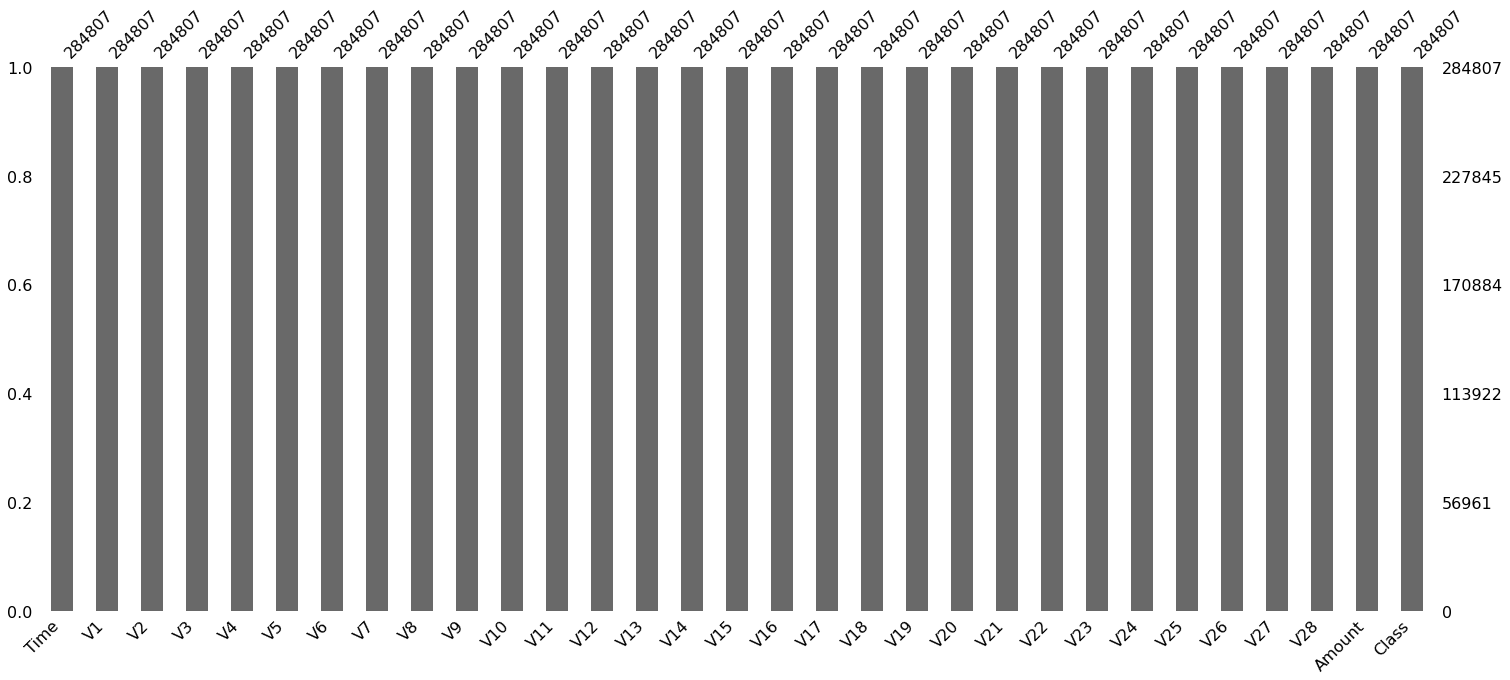

In [8]:
# Visualize missing values as a matrix 
msno.bar(cc_df) 

**`Let's observe the distribution of our classes`**

In [9]:
# lets check class distribution 
classes = cc_df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

**As we can see that**
- 0 is non-fraudulent transaction
- 1 is fraudulent transaction

**so lets check them in percentage**

In [10]:
#Non-Fraudulent Transaction
normal_share = classes[0]/cc_df['Class'].count()*100
print("Percentage of Non-Fraudulent Transaction: ", normal_share)

#Fraudulent Transaction
fraud_share=classes[1]/cc_df['Class'].count()*100
print("Percentage of Fraudulent Transaction: ", fraud_share)

Percentage of Non-Fraudulent Transaction:  99.82725143693798
Percentage of Fraudulent Transaction:  0.1727485630620034


**<font color="maroon">Based on the above analysis, it clearly shows that data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. </br> Lets first build the model on imbalance data and later we will handle data imbalance. </font>**




In [11]:
# To show labels in plots
def showLabels(df, d=None):
    for p in df.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        df.annotate('{:.1f}%'.format(100.*y/len(cc_df)), (x.mean(), y), 
                    ha='center', va='bottom',color = 'blue', fontweight = 'bold')

def showScatterPlot(x, y, df, title, xlbl, ylbl):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(title, fontsize=15)
    plt.xlabel(xlbl,fontsize=15)
    plt.ylabel(ylbl,fontsize=15)
    plt.show()

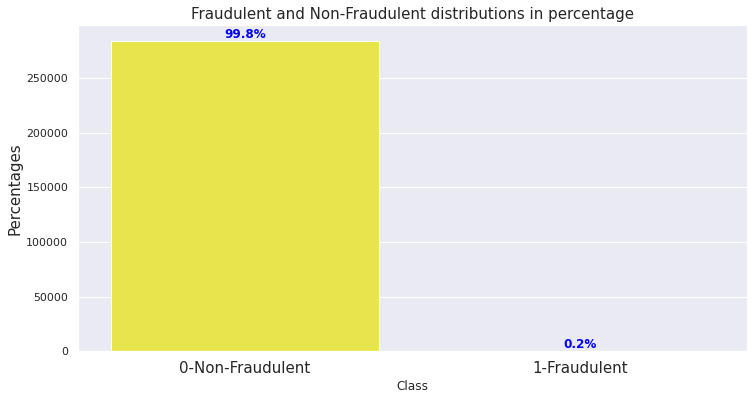

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
ls = sns.countplot(x="Class", data=cc_df,hue=None,palette="Set1_r")
plt.title("Fraudulent and Non-Fraudulent distributions in percentage",fontsize=15)
plt.ylabel("Percentages",fontsize=15)
LABELS = ['0-Non-Fraudulent','1-Fraudulent']
plt.xticks(range(2),LABELS,fontsize=15)
showLabels(ls)
plt.show()

<font color="maroon">**Observations:**
**99.8%** of transaction are **Non-Fraudulent** as compare to **0.2%** are **Fraudulent**.</font>

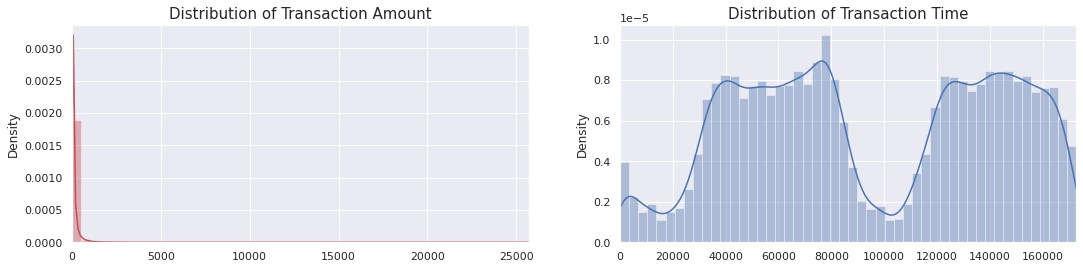

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = cc_df['Amount'].values
time_val = cc_df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=15)
ax[0].set_xlim([min(cc_df['Amount'].values), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=15)
ax[1].set_xlim([min(cc_df['Time'].values), max(time_val)])

plt.show()


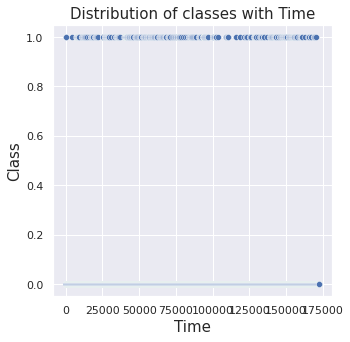

In [14]:
# Create a scatter plot to observe the distribution of classes with time
showScatterPlot(cc_df.Time, cc_df.Class, cc_df, 'Distribution of classes with Time', 'Time', 'Class')

**<font color="maroon">Observations:</font>**

Based on above graph, it is not giving us any such pattern. So we can easily drop this feature i.e. Time from our dataset.


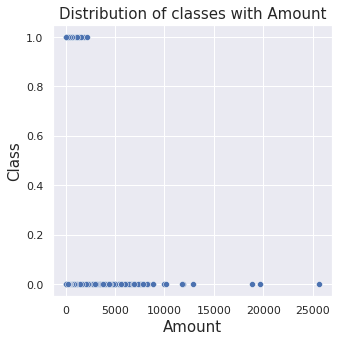

In [15]:
# Create a scatter plot to observe the distribution of classes with Amount
showScatterPlot(cc_df.Amount, cc_df.Class, cc_df, 'Distribution of classes with Amount', 'Amount', 'Class')

**<font color="maroon">Observations:</font>**

Based on above graph, Transaction amount for fradulent transactions lies in low range of amount values while for non-fraudulent tranactions there is scattered distribution based on amount values.

So let's keep this feature rather than dropping and handle it on latter stage while modelling.

## <font color = "maroon">Visualising all Numeric Variables using Scatter Plot</font>

Let's make a scatter of all the numeric variables.

In [16]:
# Numeric columns
cc_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

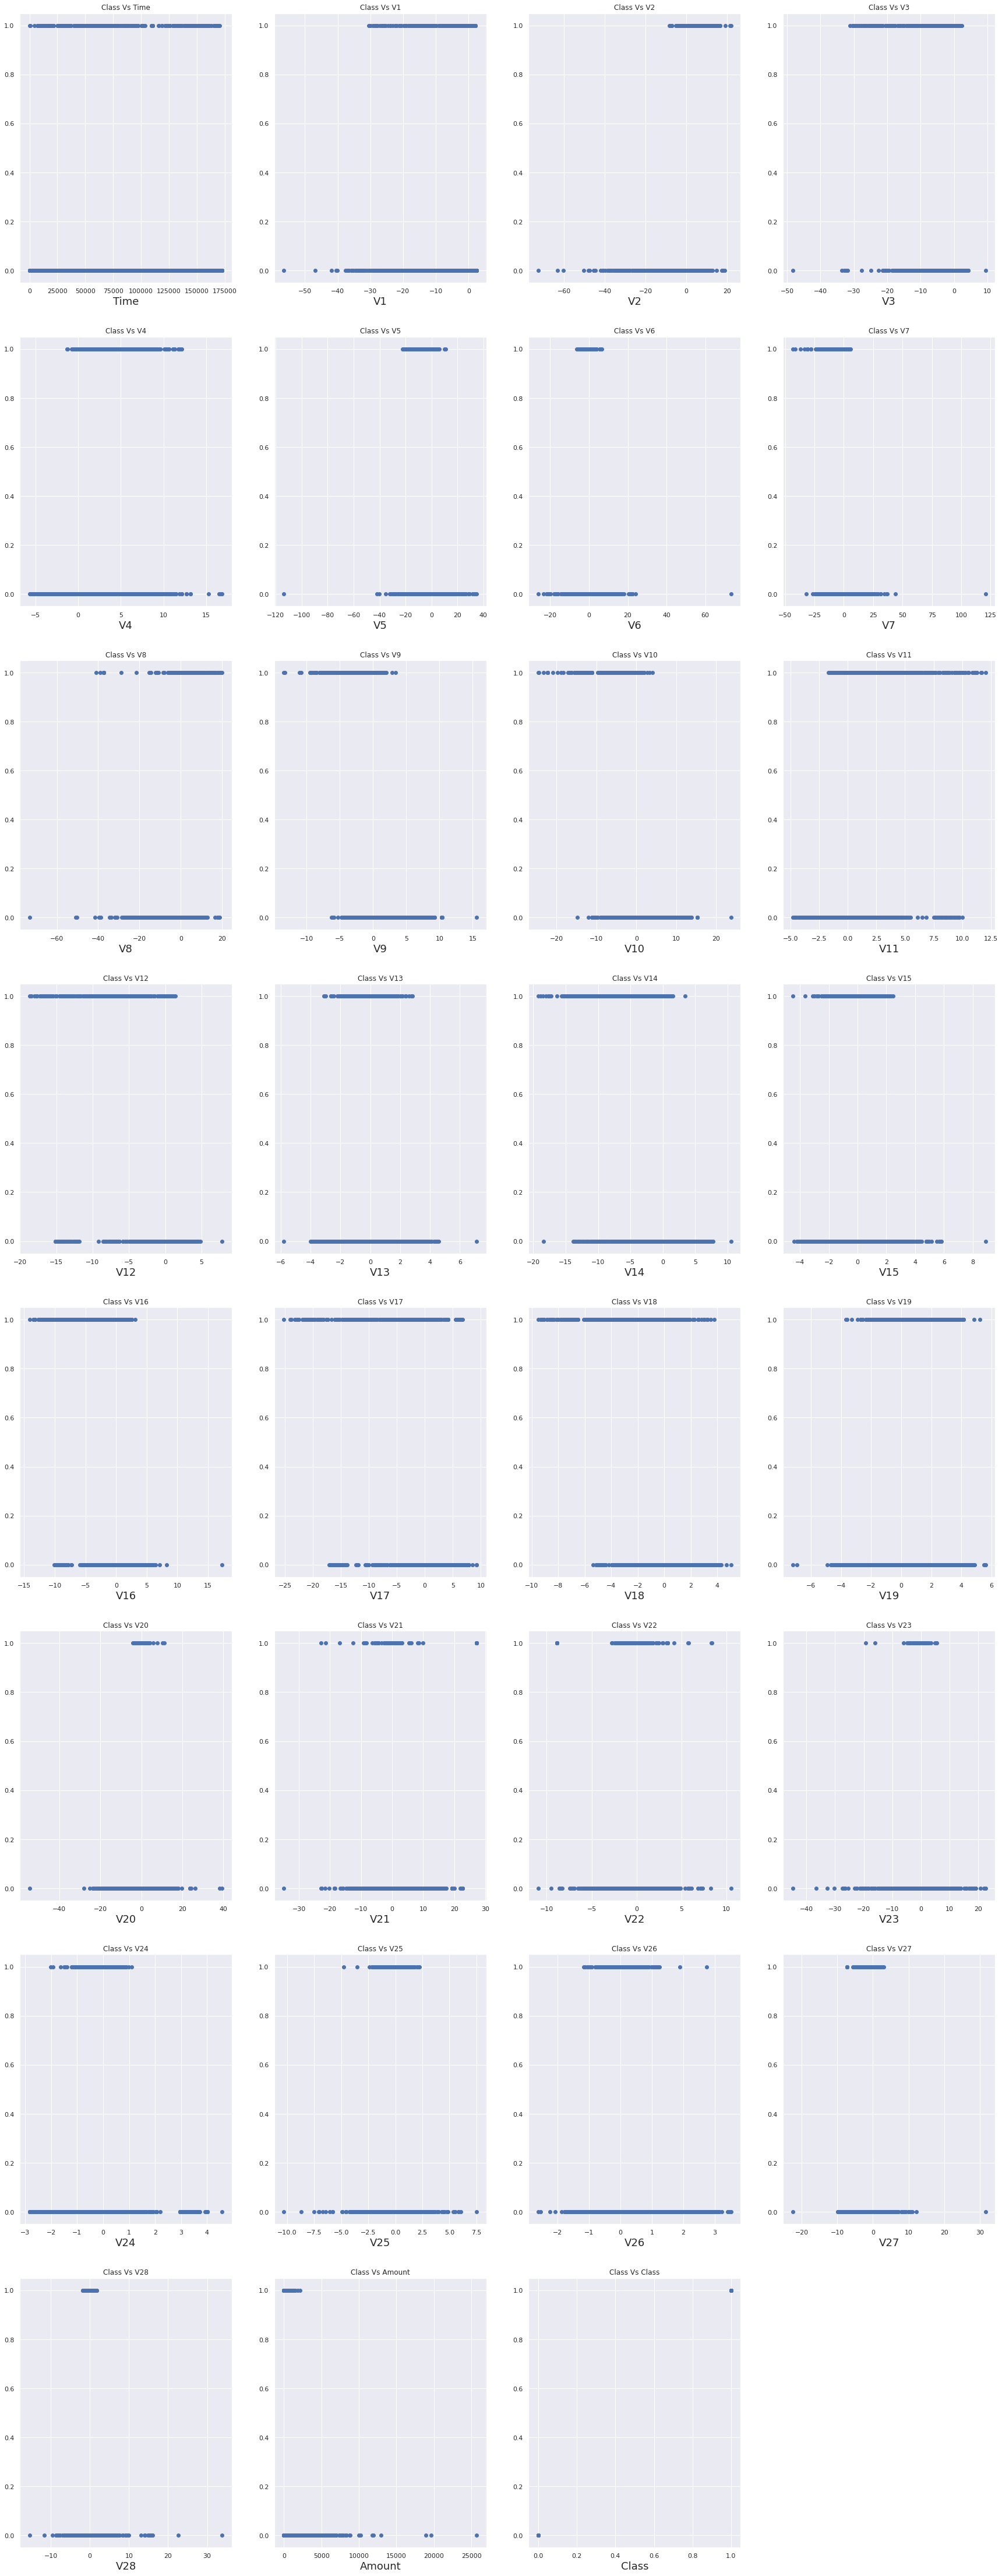

In [17]:
#let’s plot a graph using scatter plot for all numerical data with target variable 'Class'

plt.figure(figsize=(30,80))
for i, j in enumerate(cc_df.columns):
    plt.subplot(8,4,i+1)
    plt.scatter(cc_df[j], cc_df['Class'])
    plt.xlabel(j,fontsize=18)
    plt.title("Class Vs " + j)
plt.show()

In [18]:
# Drop unnecessary columns

#As mentioned above there is no specific pattern observed for fraud or non-fraud transaction with Time variable. So dropping Time column from dataset.

#Before dropping shape of dataframe
print("Before dropping shape of dataframe: ", cc_df.shape)

cc_df.drop(['Time'], axis=1, inplace=True)

#After dropping shape of dataframe
print("After dropping shape of dataframe: ", cc_df.shape)

Before dropping shape of dataframe:  (284807, 31)
After dropping shape of dataframe:  (284807, 30)


In [19]:
#Check the dataframe now
print(cc_df.Class.value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [20]:
cc_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## <font color = "maroon">Data Preparation for Model</font>

### Splitting the data into train & test data

In [21]:
# Class is target variable, so capturing all feature variables in x
X = cc_df.drop(['Class'], axis=1)

#class variable
y= cc_df.Class

In [22]:
# We specify this so that the train and test data set always have the same rows, respectively. Split it in 70-30 proportion.

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [23]:
#Let's check shape of train and test set
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (199364, 29)
X_test shape:  (85443, 29)
y_train shape:  (199364,)
y_test shape:  (85443,)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [24]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


**We just need to do Feature scaling for Amount features to scale as rest are fine due to those are scalled already by PCA transformation.**

#### <font color="maroon">Rescaling the Features</font>

Scaling doesn't impact our model. So here we can see that only those columns are having small integer or binary values for which dummy variable is created. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might create problem at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:

1. Min-Max scaling (normalisation)
2. Standardisation (mean-0, sigma-1) 

So in our case we will be using Min-Max scaling.

Min-Max Scaling (normalisation)

normalisation: $\frac{x - x_{max}}{x_{max} -x_{min}}$

In [25]:
#Creating StandardScaler instance
scaler = StandardScaler()

#### fit() : This used to learn $(x_{min}, x_{max})$
#### transform() : This used to compute $\frac{x - x_{min}}{x_{max} - x_{min}}$
#### fit_transform() : This do both above together learn $(x_{min}, x_{max})$ and compute ($\frac{x - x_{min}}{x_{max} - x_{min}}$)

In [26]:
# scaler fit and transform train data
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [27]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7610,1.160485,0.010653,0.731921,-0.083757,-0.204162,0.309873,-0.503116,0.130077,1.279474,-0.528215,3.021936,-0.953080,2.523534,1.642896,0.223514,-0.059052,0.630296,-0.664479,-0.614659,-0.109200,-0.167768,-0.142183,0.148065,-0.261307,-0.052688,0.904879,-0.061990,-0.012372,-0.354837
190214,2.054237,-0.078678,-1.233161,0.183785,0.187539,-0.605905,0.102048,-0.183363,0.245017,0.229607,0.610062,1.214313,0.521753,0.351972,-0.676072,0.208449,-0.738125,-0.275378,0.612126,-0.169517,-0.263893,-0.636424,0.263862,-0.480128,-0.249245,0.206509,-0.072079,-0.074044,-0.350715
130590,1.434517,-1.560173,-0.783968,-2.432927,0.578638,3.528638,-1.814737,0.859190,-1.680052,1.451927,-0.311041,-1.048697,0.620637,-0.406962,1.014342,0.189104,-0.129896,0.835635,-0.120798,-0.068984,-0.020924,0.089320,-0.120671,1.009913,0.510411,-0.038200,0.047306,0.031218,-0.067744
247916,-0.112311,1.235492,-0.312905,-0.502613,0.699869,-1.028247,0.964615,-0.112966,0.082123,-0.539202,-0.183169,0.161022,0.112076,-1.092514,-0.231143,0.111046,0.566802,-0.491726,-0.501441,0.135098,-0.334646,-0.734681,0.161824,0.984857,-0.439226,0.093359,0.332998,0.149541,-0.352316
55518,1.123477,-0.093882,0.988880,0.533433,-0.769281,-0.068741,-0.575773,0.257399,0.235960,0.066642,1.635221,0.595421,-0.843761,0.467763,0.944421,0.460752,-0.391411,-0.042388,-0.463772,-0.170440,-0.003975,-0.052800,0.145628,0.219496,0.000863,0.215796,0.000743,0.013160,-0.331903


In [28]:
#Scaler transform on test data
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.347913
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.327901
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.869501
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.351915
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.234725


### Plotting the distribution of a variable

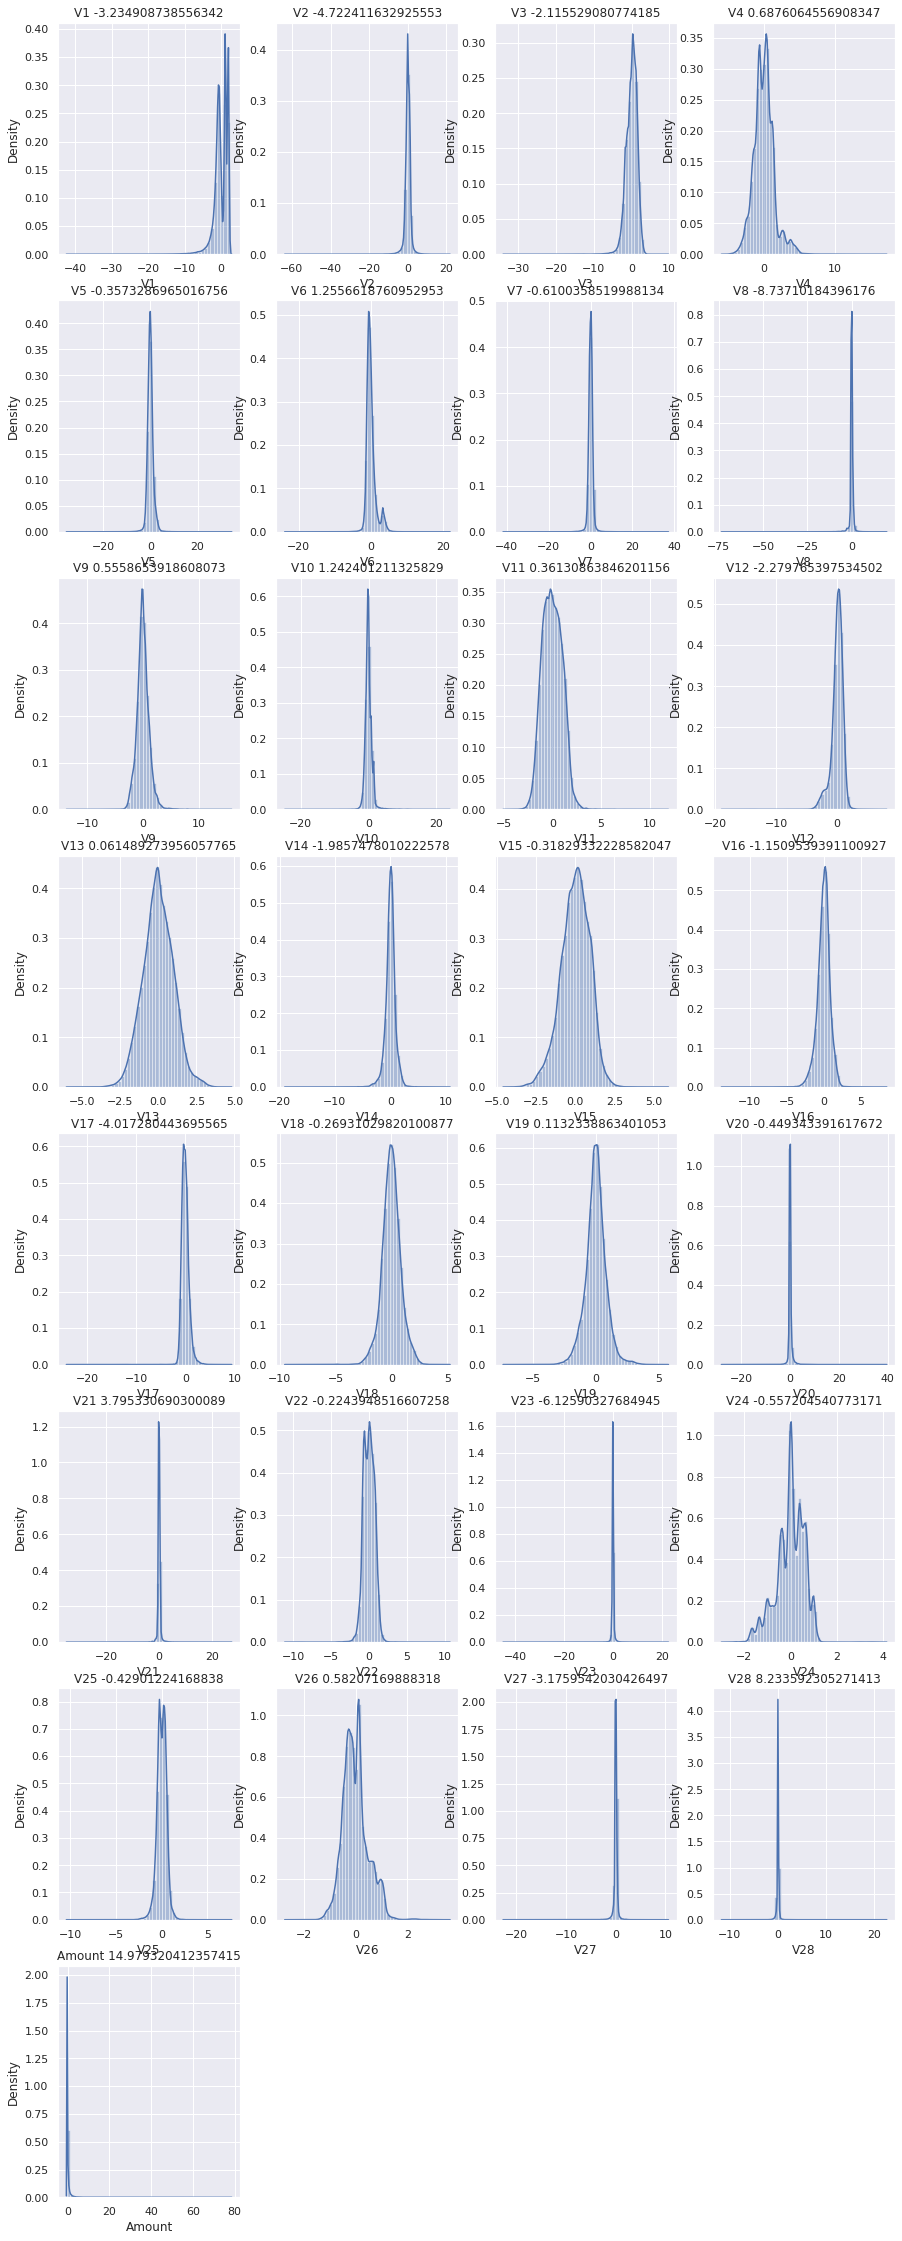

In [29]:
# plot the histogram of a variable from the dataset to see the skewness
x = 0
plt.figure(figsize=(15,40))
for col in X_train.columns :    
    x += 1
    plt.subplot(8, 4, x)    
    sns.distplot(X_train[col])
    plt.title(col + ' '+ str(X_train[col].skew()))

#### <font color="maroon">Observation:</font>

`Few features are still heavily skewed henceforth we first need to mitigate the skewness and make them into normal distribution.`

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [30]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

# Initiate powertransformer
PT = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[X_train.columns] = PT.fit_transform(X_train)

# Transform the test set
X_test[X_test.columns] = PT.transform(X_test)

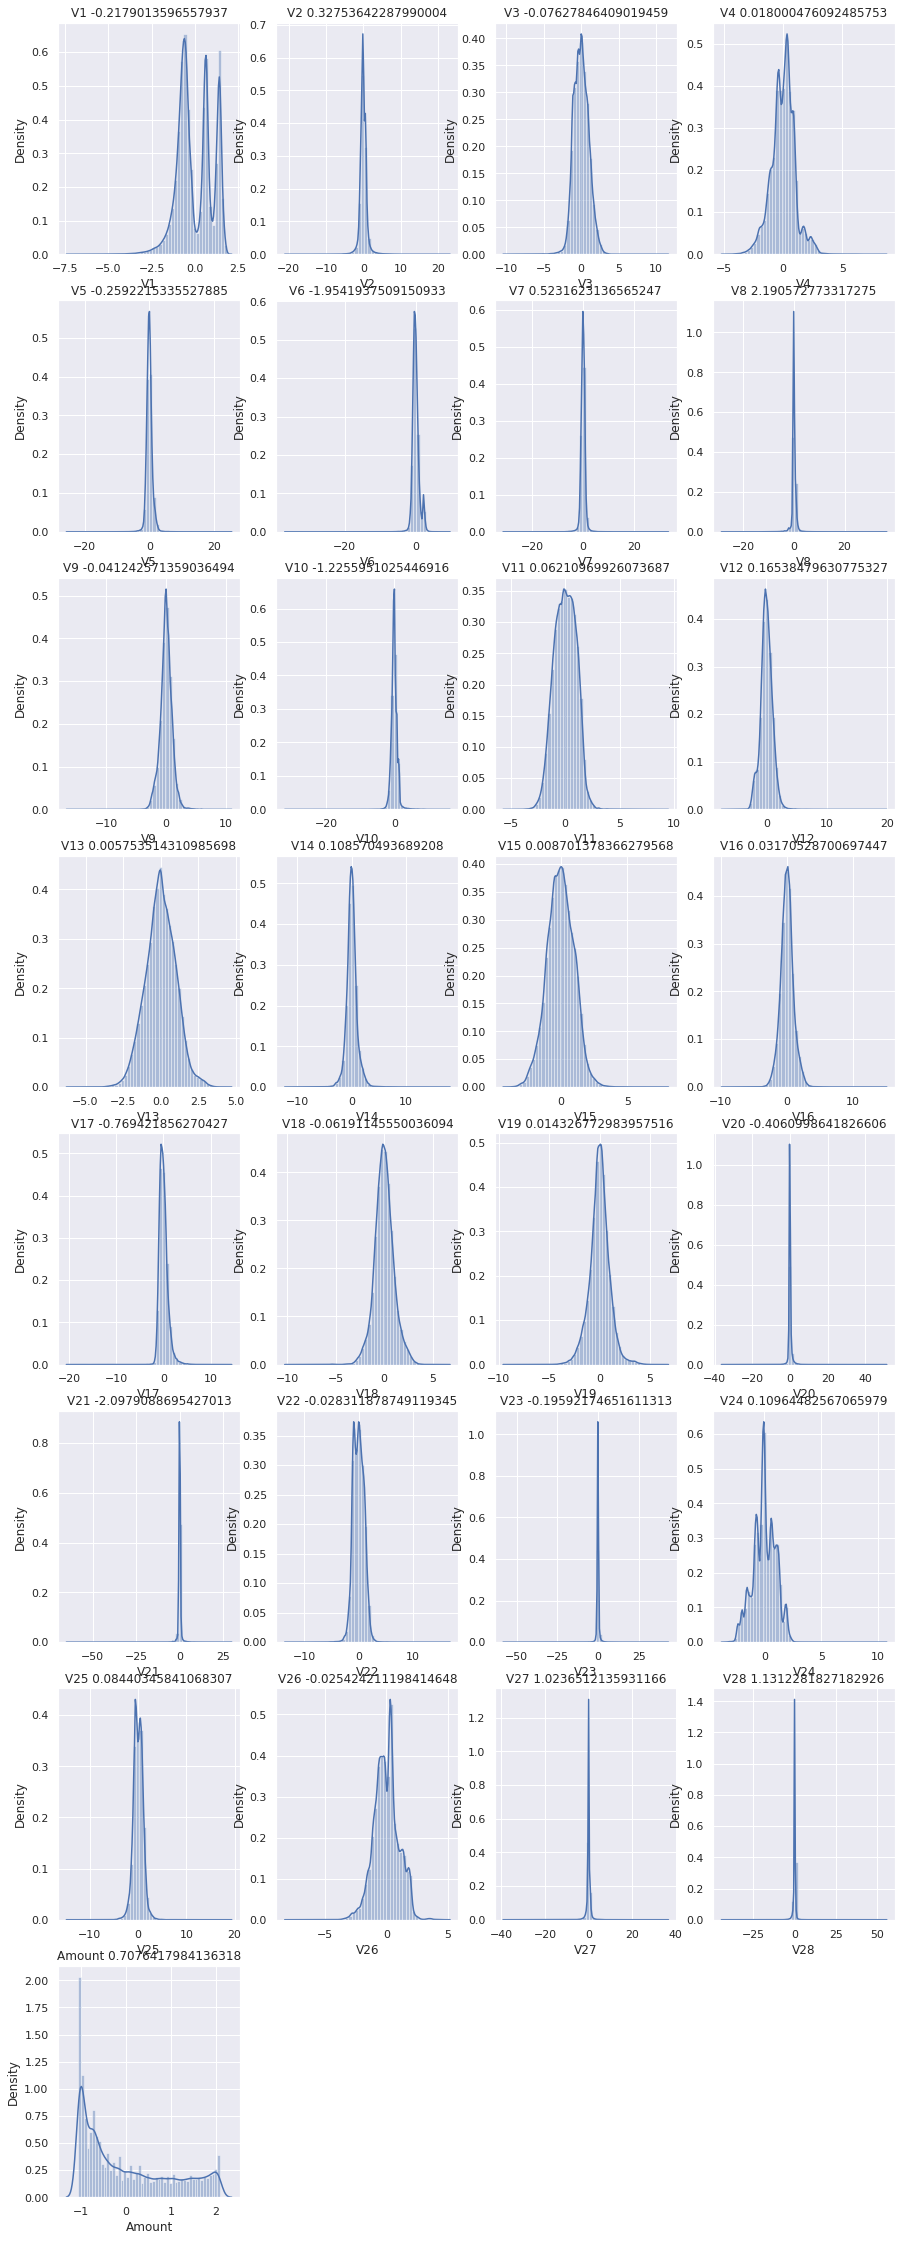

In [31]:
# plot the histogram of a variable from the dataset again to see the result after PorwerTransformer
x = 0
plt.figure(figsize=(15,40))
for col in X_train.columns :    
    x += 1
    plt.subplot(8, 4, x)    
    sns.distplot(X_train[col])
    plt.title(col + ' '+ str(X_train[col].skew()))

**<font color="maroon">Observations:</font>**

Based on above graph, all features are normally distributed and we can proceed with model building.

## <font color="maroon">Model Building with Imbalance DataSet:</font>

- Build different models on the imbalanced dataset and see the result.
- We will use below model for verification.
    - Logistic regression
    - Decision tree
    - Randomforest
    - XGBoost
    - KNN
    - SVM

In [32]:
# Create a DataFrame which stores all train and test score for each model
metric_score_df = pd.DataFrame({"Model":[None],
                                "accuracy":[None],
                                "precision":[None],
                                "recall":[None],
                                "f1_score":[None],
                                "roc_auc":[None]})

In [33]:
#Define a function to check the performance of all above models on test and train data
#To evaluate we will take below metrics on train and test data
#Accuracy
#Precision
#recall
#f1_score
#ROC_AUC

#Function will return a DataFrame with all the scores of metrics used.

def calculate_model_peformance(model_name, y_train, y_train_pred, pred_train_prob, trainLbl, y_test, y_test_pred, pred_test_prob, testLbl):
    
    #Metrics for TRAIN DATA
    print(f"\n{model_name} Model Performance Report on {trainLbl} Data:")
    
    accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
    print(f"Accuracy: {accuracy_train}")
    
    precision_train = metrics.precision_score(y_train,y_train_pred)
    print(f"Precision: {precision_train}")
    
    recall_train = metrics.recall_score(y_train,y_train_pred)
    print(f"Recall: {recall_train}")
    
    f1_score_train = metrics.f1_score(y_train,y_train_pred)
    print(f"F1_score: {f1_score_train}")
    
    roc_auc_train = metrics.roc_auc_score(y_train,pred_train_prob)
    print(f"Roc_auc: {roc_auc_train}")

    metric_train = {"Model":[model_name + " on train data"], 
                         "accuracy":[accuracy_train],
                         "precision":[precision_train],
                         "recall":[recall_train],
                         "f1_score":[f1_score_train],
                         "roc_auc":[roc_auc_train]   
                    }

    metric_df = pd.DataFrame(metric_train)
    
    #Metrics for TEST DATA
    print(f"\n{model_name} Model Performance Report on {testLbl} Data:")
    
    accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
    print(f"Accuracy: {accuracy_test}")
    
    precision_test = metrics.precision_score(y_test,y_test_pred)
    print(f"Precision: {precision_test}")
    
    recall_test = metrics.recall_score(y_test,y_test_pred)
    print(f"Recall: {recall_test}")
    
    f1_score_test = metrics.f1_score(y_test,y_test_pred)
    print(f"F1_score: {f1_score_test}")
    
    roc_auc_test = metrics.roc_auc_score(y_test,pred_test_prob)
    print(f"Roc_auc: {roc_auc_test}")
    
    metric_test = {"Model":[model_name + " on test data"], 
                         "accuracy":[accuracy_test],
                         "precision":[precision_test],
                         "recall":[recall_test],
                         "f1_score":[f1_score_test],
                         "roc_auc":[roc_auc_test]   
                    }

    metric_df = metric_df.append(pd.DataFrame(metric_test), ignore_index=True)
    
    return metric_df

In [34]:
#Define a function to Visualize Confusion Matrix and ROC Curve of all above models on train data

def visualize_model_train(model_name, model_obj, df_train, y_train, y_pred):
    #Plot confusion matrix for Model
    plt.figure(figsize=(8, 6))
    print("================================================================================")
    print(f"Confusion Matrix and ROC Curve of {model_name} Model on Train Data")
    print("================================================================================")    
    confusion = metrics.confusion_matrix(y_train, y_pred)
    print(confusion)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy: ",metrics.accuracy_score(y_train, y_pred))

    # Sensitivity
    print("Sensitivity: ",TP / float(TP+FN))

    # Specificity
    print("Specificity: ", TN / float(TN+FP))

    #metrics.plot_confusion_matrix(model_obj, df_train, y_train, cmap="Greens")
    #plt.show()
    
    #Plot ROC_AUC Curve for Model
    metrics.plot_roc_curve(model_obj, df_train, y_train)
    plt.show()

In [35]:
#Define a function to Visualize Confusion Matrix and ROC Curve of all above models on test data

def visualize_model_test(model_name, model_obj, df_test, y_test, y_pred):
    
    #Plot confusion matrix for Model
    plt.figure(figsize=(8, 6))
    print("================================================================================")
    print(f"Confusion Matrix and ROC Curve of {model_name} Model on Test Data")
    print("================================================================================")
    
    confusion = metrics.confusion_matrix(y_test, y_pred)
    print(confusion)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Accuracy
    print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

    # Sensitivity
    print("Sensitivity: ",TP / float(TP+FN))

    # Specificity
    print("Specificity: ", TN / float(TN+FP))
    
    #metrics.plot_confusion_matrix(model_obj, df_test, y_test, cmap="Greens")
    #plt.show()
    
    #Plot ROC_AUC Curve for Model
    metrics.plot_roc_curve(model_obj, df_test, y_test)    
    plt.show()

### Why we are using Stratified K-Fold Cross Validation

- In the machine learning process, we divide the data into train, test and validation sets to evaluate the model’s performance. However, the test and validation sets may increase the variance when the performance of a particular test set might differ from that of another test set.
- This hold-out approach (train-test-val) is better when we have **enough data points** in **`both` classes**. However, when the **data is imbalanced or `less`**, it is better to use **K-Fold Cross Validation** for evaluating the performance when the data set is randomly split into ‘k’ groups. Out of these groups, one will be used as the test set, and the remaining groups will be used as train sets. To evaluate the performance, the model will be trained on k-1 groups and then scored using the test set. This process will be iterated until each unique group has been used as the test set.
- **Stratified K-Fold Cross Validation** is an **`Extension of K-Fold Croos Validation`** in which we rearrange the data to ensure that each fold is a good representative of all the strata of the data. For imbalanced data, such as the one that we will be focusing in this capstone, it is important that the class distribution in each fold is the same as that in the original data set. Stratification ensures that each fold is representative of all the strata of the data.

# <font color="Blue">Imbalance DataSet</font>

## <font color="green">1. Logistic Regression</font>

In [38]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Instantiate logistic regression
lr = LogisticRegression(random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
lr_cv = GridSearchCV(estimator = lr,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
lr_cv.fit(X_train, y_train)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649286986.8543773 seconds
Fitting 5 folds for each of 6 candidates, totalling 30 fits

End Time =  1649287022.4526258 seconds

Execution Time =  00:00:35


In [39]:
# results of grid search CV
cv_results = pd.DataFrame(lr_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.175930,0.058835,0.036464,0.011684,0.01,{'C': 0.01},0.984654,0.978224,0.986676,0.978645,0.993324,0.984305,0.005588,1,0.986202,0.988264,0.986435,0.988739,0.984013,0.986731,0.001682
1,1.151833,0.494831,0.021205,0.000208,0.1,{'C': 0.1},0.980024,0.977545,0.984128,0.980108,0.987035,0.981768,0.003375,2,0.986233,0.986063,0.984479,0.986510,0.982994,0.985256,0.001334
2,0.978843,0.034513,0.021921,0.001242,1,{'C': 1},0.978607,0.976579,0.983574,0.980010,0.984618,0.980678,0.003015,3,0.985813,0.985115,0.983520,0.985506,0.982418,0.984474,0.001297
3,0.980122,0.054892,0.021096,0.000188,10,{'C': 10},0.978441,0.976446,0.983498,0.979986,0.984307,0.980536,0.002980,4,0.985755,0.984990,0.983397,0.985379,0.982342,0.984373,0.001295
4,1.000552,0.069189,0.021296,0.000499,100,{'C': 100},0.978418,0.976437,0.983492,0.979988,0.984272,0.980521,0.002976,5,0.985750,0.984978,0.983384,0.985366,0.982333,0.984362,0.001295


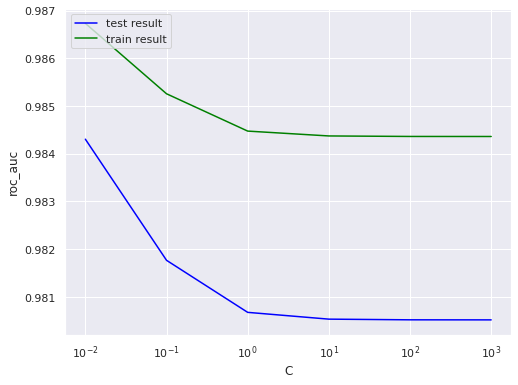

In [40]:
#print the evaluation result by choosing a evaluation metric

# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'],color='blue')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'],color='green')
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [41]:
# Best score with best C
best_score = lr_cv.best_score_
best_C = lr_cv.best_params_['C']

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9843045235417861
Best hyperparameters is 0.01


We got the optimal value of c = 0.01 , lets initiate logistic regression model with `c=0.01`

In [42]:
#Prediction on train data
y_pred_lr = lr_cv.predict(X_train)

#check predict probability on train data
pred_prob = lr_cv.predict_proba(X_train)


#Prediction on test data
y_test_pred_lr = lr_cv.predict(X_test)

#check predict probability on test data
pred_test_prob = lr_cv.predict_proba(X_test)

In [43]:
#check various scores on train and test data for Logistics Regression Model
model_perf_df = calculate_model_peformance("Logistic Regression", y_train, y_pred_lr, pred_prob[:,1], "Train", y_test, y_test_pred_lr, pred_test_prob[:,1], "Test")


Logistic Regression Model Performance Report on Train Data:
Accuracy: 0.9992877349972914
Precision: 0.9193548387096774
Recall: 0.6514285714285715
F1_score: 0.7625418060200669
Roc_auc: 0.9865309547497736

Logistic Regression Model Performance Report on Test Data:
Accuracy: 0.9991456292499094
Precision: 0.8165137614678899
Recall: 0.6267605633802817
F1_score: 0.7091633466135459
Roc_auc: 0.9679881731155506


Confusion Matrix and ROC Curve of Logistic Regression Train Model on Train Data
[[198994     20]
 [   122    228]]
Accuracy:  0.9992877349972914
Sensitivity:  0.6514285714285715
Specificity:  0.9998995045574683


<Figure size 576x432 with 0 Axes>

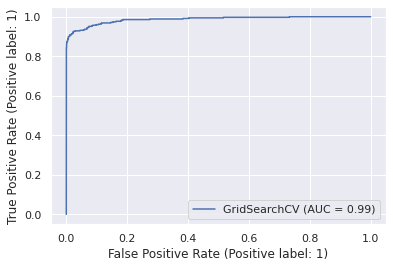

Confusion Matrix and ROC Curve of Logistic Regression Test Model on Test Data
[[85281    20]
 [   53    89]]
Accuracy:  0.9991456292499094
Sensitivity:  0.6267605633802817
Specificity:  0.9997655361601857


<Figure size 576x432 with 0 Axes>

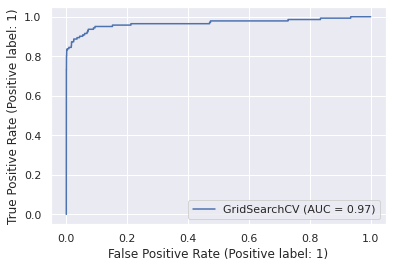

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988


In [44]:
#Plot confusion matrix and ROC_AUC Curve for Logistic Regression Model on Train Data
visualize_model_train("Logistic Regression Train", lr_cv, X_train, y_train,y_pred_lr)

#Plot confusion matrix and ROC_AUC Curve for Logistic Regression Model on Test Data
visualize_model_test("Logistic Regression Test", lr_cv, X_test, y_test,y_test_pred_lr)

#Generate a metric score for Logistic Regression

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = pd.DataFrame(model_perf_df)
metric_score_df

### Similarly explore other algorithms by building models like:
- Decision Tree
- Random Forest
- XGBoost

## <font color="green">2. Decision Tree</font>

In [47]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8]}

#Instantiate Decision Tree
dt_obj = DecisionTreeClassifier(random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
dt_obj_cv = GridSearchCV(estimator = dt_obj,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
dt_obj_cv.fit(X_train, y_train)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649287196.2196424 seconds
Fitting 5 folds for each of 15 candidates, totalling 75 fits

End Time =  1649287501.2730174 seconds

Execution Time =  00:05:05


In [48]:
# results of grid search CV
cv_results = pd.DataFrame(dt_obj_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.906576,0.628310,0.021383,0.006508,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.914025,0.914097,0.921366,0.914092,0.906946,0.914105,0.004560,11,0.917727,0.923068,0.921249,0.919510,0.924848,0.921281,0.002517
1,3.939751,0.498538,0.022954,0.004231,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.914026,0.914088,0.921350,0.914088,0.892664,0.911243,0.009708,14,0.917720,0.923059,0.921239,0.919508,0.924840,0.921273,0.002516
2,2.506026,0.491618,0.015425,0.003087,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.928286,0.885574,0.921344,0.928331,0.906920,0.914091,0.016258,12,0.917695,0.912375,0.921221,0.919489,0.924825,0.919121,0.004114
3,2.111907,0.019044,0.012896,0.000186,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.928288,0.914022,0.928361,0.928287,0.906926,0.921177,0.009022,7,0.917684,0.930131,0.926539,0.926556,0.924804,0.925143,0.004113
4,2.102002,0.010118,0.013041,0.000257,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.935351,0.913973,0.928336,0.928259,0.914016,0.923987,0.008556,5,0.924752,0.930088,0.926465,0.926515,0.926518,0.926868,0.001747


In [49]:
# Best score with best C
best_score = dt_obj_cv.best_score_
best_C = dt_obj_cv.best_estimator_

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9438721968724746
Best hyperparameters is DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)


#### Model with optimal hyperparameters

In [50]:
#Based on best score and hyper parameter, let's see the result.

dt_obj = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=5, 
                                  min_samples_leaf=50)

dt_obj.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)

In [51]:
#Prediction on train data
y_pred_dt = dt_obj.predict(X_train)

#check predict probability on train data
pred_prob = dt_obj.predict_proba(X_train)

#Prediction on test data
y_test_pred_dt = dt_obj.predict(X_test)

#check predict probability on test data
pred_test_prob = dt_obj.predict_proba(X_test)

In [52]:
#check various scores on train and test data for Decision Tree Model
model_perf_df = calculate_model_peformance("Decision Tree", y_train, y_pred_dt, pred_prob[:,1], "Train", y_test, y_test_pred_dt, pred_test_prob[:,1], "Test")


Decision Tree Model Performance Report on Train Data:
Accuracy: 0.9992526233422283
Precision: 0.8736059479553904
Recall: 0.6714285714285714
F1_score: 0.7592891760904683
Roc_auc: 0.9497851766350967

Decision Tree Model Performance Report on Test Data:
Accuracy: 0.9990168884519505
Precision: 0.7589285714285714
Recall: 0.5985915492957746
F1_score: 0.6692913385826771
Roc_auc: 0.9094927473894845


Confusion Matrix and ROC Curve of Decision Tree Train Model on Train Data
[[198980     34]
 [   115    235]]
Accuracy:  0.9992526233422283
Sensitivity:  0.6714285714285714
Specificity:  0.9998291577476961


<Figure size 576x432 with 0 Axes>

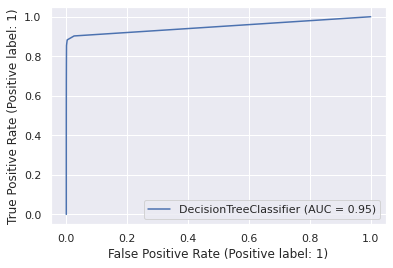

Confusion Matrix and ROC Curve of Decision Tree Test Model on Test Data
[[85274    27]
 [   57    85]]
Accuracy:  0.9990168884519505
Sensitivity:  0.5985915492957746
Specificity:  0.9996834738162507


<Figure size 576x432 with 0 Axes>

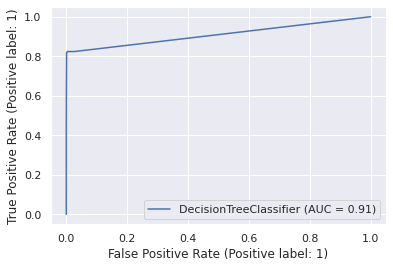

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493


In [53]:
#Plot confusion matrix and ROC_AUC Curve for Decision Tree Model on Train Data
visualize_model_train("Decision Tree Train", dt_obj, X_train, y_train,y_pred_dt)

#Plot confusion matrix and ROC_AUC Curve for Decision Tree Model on Test Data
visualize_model_test("Decision Tree Test", dt_obj, X_test, y_test,y_test_pred_dt)

#Generate a metric score for Decision Tree

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

## <font color="green">3. Random Forest</font>

In [54]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 
                
#perform hyperparameter tuning and using below parameters.
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8], 'n_estimators': [50,80]}

#Instantiate Random Forest
rf_obj = RandomForestClassifier(random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
rf_obj_cv = GridSearchCV(estimator = rf_obj,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
rf_obj_cv.fit(X_train, y_train)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649287506.7240803 seconds
Fitting 5 folds for each of 30 candidates, totalling 150 fits

End Time =  1649291712.262973 seconds

Execution Time =  01:10:05


In [55]:
# results of grid search CV
cv_results = pd.DataFrame(rf_obj_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.123269,0.064790,0.097975,0.002800,gini,3,5,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.965935,0.927028,0.936157,0.936164,0.936168,0.940291,0.013301,28,0.953480,0.975319,0.959771,0.953223,0.946404,0.957640,0.009800
1,19.343443,0.059204,0.149712,0.004347,gini,3,5,80,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.964913,0.946481,0.960315,0.949336,0.940754,0.952360,0.008936,23,0.952878,0.975226,0.959171,0.959167,0.949893,0.959267,0.008757
2,12.092945,0.045592,0.096127,0.001360,gini,3,10,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.960595,0.926039,0.937195,0.950193,0.936396,0.942083,0.012018,27,0.949429,0.974176,0.959244,0.963201,0.946970,0.958604,0.009834
3,19.239279,0.062137,0.149101,0.004351,gini,3,10,80,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.959539,0.945290,0.957476,0.949737,0.941480,0.950704,0.006917,24,0.952201,0.974976,0.959696,0.962539,0.951277,0.960138,0.008575
4,12.027456,0.048754,0.095474,0.000971,gini,3,20,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.942681,0.924776,0.941125,0.935160,0.935328,0.935814,0.006291,30,0.941252,0.969720,0.960216,0.952085,0.948534,0.954361,0.009810


In [56]:
# Best score with best C
best_score = rf_obj_cv.best_score_
best_C = rf_obj_cv.best_estimator_

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9753819804609168
Best hyperparameters is RandomForestClassifier(max_depth=8, min_samples_leaf=50, n_estimators=80,
                       random_state=42)


#### Model with optimal hyperparameters

In [57]:
#Based on best score and hyper parameter, let's see the result.

rf_obj = RandomForestClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=8, 
                                  min_samples_leaf=50,
                               n_estimators=80)

rf_obj.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=50, n_estimators=80,
                       random_state=42)

In [58]:
#Prediction on train data
y_pred_rf = rf_obj.predict(X_train)

#check predict probability on train data
pred_prob = rf_obj.predict_proba(X_train)


#Prediction on test data
y_test_pred_rf = rf_obj.predict(X_test)

#check predict probability on test data
pred_test_prob = rf_obj.predict_proba(X_test)

In [59]:
#check various scores on train and test data for Random Forest Model
model_perf_df = calculate_model_peformance("Random Forest", y_train, y_pred_rf, pred_prob[:,1], "Train", y_test, y_test_pred_rf, pred_test_prob[:,1], "Test")


Random Forest Model Performance Report on Train Data:
Accuracy: 0.9992927509480147
Precision: 0.8943396226415095
Recall: 0.6771428571428572
F1_score: 0.7707317073170733
Roc_auc: 0.9935194939623775

Random Forest Model Performance Report on Test Data:
Accuracy: 0.9990988144142879
Precision: 0.7876106194690266
Recall: 0.6267605633802817
F1_score: 0.6980392156862746
Roc_auc: 0.9697549076831653


Confusion Matrix and ROC Curve of Random Forest Train Model on Train Data
[[198986     28]
 [   113    237]]
Accuracy:  0.9992927509480147
Sensitivity:  0.6771428571428572
Specificity:  0.9998593063804556


<Figure size 576x432 with 0 Axes>

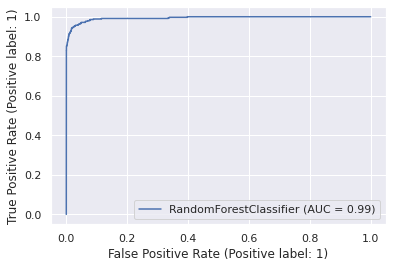

Confusion Matrix and ROC Curve of Random Forest Test Model on Test Data
[[85277    24]
 [   53    89]]
Accuracy:  0.9990988144142879
Sensitivity:  0.6267605633802817
Specificity:  0.9997186433922228


<Figure size 576x432 with 0 Axes>

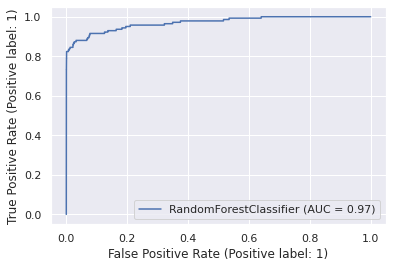

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755


In [60]:
#Plot confusion matrix and ROC_AUC Curve for Random Forest Model on Train Data
visualize_model_train("Random Forest Train", rf_obj, X_train, y_train,y_pred_rf)

#Plot confusion matrix and ROC_AUC Curve for Random Forest Model on Test Data
visualize_model_test("Random Forest Test", rf_obj, X_test, y_test,y_test_pred_rf)

#Generate a metric score for Random Forest

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

## <font color="green">4. XGBoost</font>

In [61]:
#!pip install xgboost

# Finding the best number of trees in XGBoost

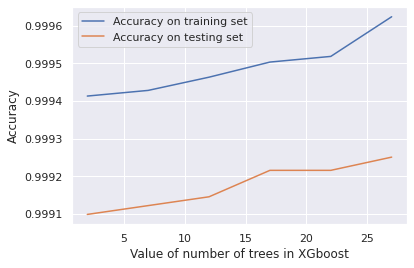

In [62]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree,eval_metric='mlogloss')
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [63]:
xgb.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(eval_metric='mlogloss', n_estimators=27)>

### Here best number of trees in XGB is 27

In [64]:
xgb=XGBClassifier(n_estimators=27,eval_metric='mlogloss')
xgb.fit(X_train,y_train)
print('Accuracy of XGB n_estimators=27 on the testing dataset is :{:.3f}'.format(xgb.score(X_test,y_test)))

Accuracy of XGB n_estimators=27 on the testing dataset is :0.999


In [65]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {'learning_rate': [0.1, 0.3, 0.5], 
          'subsample': [0.3, 0.5, 0.7],
          'max_depth':[5,6], 
          'n_estimators': [27]}

#Instantiate XGBoost Forest
xgb_obj = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Specifing score as recall as we are more focused on achieving the higher sensitivity than the accuracy
xgb_obj_cv = GridSearchCV(estimator = xgb_obj,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
xgb_obj_cv.fit(X_train, y_train)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649291827.6932569 seconds
Fitting 5 folds for each of 18 candidates, totalling 90 fits

End Time =  1649292868.074024 seconds

Execution Time =  00:17:20


In [66]:
# results of grid search CV
cv_results = pd.DataFrame(xgb_obj_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.386950,0.098290,0.035188,0.003502,0.1,5,27,0.3,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.934625,0.947003,0.942357,0.940461,0.927892,0.938468,0.006612,14,0.941891,0.960644,0.938811,0.960828,0.938699,0.948174,0.010320
1,10.683899,0.207739,0.033932,0.000948,0.1,5,27,0.5,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.935265,0.947004,0.935447,0.927122,0.928203,0.934608,0.007097,18,0.935311,0.960729,0.933650,0.950734,0.933653,0.942815,0.011026
2,11.513957,0.187264,0.034291,0.000966,0.1,5,27,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.935335,0.913821,0.952802,0.927139,0.948134,0.935446,0.014134,16,0.935390,0.940750,0.969095,0.950738,0.951918,0.949578,0.011550
3,8.760409,0.142424,0.034715,0.001718,0.1,6,27,0.3,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.934622,0.947321,0.942347,0.940483,0.927894,0.938533,0.006694,13,0.941891,0.960822,0.938806,0.960934,0.938700,0.948230,0.010390
4,11.457986,0.113960,0.034258,0.000949,0.1,6,27,0.5,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.935270,0.947053,0.935454,0.927129,0.928207,0.934623,0.007112,17,0.935318,0.960968,0.933656,0.950756,0.933665,0.942873,0.011103


In [67]:
# Best score with best C
best_score = xgb_obj_cv.best_score_
best_C = xgb_obj_cv.best_estimator_

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9773204696930684
Best hyperparameters is XGBClassifier(eval_metric='mlogloss', learning_rate=0.3, max_depth=6,
              n_estimators=27, random_state=42, subsample=0.5)


#### Model with optimal hyperparameters

In [68]:
#Based on best score and hyper parameter, let's see the result.

xgb_obj = XGBClassifier(random_state=42, 
                        eval_metric='mlogloss',
                        learning_rate=0.3,
                        subsample=0.5,
                        max_depth=6, 
                        n_estimators=27)

xgb_obj.fit(X_train, y_train)

XGBClassifier(eval_metric='mlogloss', learning_rate=0.3, max_depth=6,
              n_estimators=27, random_state=42, subsample=0.5)

In [69]:
#Prediction on train data
y_pred_xgb = xgb_obj.predict(X_train)

#check predict probability on train data
pred_prob = xgb_obj.predict_proba(X_train)


#Prediction on test data
y_test_pred_xgb = xgb_obj.predict(X_test)

#check predict probability on test data
pred_test_prob = xgb_obj.predict_proba(X_test)

In [70]:
#check various scores on train and test data for XGBoost Model
model_perf_df = calculate_model_peformance("XGBoost", y_train, y_pred_xgb, pred_prob[:,1], "Train", y_test, y_test_pred_xgb, pred_test_prob[:,1], "Test")


XGBoost Model Performance Report on Train Data:
Accuracy: 0.9997241227102185
Precision: 0.9900332225913622
Recall: 0.8514285714285714
F1_score: 0.9155145929339478
Roc_auc: 0.9987911905695076

XGBoost Model Performance Report on Test Data:
Accuracy: 0.9994967405170698
Precision: 0.9024390243902439
Recall: 0.7816901408450704
F1_score: 0.8377358490566038
Roc_auc: 0.9738092745639262


Confusion Matrix and ROC Curve of XGBoost Train Model on Train Data
[[199011      3]
 [    52    298]]
Accuracy:  0.9997241227102185
Sensitivity:  0.8514285714285714
Specificity:  0.9999849256836203


<Figure size 576x432 with 0 Axes>

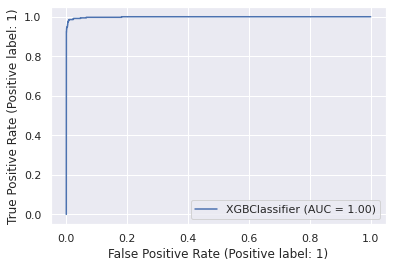

Confusion Matrix and ROC Curve of XGBoost Test Model on Test Data
[[85289    12]
 [   31   111]]
Accuracy:  0.9994967405170698
Sensitivity:  0.7816901408450704
Specificity:  0.9998593216961115


<Figure size 576x432 with 0 Axes>

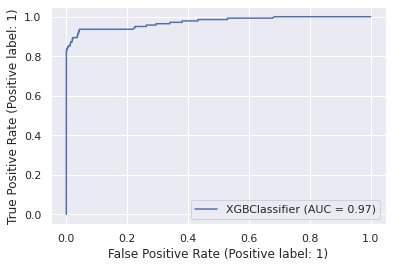

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809


In [71]:
#Plot confusion matrix and ROC_AUC Curve for XGBoost Model on Train Data
visualize_model_train("XGBoost Train", xgb_obj, X_train, y_train,y_pred_xgb)

#Plot confusion matrix and ROC_AUC Curve for XGBoost Model on Test Data
visualize_model_test("XGBoost Test", xgb_obj, X_test, y_test,y_test_pred_xgb)

#Generate a metric score for XGBoost

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

**<font color="maroon">Observations:</font>**

Based on above Performance metrix of all Models, ROC-AUC of XGBoost Model is best for Train and Test Data as compared with other models. So we are going to consider XGBoot as best model though it takes memory and time but the result is good.

In [72]:
clf = XGBClassifier(random_state=42, 
                        eval_metric='mlogloss',
                        learning_rate=0.3,
                        subsample=0.5,
                        max_depth=6, 
                        n_estimators=27)  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

#print --> #print the evaluation score on the X_train by choosing the best evaluation metric
y_train_pred_prob = clf.predict_proba(X_train)[:, 1]
print("ROC-AUC Score of XGBoost Model on Train Data: ", round(metrics.roc_auc_score(y_train, y_train_pred_prob),2))

#print --> #print the evaluation score on the X_test by choosing the best evaluation metric
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]
print("ROC-AUC Score of XGBoost Model on Test Data: ", round(metrics.roc_auc_score(y_test, y_test_pred_prob),2))

ROC-AUC Score of XGBoost Model on Train Data:  1.0
ROC-AUC Score of XGBoost Model on Test Data:  0.97


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 10
3rd Top var = 14


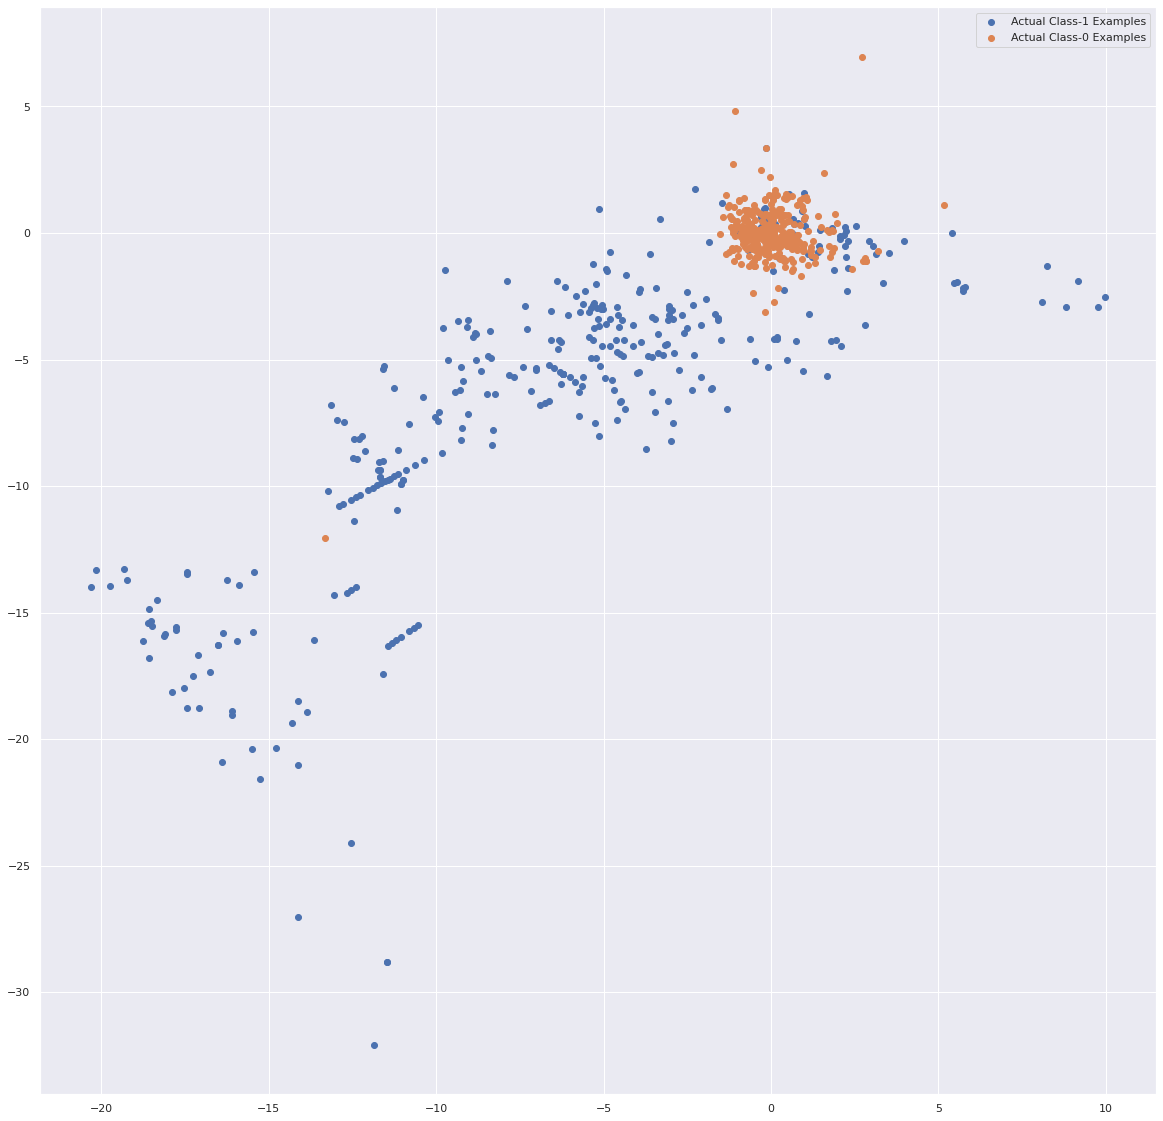

In [73]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

Below models we are going to test with balanced dataset
- Logistic regression
- Decision Tree
- Random forest
- XGBoost

# <font color="Blue">Random Oversampling</font>

In [74]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#Initialize RandomOverSampler
ros_obj = RandomOverSampler(random_state=42)

#Run RandomOverSampler on Train data to handle imbalance
X_train_ros, y_train_ros = ros_obj.fit_resample(X_train, y_train)

print('Class distribution before sampling: ', Counter(y_train))
print('Class distribution after sampling: ', Counter(y_train_ros))

Class distribution before sampling:  Counter({0: 199014, 1: 350})
Class distribution after sampling:  Counter({0: 199014, 1: 199014})


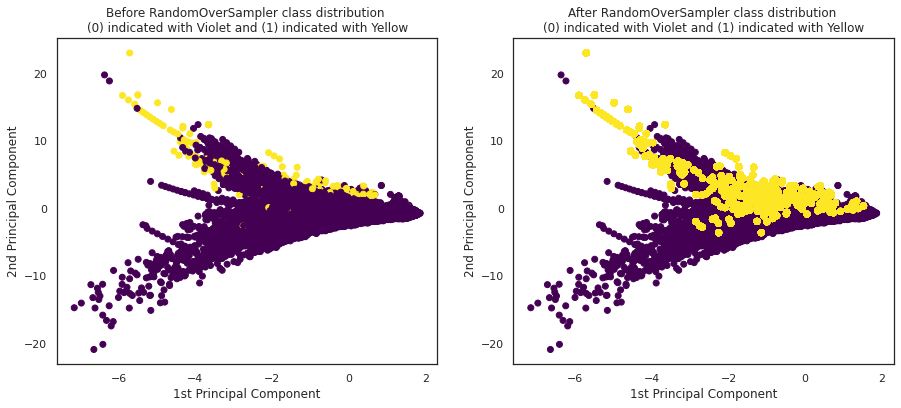

In [75]:
# scatter plot of examples by class labels before and after Random Oversampling

sns.set(style="white")
plt.figure(figsize=(15,6))
#plt.figure(figsize = (6, 10))
plt.subplot(1, 2, 1)
plt.scatter(X_train.V1, X_train.V2, c = y_train,cmap='viridis')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Before RandomOverSampler class distribution \n(0) indicated with Violet and (1) indicated with Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_train_ros.V1, X_train_ros.V2, c = y_train_ros, cmap='viridis')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('After RandomOverSampler class distribution \n(0) indicated with Violet and (1) indicated with Yellow')
plt.show()

## <font color="green">1. Logistic Regression</font>

In [76]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Instantiate logistic regression
lr = LogisticRegression(random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
lr_cv = GridSearchCV(estimator = lr,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
lr_cv.fit(X_train_ros, y_train_ros)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649292918.919928 seconds
Fitting 5 folds for each of 6 candidates, totalling 30 fits

End Time =  1649292981.013859 seconds

Execution Time =  00:01:02


In [77]:
# results of grid search CV
cv_results = pd.DataFrame(lr_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.736048,0.049479,0.039141,0.005189,0.01,{'C': 0.01},0.989547,0.989254,0.989955,0.989495,0.989832,0.989616,0.000250,6,0.989834,0.989687,0.989520,0.989596,0.989544,0.989636,0.000114
1,1.858969,0.090675,0.036746,0.000259,0.1,{'C': 0.1},0.989589,0.989290,0.989983,0.989528,0.989842,0.989647,0.000243,5,0.989866,0.989710,0.989556,0.989631,0.989572,0.989667,0.000113
2,1.802111,0.105421,0.037152,0.000982,1,{'C': 1},0.989589,0.989290,0.989985,0.989529,0.989843,0.989647,0.000244,1,0.989868,0.989711,0.989558,0.989634,0.989573,0.989669,0.000113
3,1.793775,0.085370,0.039769,0.006099,10,{'C': 10},0.989588,0.989289,0.989984,0.989528,0.989843,0.989647,0.000244,4,0.989868,0.989711,0.989558,0.989634,0.989574,0.989669,0.000113
4,1.806427,0.147030,0.037026,0.000399,100,{'C': 100},0.989589,0.989290,0.989984,0.989528,0.989843,0.989647,0.000244,3,0.989868,0.989712,0.989558,0.989633,0.989574,0.989669,0.000113


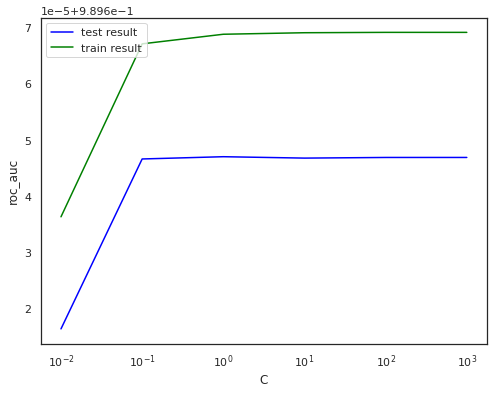

In [78]:
#print the evaluation result by choosing a evaluation metric

# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'],color='blue')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'],color='green')
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [79]:
# Best score with best C
best_score = lr_cv.best_score_
best_C = lr_cv.best_params_['C']

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9896470066239196
Best hyperparameters is 1


We got the optimal value of c = 1 , lets initiate logistic regression model with `c=1`

In [80]:
#Prediction on train data
y_pred_lr = lr_cv.predict(X_train_ros)

#check predict probability on train data
pred_prob = lr_cv.predict_proba(X_train_ros)


#Prediction on test data
y_test_pred_lr = lr_cv.predict(X_test)

#check predict probability on test data
pred_test_prob = lr_cv.predict_proba(X_test)

In [81]:
#check various scores on train and test data for Logistics Regression Model with RandomOverSampler
model_perf_df = calculate_model_peformance("Logistic Regression with RandomOverSampler", y_train_ros, y_pred_lr, pred_prob[:,1], "Train", y_test, y_test_pred_lr, pred_test_prob[:,1], "Test")


Logistic Regression with RandomOverSampler Model Performance Report on Train Data:
Accuracy: 0.9503778628639191
Precision: 0.9749519121223843
Recall: 0.9245078235702011
F1_score: 0.9490600442059056
Roc_auc: 0.989666306238909

Logistic Regression with RandomOverSampler Model Performance Report on Test Data:
Accuracy: 0.9751062111583161
Precision: 0.056721750781598926
Recall: 0.8943661971830986
F1_score: 0.10667786644267115
Roc_auc: 0.9738069216697591


Confusion Matrix and ROC Curve of Logistic Regression with RandomOverSampler Train Model on Train Data
[[194287   4727]
 [ 15024 183990]]
Accuracy:  0.9503778628639191
Sensitivity:  0.9245078235702011
Specificity:  0.9762479021576371


<Figure size 576x432 with 0 Axes>

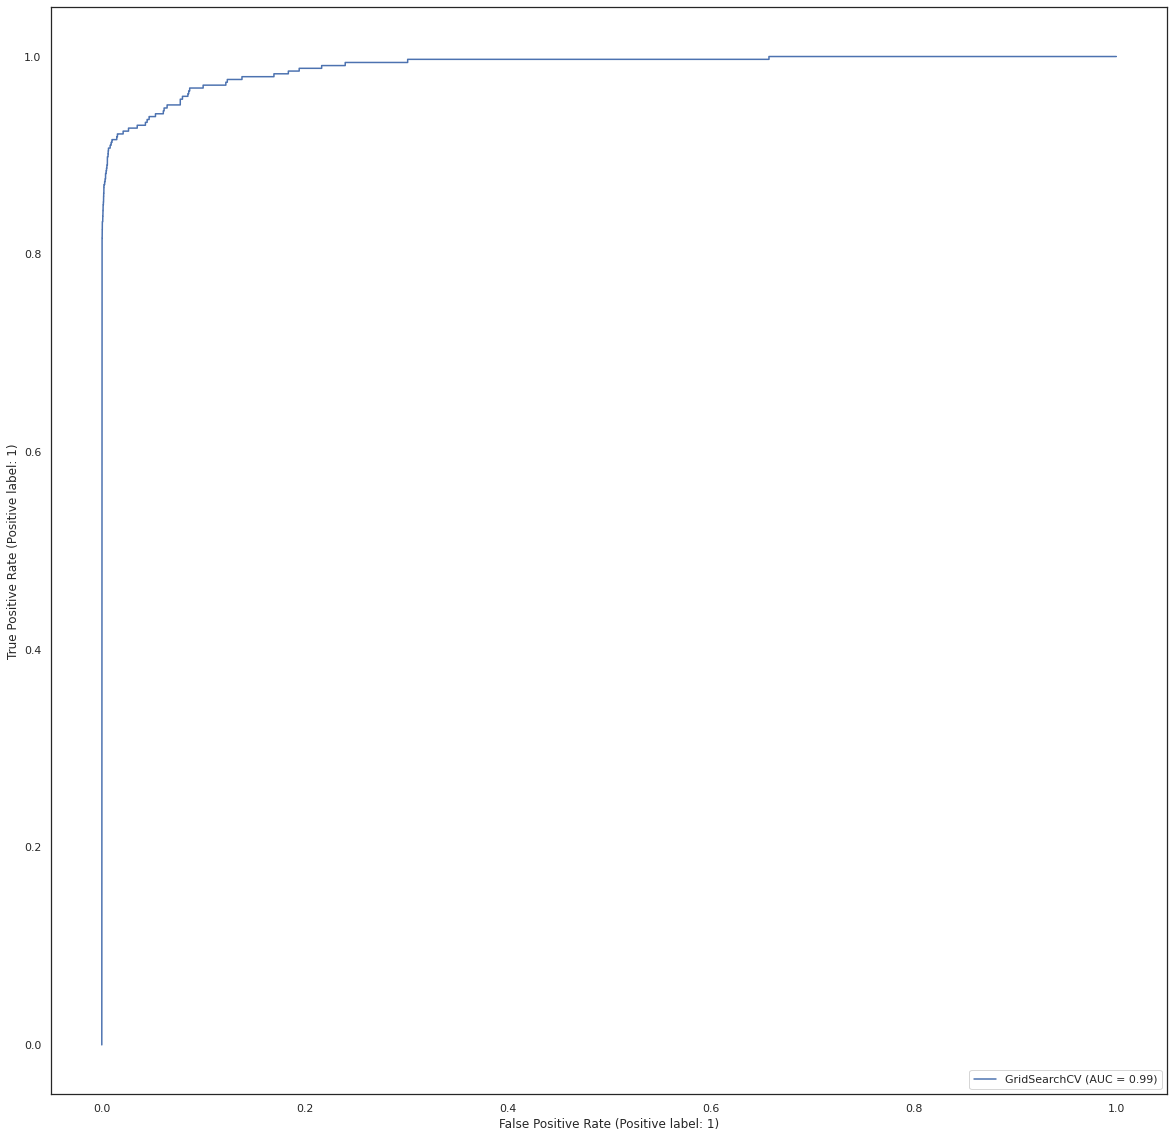

Confusion Matrix and ROC Curve of Logistic Regression with RandomOverSampler Test Model on Test Data
[[83189  2112]
 [   15   127]]
Accuracy:  0.9751062111583161
Sensitivity:  0.8943661971830986
Specificity:  0.9752406185156094


<Figure size 576x432 with 0 Axes>

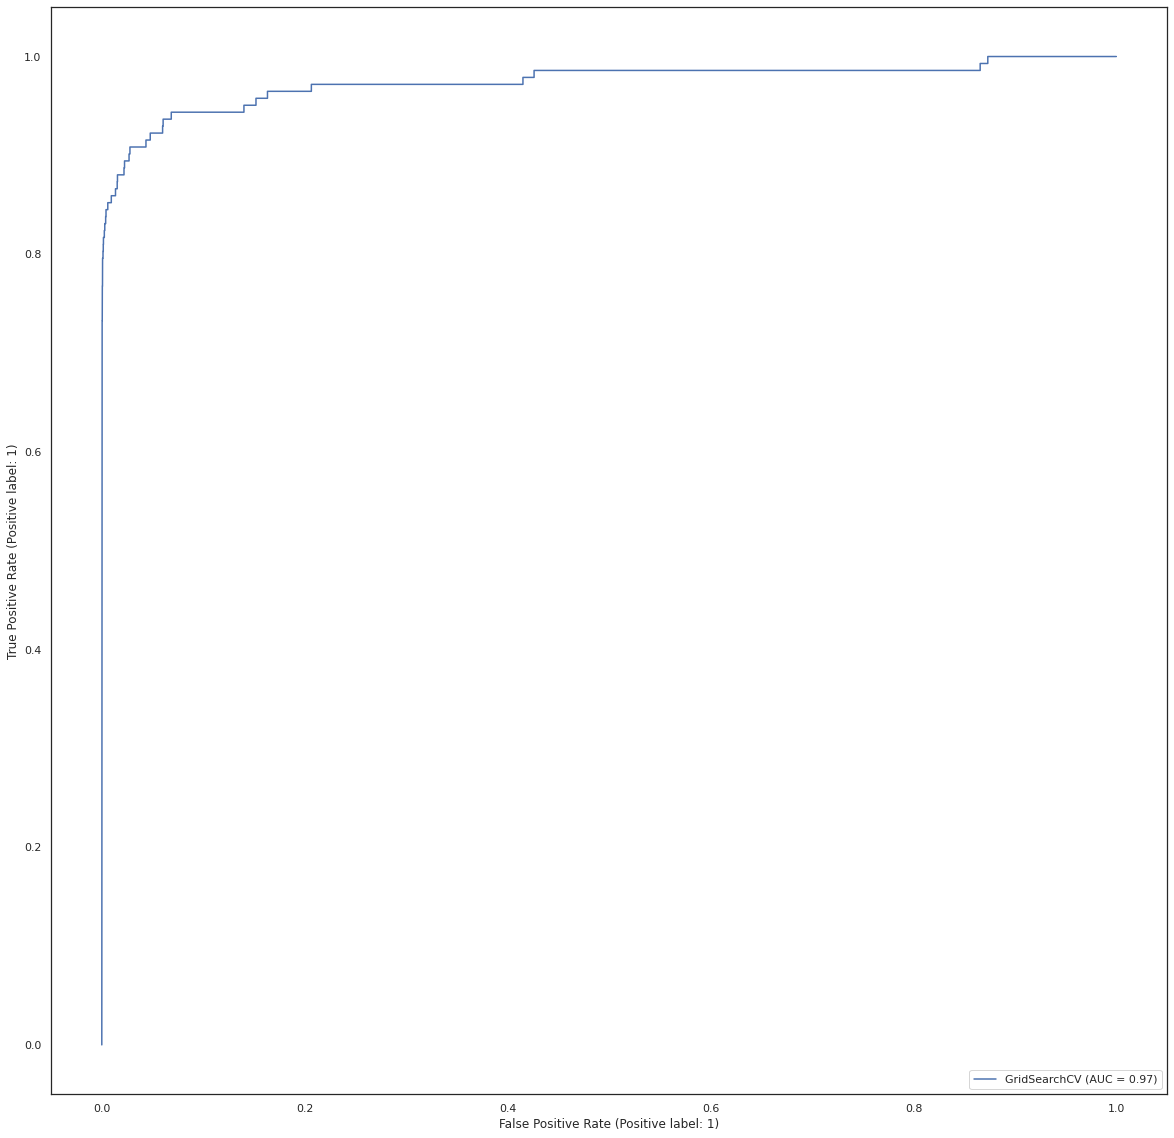

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809
8,Logistic Regression with RandomOverSampler on ...,0.950378,0.974952,0.924508,0.949060,0.989666
9,Logistic Regression with RandomOverSampler on ...,0.975106,0.056722,0.894366,0.106678,0.973807


In [82]:
#Plot confusion matrix and ROC_AUC Curve for Logistic Regression Model on Train Data
visualize_model_train("Logistic Regression with RandomOverSampler Train", lr_cv, X_train_ros, y_train_ros,y_pred_lr)

#Plot confusion matrix and ROC_AUC Curve for Logistic Regression Model on Test Data
visualize_model_test("Logistic Regression with RandomOverSampler Test", lr_cv, X_test, y_test,y_test_pred_lr)

#Generate a metric score for Logistic Regression

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df =  metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

### Similarly explore other algorithms by building models like:
- Decision Tree
- Random Forest
- XGBoost

## <font color="green">2. Decision Tree</font>

In [83]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8]}

#Instantiate Decision Tree
dt_obj = DecisionTreeClassifier(random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
dt_obj_cv = GridSearchCV(estimator = dt_obj,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
dt_obj_cv.fit(X_train_ros, y_train_ros)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649292983.8167703 seconds
Fitting 5 folds for each of 15 candidates, totalling 75 fits

End Time =  1649293325.3710463 seconds

Execution Time =  00:05:41


In [84]:
# results of grid search CV
cv_results = pd.DataFrame(dt_obj_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.627246,0.014989,0.025395,0.000579,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.968032,0.967523,0.966961,0.968158,0.968365,0.967808,0.000506,11,0.968687,0.967678,0.967818,0.967519,0.967467,0.967834,0.000444
1,2.578856,0.007956,0.025021,0.000207,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.968032,0.967523,0.966961,0.968158,0.968365,0.967808,0.000506,11,0.968687,0.967678,0.967818,0.967519,0.967467,0.967834,0.000444
2,2.624050,0.038009,0.024923,0.000194,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.968032,0.967523,0.966961,0.968158,0.968365,0.967808,0.000506,11,0.968687,0.967678,0.967818,0.967519,0.967467,0.967834,0.000444
3,2.592876,0.023284,0.024976,0.000452,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.968032,0.967523,0.966961,0.968158,0.968365,0.967808,0.000506,11,0.968687,0.967678,0.967818,0.967519,0.967467,0.967834,0.000444
4,2.583843,0.008580,0.025038,0.000489,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.968032,0.967523,0.966961,0.968158,0.968365,0.967808,0.000506,11,0.968687,0.967678,0.967818,0.967519,0.967467,0.967834,0.000444


In [85]:
# Best score with best C
best_score = dt_obj_cv.best_score_
best_C = dt_obj_cv.best_estimator_

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9982211352930216
Best hyperparameters is DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, random_state=42)


#### Model with optimal hyperparameters

In [86]:
#Based on best score and hyper parameter, let's see the result.

dt_obj = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=8, 
                                  min_samples_leaf=20)

dt_obj.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, random_state=42)

In [87]:
#Prediction on train data
y_pred_dt = dt_obj.predict(X_train_ros)

#check predict probability on train data
pred_prob = dt_obj.predict_proba(X_train_ros)

#Prediction on test data
y_test_pred_dt = dt_obj.predict(X_test)

#check predict probability on test data
pred_test_prob = dt_obj.predict_proba(X_test)

In [88]:
#check various scores on train and test data for Decision Tree Model with RandomOverSampler
model_perf_df = calculate_model_peformance("Decision Tree with RandomOverSampler", y_train_ros, y_pred_dt, pred_prob[:,1], "Train", y_test, y_test_pred_dt, pred_test_prob[:,1], "Test")


Decision Tree with RandomOverSampler Model Performance Report on Train Data:
Accuracy: 0.9838679690876019
Precision: 0.9794902181436133
Recall: 0.9884329745646036
F1_score: 0.9839412772449324
Roc_auc: 0.9984575196081682

Decision Tree with RandomOverSampler Model Performance Report on Test Data:
Accuracy: 0.9779502124223166
Precision: 0.05831643002028398
Recall: 0.8098591549295775
F1_score: 0.10879848628192999
Roc_auc: 0.9112672423799666


Confusion Matrix and ROC Curve of Decision Tree with RandomOverSampler Train Model on Train Data
[[194895   4119]
 [  2302 196712]]
Accuracy:  0.9838679690876019
Sensitivity:  0.9884329745646036
Specificity:  0.9793029636106002


<Figure size 576x432 with 0 Axes>

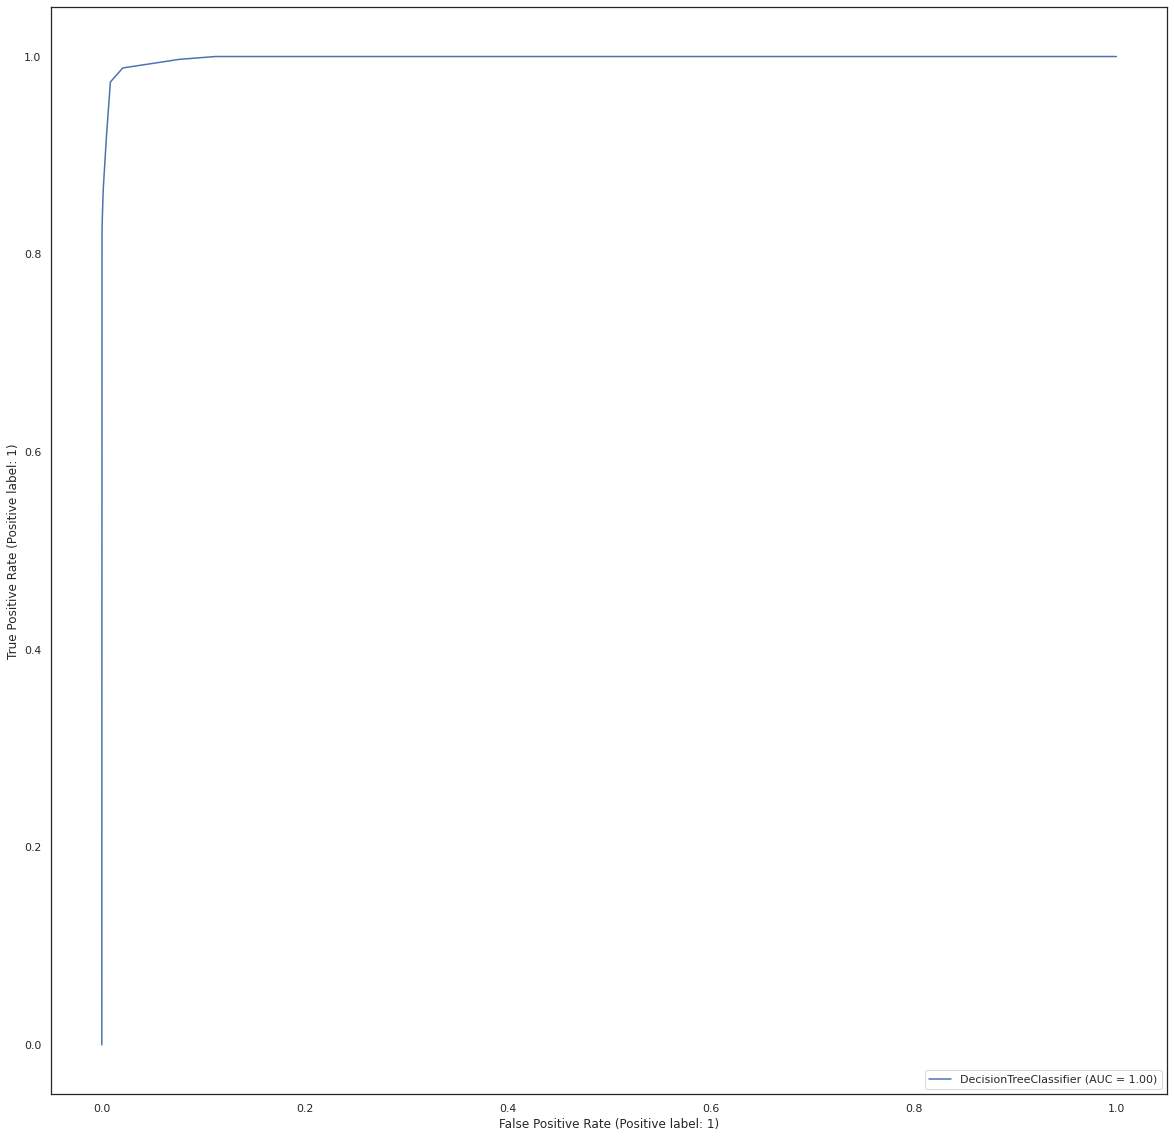

Confusion Matrix and ROC Curve of Decision Tree with RandomOverSampler Test Model on Test Data
[[83444  1857]
 [   27   115]]
Accuracy:  0.9779502124223166
Sensitivity:  0.8098591549295775
Specificity:  0.9782300324732418


<Figure size 576x432 with 0 Axes>

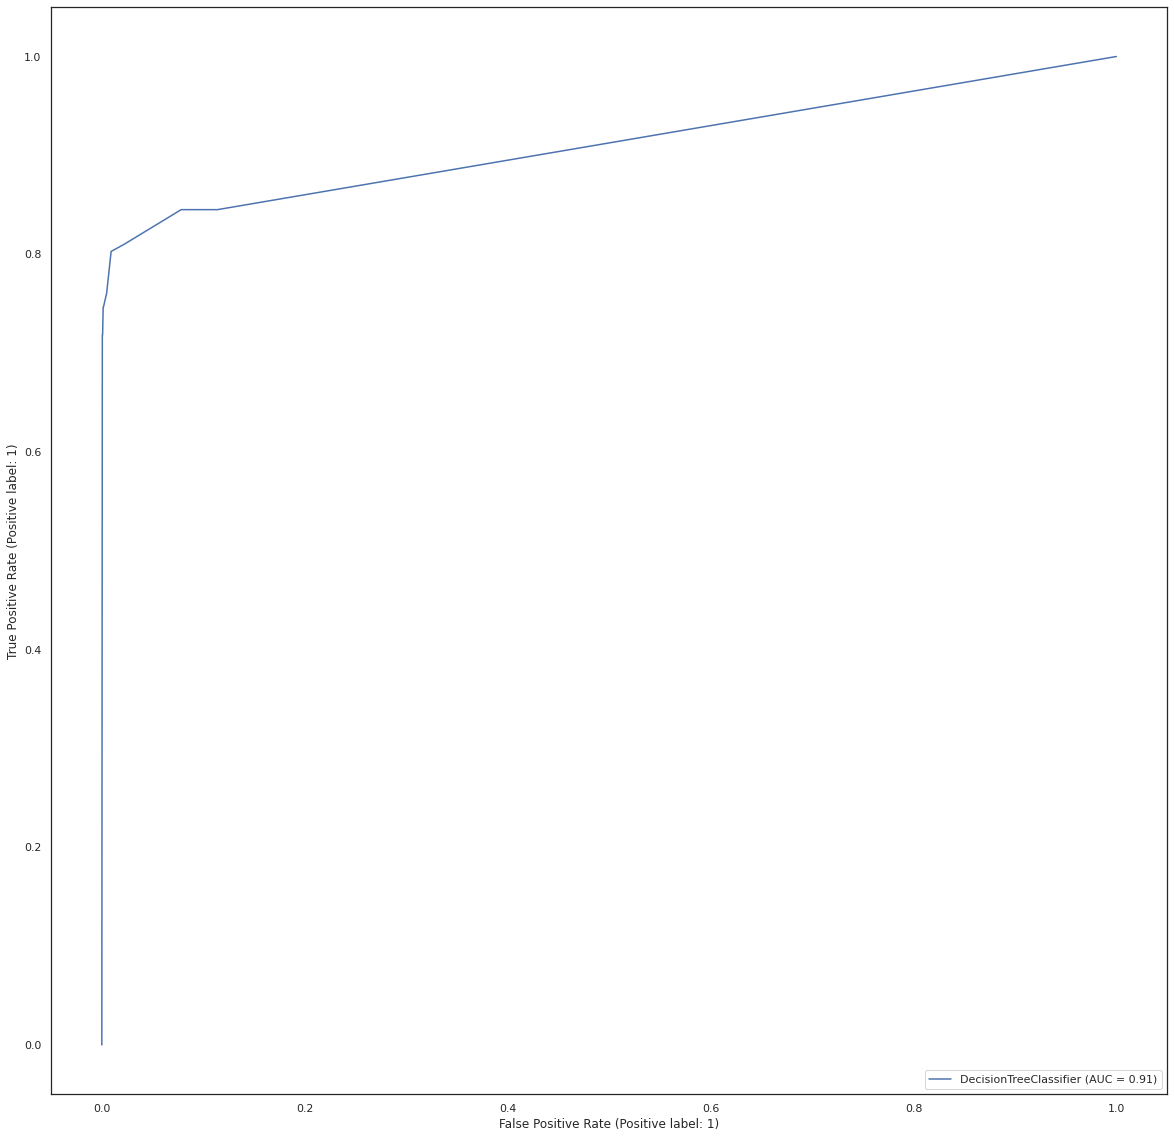

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809
8,Logistic Regression with RandomOverSampler on ...,0.950378,0.974952,0.924508,0.949060,0.989666
9,Logistic Regression with RandomOverSampler on ...,0.975106,0.056722,0.894366,0.106678,0.973807


In [89]:
#Plot confusion matrix and ROC_AUC Curve for Decision Tree Model with RandomOverSampler on Train Data
visualize_model_train("Decision Tree with RandomOverSampler Train", dt_obj, X_train_ros, y_train_ros,y_pred_dt)

#Plot confusion matrix and ROC_AUC Curve for Decision Tree Model with RandomOverSampler on Test Data
visualize_model_test("Decision Tree with RandomOverSampler Test", dt_obj, X_test, y_test,y_test_pred_dt)

#Generate a metric score for Decision Tree with RandomOverSampler

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

## <font color="green">3. Random Forest</font>

In [90]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8], 'n_estimators': [50,80]}

#Instantiate Random Forest
rf_obj = RandomForestClassifier(random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
rf_obj_cv = GridSearchCV(estimator = rf_obj,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
rf_obj_cv.fit(X_train_ros, y_train_ros)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649293335.046052 seconds
Fitting 5 folds for each of 30 candidates, totalling 150 fits

End Time =  1649298576.2498376 seconds

Execution Time =  01:27:21


In [91]:
# results of grid search CV
cv_results = pd.DataFrame(rf_obj_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.953519,0.076962,0.201035,0.005832,gini,3,5,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.985611,0.985511,0.985384,0.986678,0.986984,0.986034,0.000662,21,0.985945,0.986040,0.985484,0.986707,0.986173,0.986070,0.000394
1,25.435874,0.086395,0.300458,0.004726,gini,3,5,80,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.985461,0.985402,0.985484,0.986356,0.986846,0.985910,0.000586,26,0.985898,0.985904,0.985582,0.986376,0.985968,0.985945,0.000254
2,15.868896,0.038972,0.194516,0.001451,gini,3,10,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.985610,0.985509,0.985383,0.986678,0.986984,0.986033,0.000663,22,0.985943,0.986039,0.985483,0.986706,0.986172,0.986069,0.000394
3,25.278172,0.048703,0.307758,0.009575,gini,3,10,80,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.985460,0.985401,0.985482,0.986356,0.986846,0.985909,0.000586,27,0.985897,0.985903,0.985581,0.986375,0.985966,0.985945,0.000254
4,15.903402,0.056085,0.197866,0.002392,gini,3,20,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.985610,0.985509,0.985383,0.986678,0.986982,0.986032,0.000662,23,0.985943,0.986039,0.985483,0.986706,0.986170,0.986068,0.000394


In [92]:
# Best score with best C
best_score = rf_obj_cv.best_score_
best_C = rf_obj_cv.best_estimator_

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9996477746544439
Best hyperparameters is RandomForestClassifier(max_depth=8, min_samples_leaf=10, n_estimators=80,
                       random_state=42)


#### Model with optimal hyperparameters

In [93]:
#Based on best score and hyper parameter, let's see the result.

rf_obj = RandomForestClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=8, 
                                  min_samples_leaf=10,
                               n_estimators=80)

rf_obj.fit(X_train_ros, y_train_ros)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, n_estimators=80,
                       random_state=42)

In [94]:
#Prediction on train data
y_pred_rf = rf_obj.predict(X_train_ros)

#check predict probability on train data
pred_prob = rf_obj.predict_proba(X_train_ros)


#Prediction on test data
y_test_pred_rf = rf_obj.predict(X_test)

#check predict probability on test data
pred_test_prob = rf_obj.predict_proba(X_test)

In [95]:
#check various scores on train and test data for Random Forest with RandomOverSampler Model
model_perf_df = calculate_model_peformance("Random Forest with RandomOverSampler", y_train_ros, y_pred_rf, pred_prob[:,1], "Train", y_test, y_test_pred_rf, pred_test_prob[:,1], "Test")


Random Forest with RandomOverSampler Model Performance Report on Train Data:
Accuracy: 0.9867923864652738
Precision: 0.9993145142586188
Recall: 0.9742530676233833
F1_score: 0.9866246689242997
Roc_auc: 0.9997301179726662

Random Forest with RandomOverSampler Model Performance Report on Test Data:
Accuracy: 0.9986423697669792
Precision: 0.5631067961165048
Recall: 0.8169014084507042
F1_score: 0.6666666666666666
Roc_auc: 0.9788556546486337


Confusion Matrix and ROC Curve of Random Forest with RandomOverSampler Train Model on Train Data
[[198881    133]
 [  5124 193890]]
Accuracy:  0.9867923864652738
Sensitivity:  0.9742530676233833
Specificity:  0.9993317053071643


<Figure size 576x432 with 0 Axes>

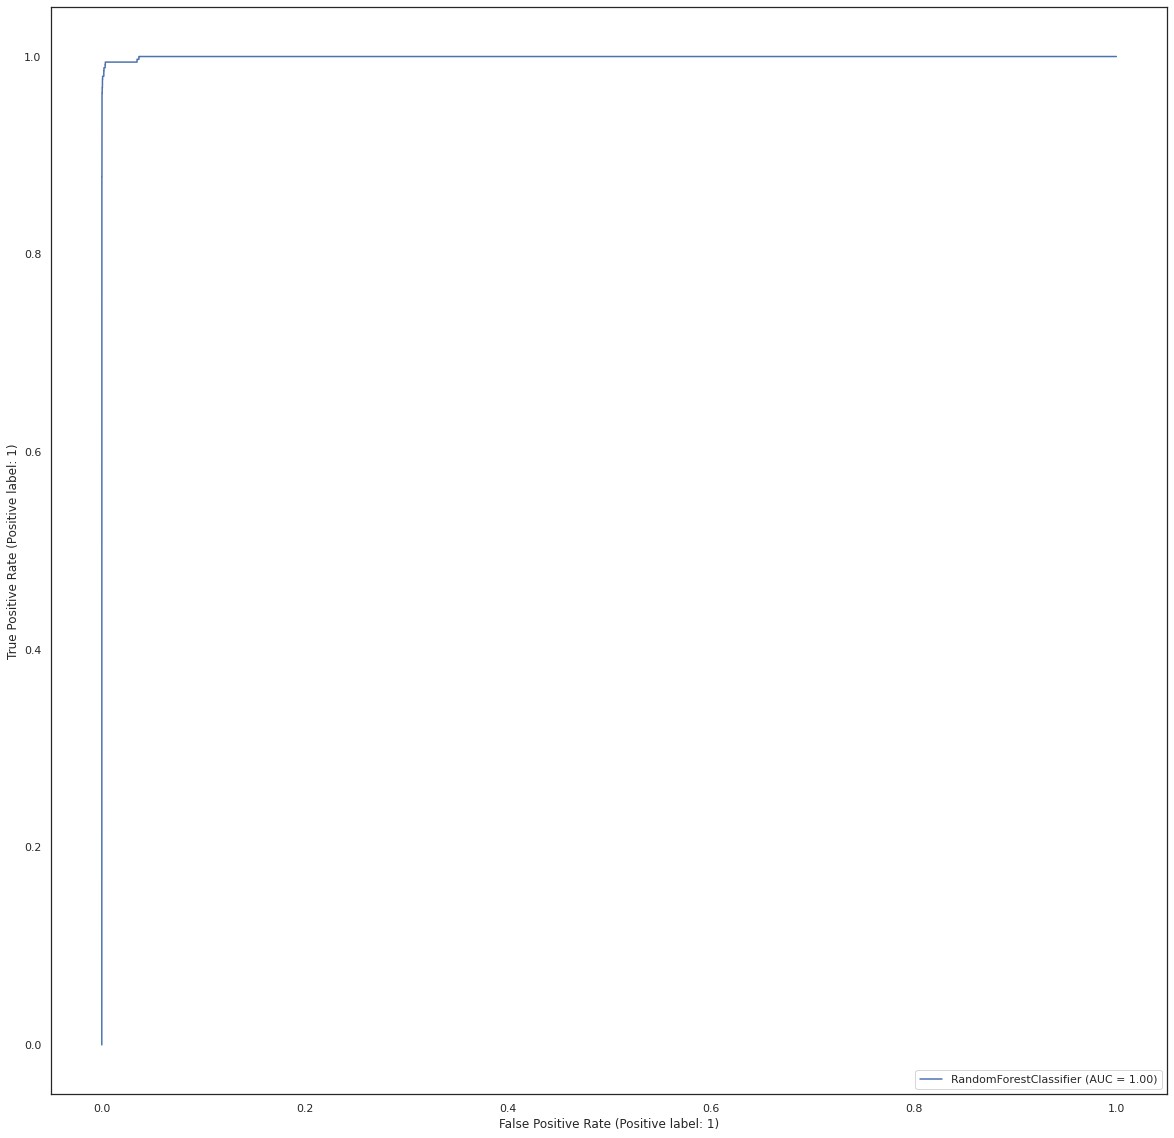

Confusion Matrix and ROC Curve of Random Forest with RandomOverSampler Test Model on Test Data
[[85211    90]
 [   26   116]]
Accuracy:  0.9986423697669792
Sensitivity:  0.8169014084507042
Specificity:  0.9989449127208356


<Figure size 576x432 with 0 Axes>

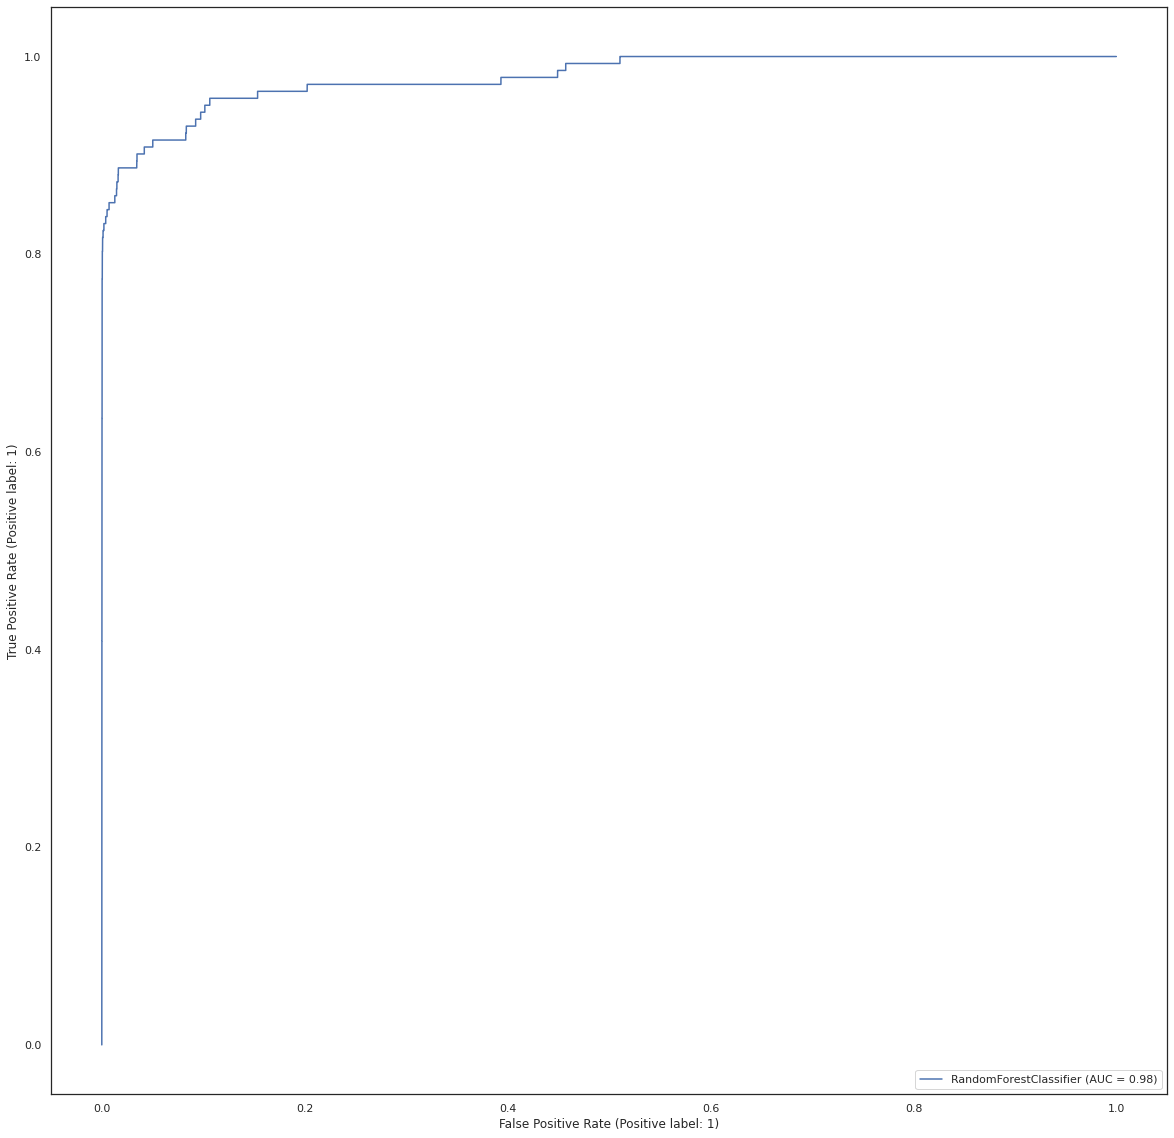

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809
8,Logistic Regression with RandomOverSampler on ...,0.950378,0.974952,0.924508,0.949060,0.989666
9,Logistic Regression with RandomOverSampler on ...,0.975106,0.056722,0.894366,0.106678,0.973807


In [96]:
#Plot confusion matrix and ROC_AUC Curve for Random Forest Model with RandomOverSampler on Train Data
visualize_model_train("Random Forest with RandomOverSampler Train", rf_obj, X_train_ros, y_train_ros,y_pred_rf)

#Plot confusion matrix and ROC_AUC Curve for Random Forest with RandomOverSampler Model on Test Data
visualize_model_test("Random Forest with RandomOverSampler Test", rf_obj, X_test, y_test,y_test_pred_rf)

#Generate a metric score for Random Forest with RandomOverSampler

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

## <font color="green">4. XGBoost</font>

In [97]:
#!pip install xgboost

# Finding the best number of trees in XGBoost

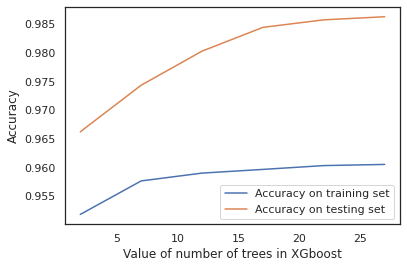

In [98]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree,eval_metric='mlogloss')
    xgb.fit(X_train_ros,y_train_ros)
    score1.append(xgb.score(X_train_ros,y_train_ros))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [99]:
xgb.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(eval_metric='mlogloss', n_estimators=27)>

### Here best number of trees in XGB is 27

In [100]:
xgb=XGBClassifier(n_estimators=27,eval_metric='mlogloss')
xgb.fit(X_train_ros,y_train_ros)
print('Accuracy of XGB n_estimators=27 on the testing dataset is :{:.3f}'.format(xgb.score(X_test,y_test)))

Accuracy of XGB n_estimators=27 on the testing dataset is :0.986


In [101]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {'learning_rate': [0.1, 0.3, 0.5], 
          'subsample': [0.3, 0.5, 0.7],
          'max_depth':[5,6], 
          'n_estimators': [27]}

#Instantiate XGBoost
xgb_obj = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
xgb_obj_cv = GridSearchCV(estimator = xgb_obj,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
xgb_obj_cv.fit(X_train_ros, y_train_ros)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649298738.5046668 seconds
Fitting 5 folds for each of 18 candidates, totalling 90 fits

End Time =  1649300945.8362093 seconds

Execution Time =  00:36:47


In [102]:
# results of grid search CV
cv_results = pd.DataFrame(xgb_obj_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,19.248405,0.050772,0.100498,0.001956,0.1,5,27,0.3,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999664,0.999747,0.999871,0.999809,0.999735,0.999765,0.000070,17,0.999776,0.999788,0.999771,0.999793,0.999743,0.999774,0.000017
1,22.275640,0.072812,0.104120,0.006323,0.1,5,27,0.5,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999695,0.999736,0.999874,0.999812,0.999796,0.999782,0.000062,16,0.999812,0.999784,0.999767,0.999806,0.999812,0.999796,0.000018
2,22.814822,0.051118,0.101692,0.003322,0.1,5,27,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999591,0.999759,0.999884,0.999775,0.999785,0.999759,0.000094,18,0.999711,0.999808,0.999787,0.999771,0.999799,0.999775,0.000034
3,22.964269,0.160819,0.103225,0.001944,0.1,6,27,0.3,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.999803,0.999877,0.999961,0.999916,0.999876,0.999887,0.000052,14,0.999915,0.999898,0.999877,0.999884,0.999892,0.999893,0.000013
4,26.839444,0.059655,0.106897,0.001804,0.1,6,27,0.5,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.999805,0.999866,0.999953,0.999911,0.999878,0.999883,0.000049,15,0.999918,0.999894,0.999874,0.999884,0.999895,0.999893,0.000015


In [103]:
# Best score with best C
best_score = xgb_obj_cv.best_score_
best_C = xgb_obj_cv.best_estimator_

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9999841832081049
Best hyperparameters is XGBClassifier(eval_metric='mlogloss', learning_rate=0.5, max_depth=6,
              n_estimators=27, random_state=42, subsample=0.7)


#### Model with optimal hyperparameters

In [104]:
#Based on best score and hyper parameter, let's see the result.

xgb_obj = XGBClassifier(random_state=42, 
                        eval_metric='mlogloss',
                        learning_rate=0.5,
                        subsample=0.7,
                        max_depth=6, 
                        n_estimators=27)

xgb_obj.fit(X_train_ros, y_train_ros)

XGBClassifier(eval_metric='mlogloss', learning_rate=0.5, max_depth=6,
              n_estimators=27, random_state=42, subsample=0.7)

In [105]:
#Prediction on train data
y_pred_xgb = xgb_obj.predict(X_train_ros)

#check predict probability on train data
pred_prob = xgb_obj.predict_proba(X_train_ros)


#Prediction on test data
y_test_pred_xgb = xgb_obj.predict(X_test)

#check predict probability on test data
pred_test_prob = xgb_obj.predict_proba(X_test)

In [106]:
#check various scores on train and test data for XGBoost with RandomOverSampler Model
model_perf_df = calculate_model_peformance("XGBoost with RandomOverSampler", y_train_ros, y_pred_xgb, pred_prob[:,1], "Train", y_test, y_test_pred_xgb, pred_test_prob[:,1], "Test")


XGBoost with RandomOverSampler Model Performance Report on Train Data:
Accuracy: 0.9999472398926709
Precision: 0.9998944909186827
Recall: 1.0
F1_score: 0.999947242676153
Roc_auc: 1.0

XGBoost with RandomOverSampler Model Performance Report on Test Data:
Accuracy: 0.9994148145547324
Precision: 0.8333333333333334
Recall: 0.8098591549295775
F1_score: 0.8214285714285714
Roc_auc: 0.9653753047823523


Confusion Matrix and ROC Curve of XGBoost with RandomOverSampler Model on Train Data
[[198993     21]
 [     0 199014]]
Accuracy:  0.9999472398926709
Sensitivity:  1.0
Specificity:  0.9998944797853417


<Figure size 576x432 with 0 Axes>

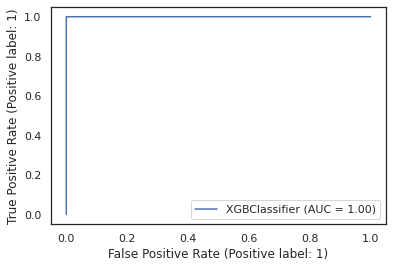

Confusion Matrix and ROC Curve of XGBoost with RandomOverSampler Model on Test Data
[[85278    23]
 [   27   115]]
Accuracy:  0.9994148145547324
Sensitivity:  0.8098591549295775
Specificity:  0.9997303665842135


<Figure size 576x432 with 0 Axes>

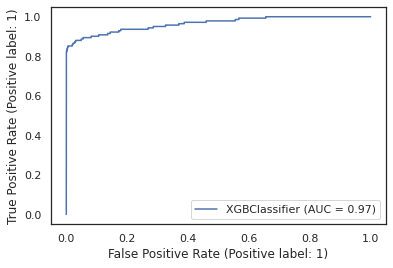

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809
8,Logistic Regression with RandomOverSampler on ...,0.950378,0.974952,0.924508,0.949060,0.989666
9,Logistic Regression with RandomOverSampler on ...,0.975106,0.056722,0.894366,0.106678,0.973807


In [107]:
#Plot confusion matrix and ROC_AUC Curve for XGBoost Model on Train Data
visualize_model_train("XGBoost with RandomOverSampler", xgb_obj, X_train_ros, y_train_ros,y_pred_xgb)

#Plot confusion matrix and ROC_AUC Curve for XGBoost Model on Test Data
visualize_model_test("XGBoost with RandomOverSampler", xgb_obj, X_test, y_test,y_test_pred_xgb)

#Generate a metric score for XGBoost with RandomOverSampler

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

**<font color="maroon">Observations:</font>**

Based on above Performance metrix of all Models, ROC-AUC of Random Forest Model is best for Train and Test Data as compared with other models. So we are going to consider Random Forest with RandomOversampling as best model though it takes memory and time but the result is good.

# <font color="Blue">SMOTE (Synthetic Minority Oversampling Technique)</font>

### Print the class distribution after applying SMOTE 

Class distribution before smote:  Counter({0: 199014, 1: 350})
Class distribution after smote:  Counter({0: 199014, 1: 199014})


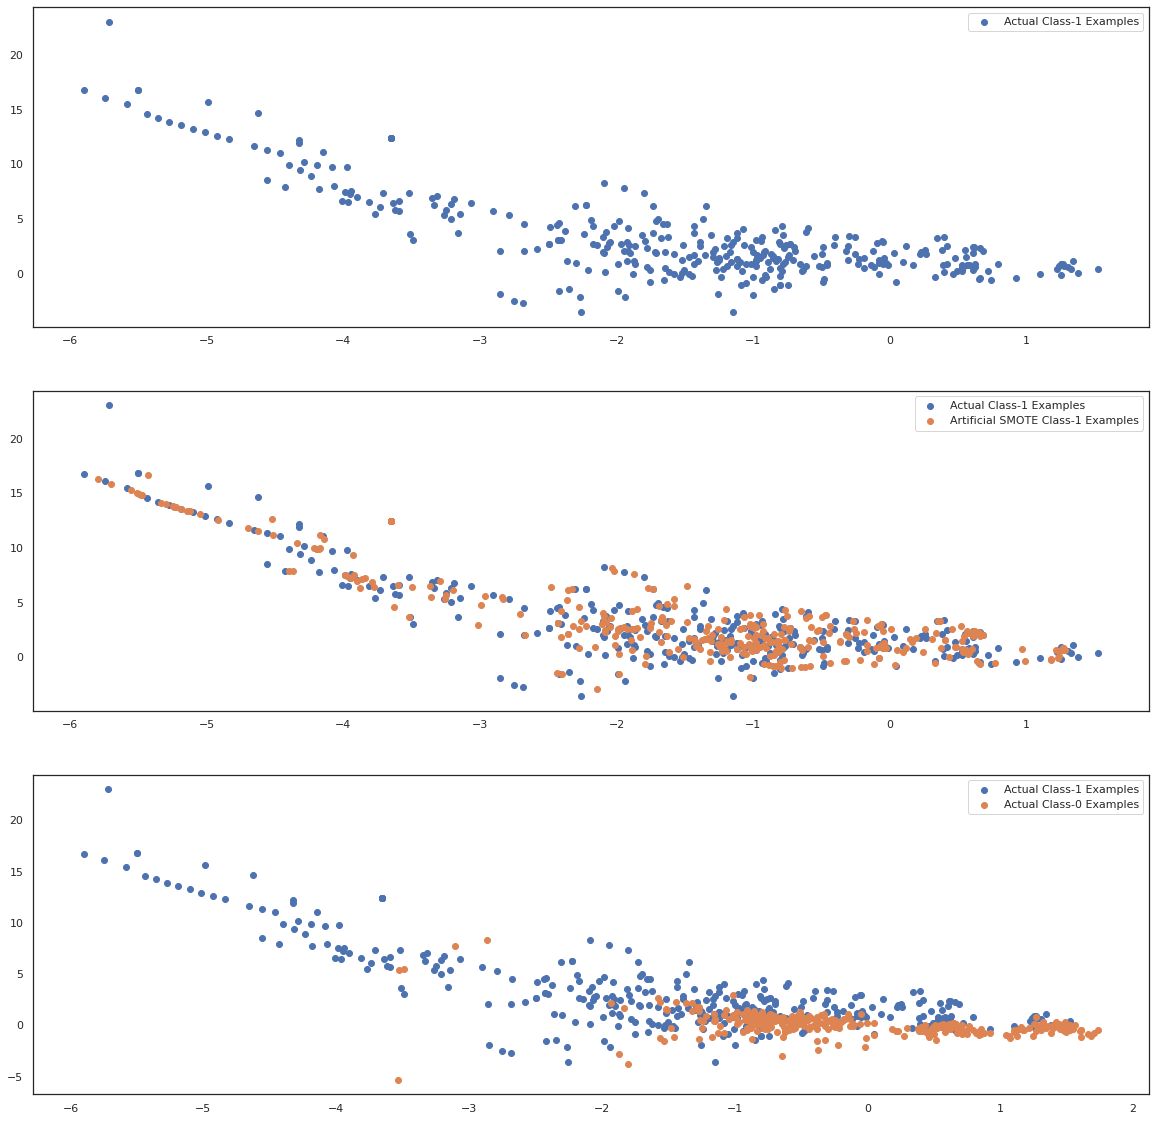

In [108]:
#Initialize SMOTE
sm = over_sampling.SMOTE(random_state=0)

#Run SMOTE on Train data to handle imbalance
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


print('Class distribution before smote: ', Counter(y_train))
print('Class distribution after smote: ', Counter(y_train_smote))

#scatter plot of examples by class labels before and after SMOTE
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples',cmap='viridis')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples',cmap='viridis')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
             label='Artificial SMOTE Class-1 Examples',cmap='viridis')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples',cmap='viridis')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples',cmap='viridis')
plt.legend()

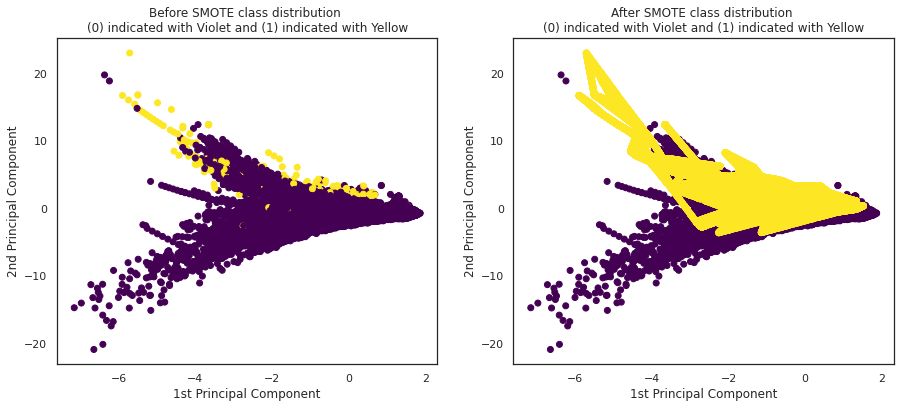

In [109]:
# scatter plot of examples by class labels before and after SMOTE

sns.set(style="white")
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.scatter(X_train.V1, X_train.V2, c = y_train,cmap='viridis')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Before SMOTE class distribution \n(0) indicated with Violet and (1) indicated with Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_train_smote.V1, X_train_smote.V2, c = y_train_smote, cmap='viridis')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('After SMOTE class distribution \n(0) indicated with Violet and (1) indicated with Yellow')
plt.show()

## <font color="green">1. Logistic Regression</font>

In [110]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Instantiate logistic regression
lr = LogisticRegression(random_state=42)

# Specifing score as recall as we are more focused on achieving the higher sensitivity than the accuracy
lr_cv = GridSearchCV(estimator = lr,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
lr_cv.fit(X_train_smote, y_train_smote)
      
end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649300999.3132772 seconds
Fitting 5 folds for each of 6 candidates, totalling 30 fits

End Time =  1649301058.97795 seconds

Execution Time =  00:00:59


In [111]:
# results of grid search CV
cv_results = pd.DataFrame(lr_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.712406,0.032228,0.042154,0.006164,0.01,{'C': 0.01},0.990352,0.990915,0.990742,0.990908,0.990783,0.99074,0.000205,6,0.990949,0.990717,0.990721,0.990681,0.990709,0.990755,0.000098
1,1.700616,0.033948,0.041124,0.002481,0.1,{'C': 0.1},0.990372,0.990939,0.990766,0.990930,0.990794,0.99076,0.000206,5,0.990965,0.990735,0.990744,0.990705,0.990728,0.990775,0.000096
2,1.726283,0.042815,0.041027,0.002332,1,{'C': 1},0.990371,0.990940,0.990766,0.990930,0.990793,0.99076,0.000207,1,0.990964,0.990735,0.990745,0.990705,0.990728,0.990776,0.000095
3,1.716394,0.070669,0.039189,0.000775,10,{'C': 10},0.990371,0.990940,0.990766,0.990930,0.990793,0.99076,0.000207,2,0.990964,0.990734,0.990745,0.990705,0.990728,0.990776,0.000095
4,1.738623,0.055614,0.039009,0.000634,100,{'C': 100},0.990371,0.990940,0.990766,0.990930,0.990793,0.99076,0.000207,4,0.990964,0.990734,0.990745,0.990705,0.990728,0.990776,0.000095


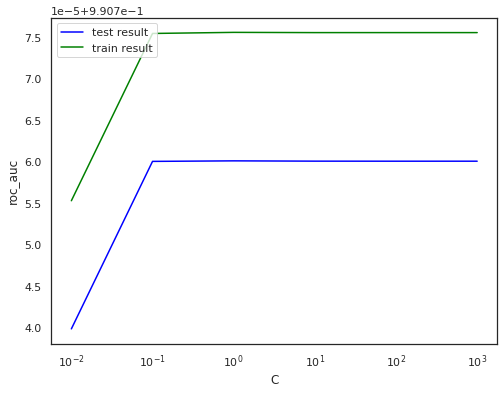

In [112]:
#print the evaluation result by choosing a evaluation metric

# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'],color='blue')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'],color='green')
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [113]:
# Best score with best C
best_score = lr_cv.best_score_
best_C = lr_cv.best_params_['C']

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9907600877989964
Best hyperparameters is 1


We got the optimal value of c = 1 , lets initiate logistic regression model with `c=1`

In [114]:
#Prediction on train data
y_pred_lr = lr_cv.predict(X_train_smote)

#check predict probability on train data
pred_prob = lr_cv.predict_proba(X_train_smote)


#Prediction on test data
y_test_pred_lr = lr_cv.predict(X_test)

#check predict probability on test data
pred_test_prob = lr_cv.predict_proba(X_test)

In [115]:
#check various scores on train and test data for Logistics Regression Model with SMOTE
model_perf_df = calculate_model_peformance("Logistic Regression with SMOTE", y_train_smote, y_pred_lr, pred_prob[:,1], "Train", y_test, y_test_pred_lr, pred_test_prob[:,1], "Test")


Logistic Regression with SMOTE Model Performance Report on Train Data:
Accuracy: 0.950307516054147
Precision: 0.9739635394354801
Recall: 0.9253519852874672
F1_score: 0.9490356742550148
Roc_auc: 0.990770880077905

Logistic Regression with SMOTE Model Performance Report on Test Data:
Accuracy: 0.9739124328499702
Precision: 0.05463081519419548
Recall: 0.9014084507042254
F1_score: 0.10301810865191148
Roc_auc: 0.9744114916341816


Confusion Matrix and ROC Curve of Logistic Regression with SMOTE Train Model on Train Data
[[194091   4923]
 [ 14856 184158]]
Accuracy:  0.950307516054147
Sensitivity:  0.9253519852874672
Specificity:  0.9752630468208267


<Figure size 576x432 with 0 Axes>

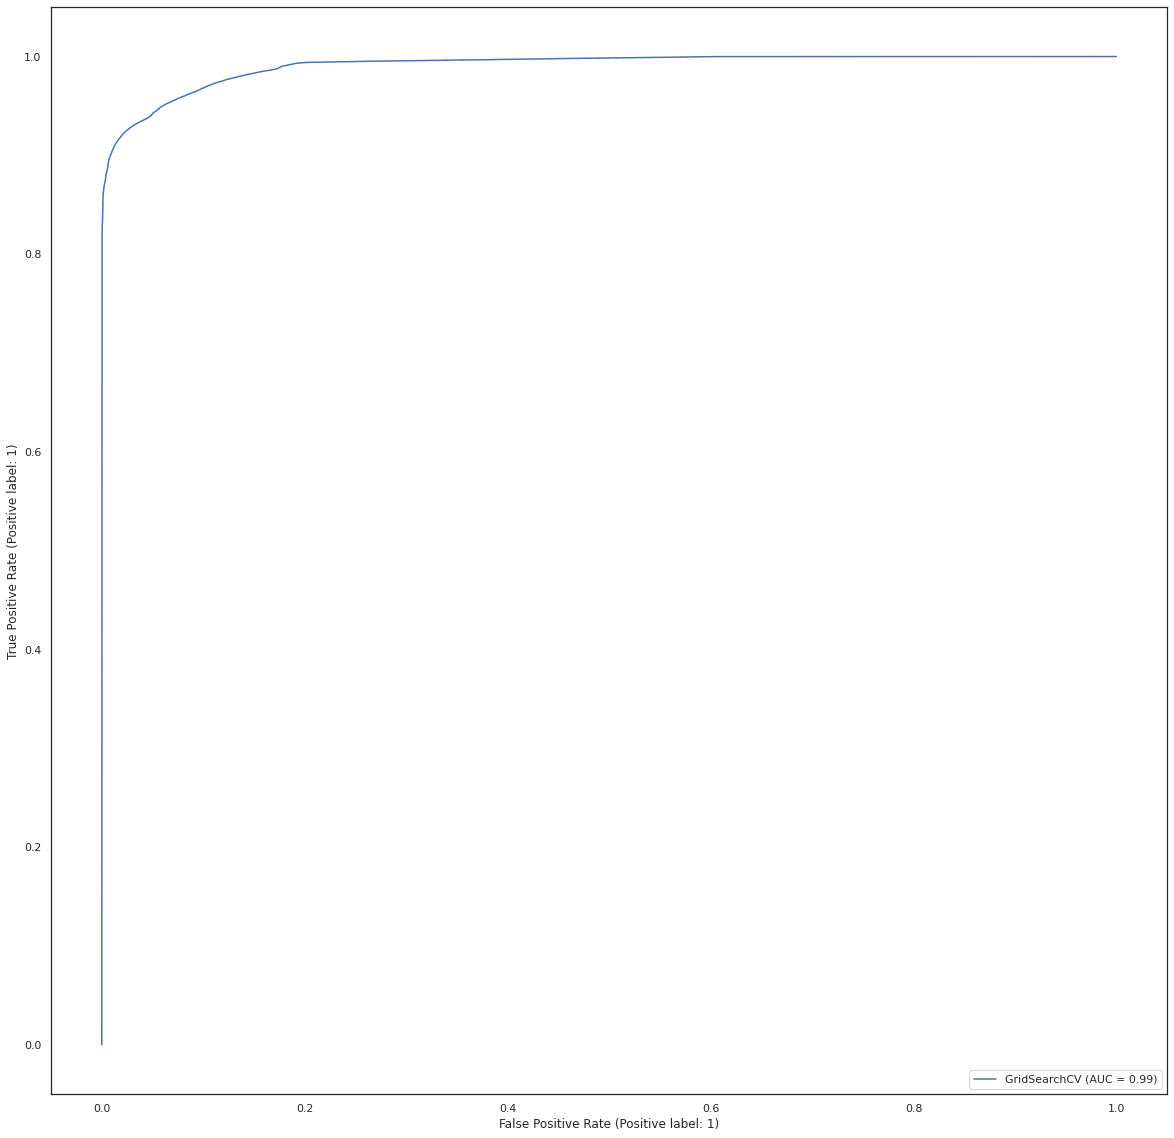

Confusion Matrix and ROC Curve of Logistic Regression with SMOTE Test Model on Test Data
[[83086  2215]
 [   14   128]]
Accuracy:  0.9739124328499702
Sensitivity:  0.9014084507042254
Specificity:  0.9740331297405658


<Figure size 576x432 with 0 Axes>

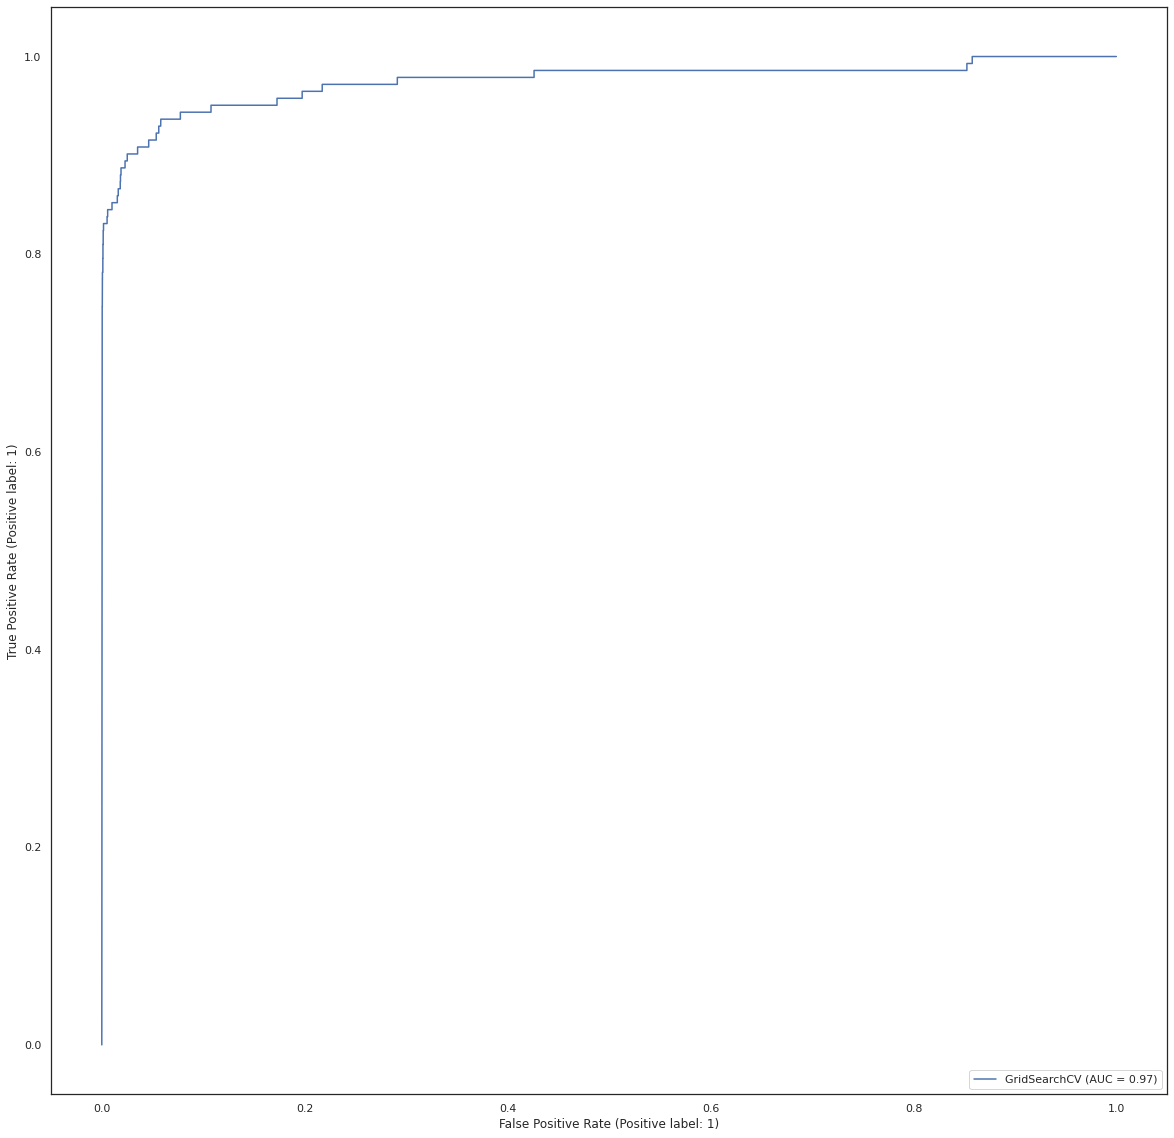

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809
8,Logistic Regression with RandomOverSampler on ...,0.950378,0.974952,0.924508,0.949060,0.989666
9,Logistic Regression with RandomOverSampler on ...,0.975106,0.056722,0.894366,0.106678,0.973807


In [116]:
#Plot confusion matrix and ROC_AUC Curve for Logistic Regression Model on Train Data
visualize_model_train("Logistic Regression with SMOTE Train", lr_cv, X_train_smote, y_train_smote,y_pred_lr)

#Plot confusion matrix and ROC_AUC Curve for Logistic Regression Model on Test Data
visualize_model_test("Logistic Regression with SMOTE Test", lr_cv, X_test, y_test,y_test_pred_lr)

#Generate a metric score for Logistic Regression

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

### Similarly explore other algorithms by building models like:
- Decision Tree
- Random Forest
- XGBoost

## <font color="green">2. Decision Tree</font>

In [117]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8]}

#Instantiate Decision Tree
dt_obj = DecisionTreeClassifier(random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
dt_obj_cv = GridSearchCV(estimator = dt_obj,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
dt_obj_cv.fit(X_train_smote, y_train_smote)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649301061.8254838 seconds
Fitting 5 folds for each of 15 candidates, totalling 75 fits

End Time =  1649301630.4803543 seconds

Execution Time =  00:09:28


In [118]:
# results of grid search CV
cv_results = pd.DataFrame(dt_obj_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.268901,0.034929,0.025826,0.000189,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.969475,0.97087,0.968077,0.970722,0.970589,0.969946,0.001057,11,0.970467,0.970291,0.969129,0.970351,0.970168,0.970081,0.000486
1,4.231759,0.019559,0.026501,0.000463,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.969475,0.97087,0.968077,0.970722,0.970589,0.969946,0.001057,11,0.970467,0.970291,0.969129,0.970351,0.970168,0.970081,0.000486
2,4.274437,0.033039,0.026768,0.000970,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.969475,0.97087,0.968077,0.970722,0.970589,0.969946,0.001057,11,0.970467,0.970291,0.969129,0.970351,0.970168,0.970081,0.000486
3,4.233539,0.025623,0.026418,0.000763,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.969475,0.97087,0.968077,0.970722,0.970589,0.969946,0.001057,11,0.970467,0.970291,0.969129,0.970351,0.970168,0.970081,0.000486
4,4.252525,0.031942,0.026693,0.001257,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.969475,0.97087,0.968077,0.970722,0.970589,0.969946,0.001057,11,0.970467,0.970291,0.969129,0.970351,0.970168,0.970081,0.000486


In [119]:
# Best score with best C
best_score = dt_obj_cv.best_score_
best_C = dt_obj_cv.best_estimator_

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9967691572298699
Best hyperparameters is DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, random_state=42)


#### Model with optimal hyperparameters

In [120]:
#Based on best score and hyper parameter, let's see the result.

dt_obj = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=8, 
                                  min_samples_leaf=20)

dt_obj.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=20, random_state=42)

In [121]:
#Prediction on train data
y_pred_dt = dt_obj.predict(X_train_smote)

#check predict probability on train data
pred_prob = dt_obj.predict_proba(X_train_smote)

#Prediction on test data
y_test_pred_dt = dt_obj.predict(X_test)

#check predict probability on test data
pred_test_prob = dt_obj.predict_proba(X_test)

In [122]:
#check various scores on train and test data for Decision Tree Model with SMOTE
model_perf_df = calculate_model_peformance("Decision Tree with SMOTE", y_train_smote, y_pred_dt, pred_prob[:,1], "Train", y_test, y_test_pred_dt, pred_test_prob[:,1], "Test")


Decision Tree with SMOTE Model Performance Report on Train Data:
Accuracy: 0.9819158451164239
Precision: 0.978922190374417
Recall: 0.9850412533791593
F1_score: 0.9819721893846801
Roc_auc: 0.9977644933254551

Decision Tree with SMOTE Model Performance Report on Test Data:
Accuracy: 0.9774469529393864
Precision: 0.058823529411764705
Recall: 0.8380281690140845
F1_score: 0.10993071593533486
Roc_auc: 0.9318523419387617


Confusion Matrix and ROC Curve of Decision Tree with SMOTE Train Model on Train Data
[[194793   4221]
 [  2977 196037]]
Accuracy:  0.9819158451164239
Sensitivity:  0.9850412533791593
Specificity:  0.9787904368536887


<Figure size 576x432 with 0 Axes>

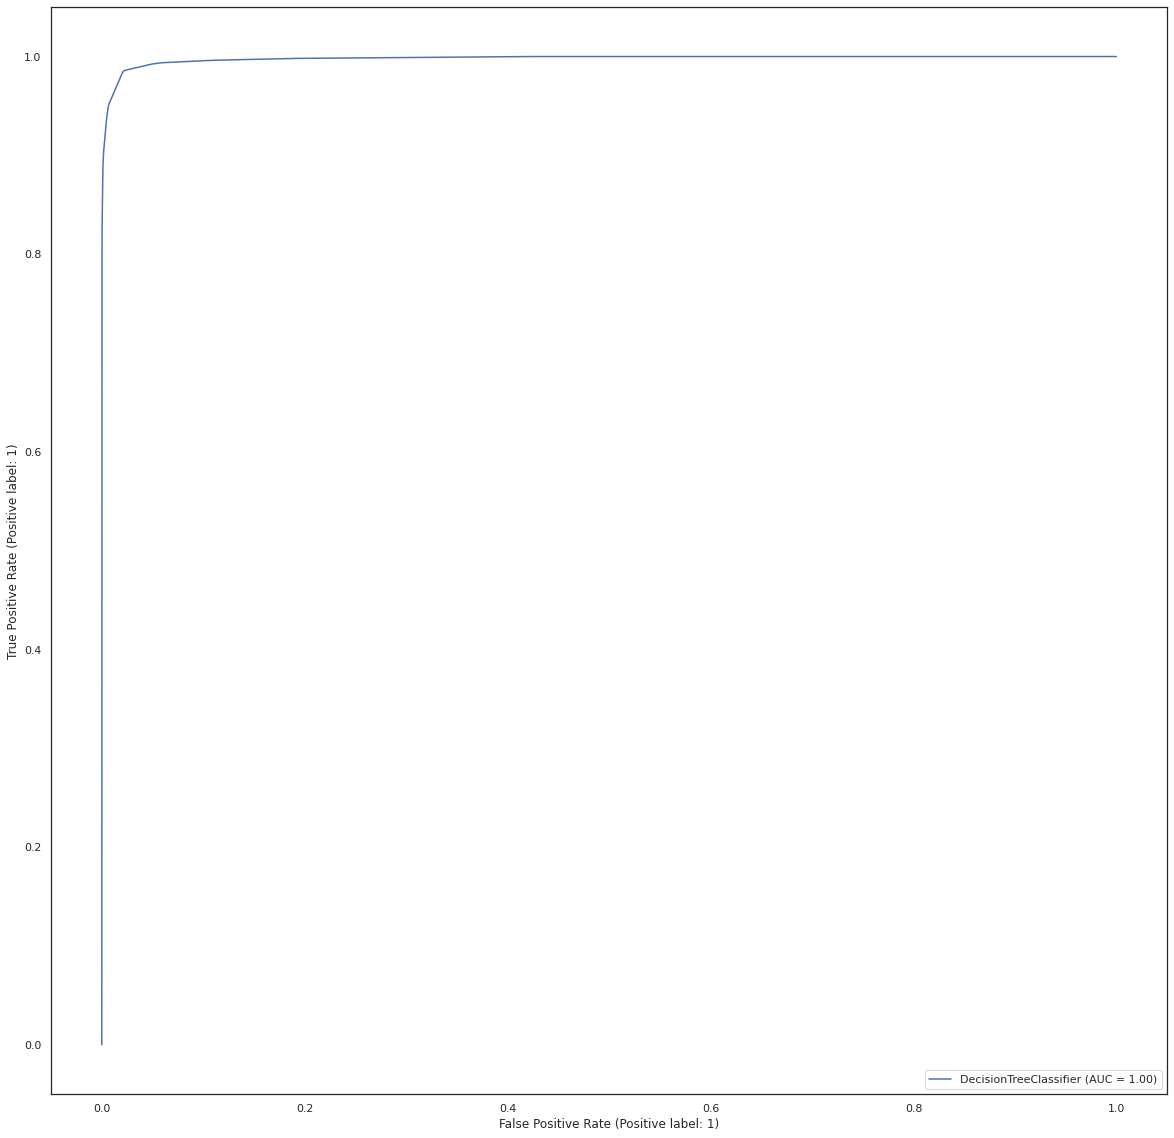

Confusion Matrix and ROC Curve of Decision Tree with SMOTE Test Model on Test Data
[[83397  1904]
 [   23   119]]
Accuracy:  0.9774469529393864
Sensitivity:  0.8380281690140845
Specificity:  0.9776790424496782


<Figure size 576x432 with 0 Axes>

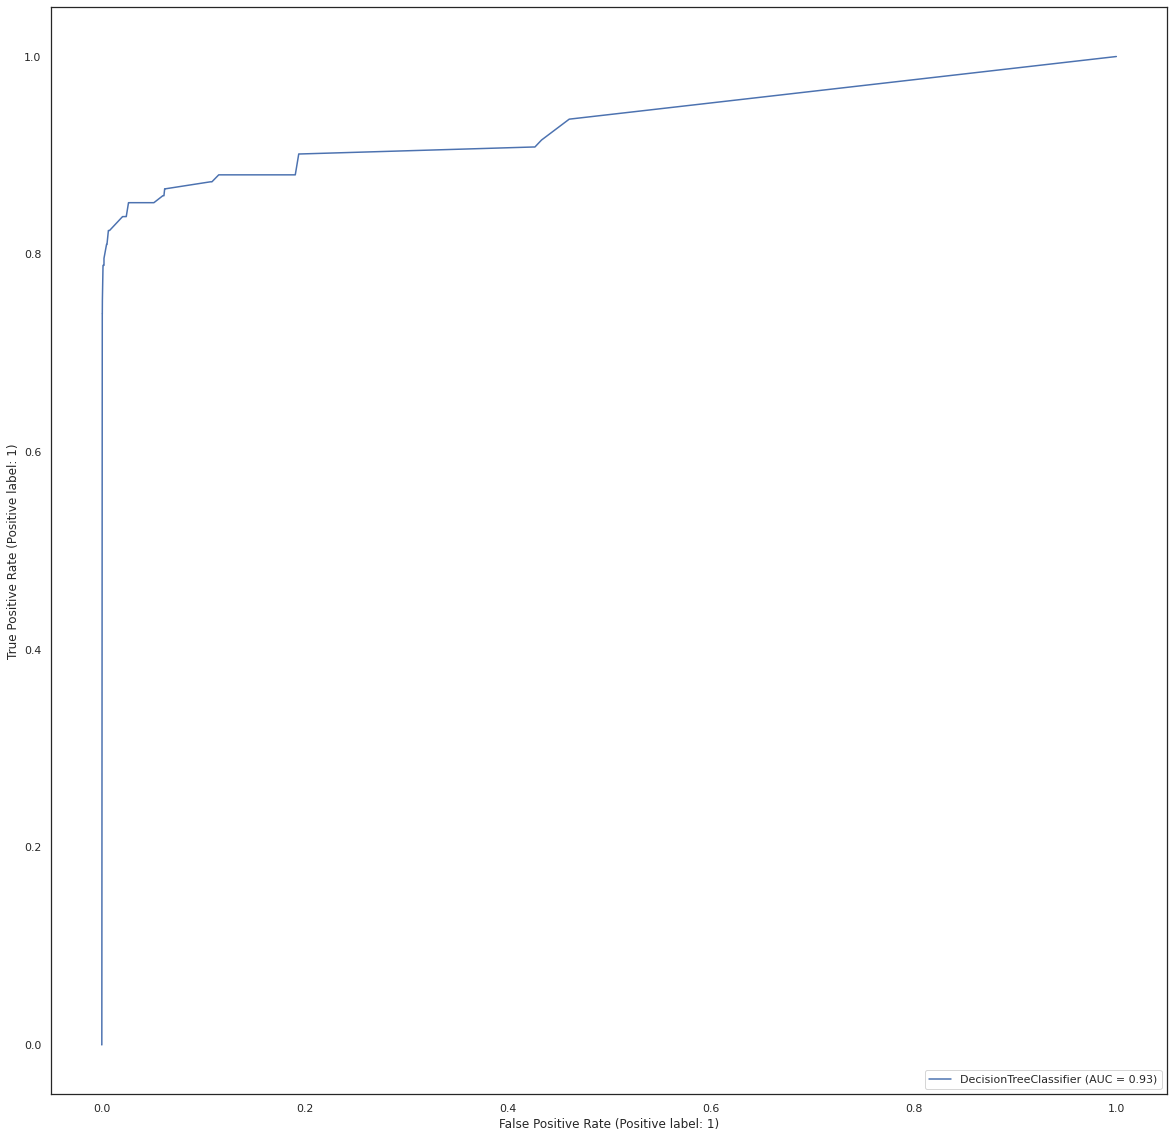

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809
8,Logistic Regression with RandomOverSampler on ...,0.950378,0.974952,0.924508,0.949060,0.989666
9,Logistic Regression with RandomOverSampler on ...,0.975106,0.056722,0.894366,0.106678,0.973807


In [123]:
#Plot confusion matrix and ROC_AUC Curve for Decision Tree Model with SMOTE on Train Data
visualize_model_train("Decision Tree with SMOTE Train", dt_obj, X_train_smote, y_train_smote,y_pred_dt)

#Plot confusion matrix and ROC_AUC Curve for Decision Tree Model with SMOTE on Test Data
visualize_model_test("Decision Tree with SMOTE Test", dt_obj, X_test, y_test,y_test_pred_dt)

#Generate a metric score for Decision Tree with SMOTE

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

## <font color="green">3. Random Forest</font>

In [124]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8], 'n_estimators': [50,80]}

#Instantiate Random Forest
rf_obj = RandomForestClassifier(random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
rf_obj_cv = GridSearchCV(estimator = rf_obj,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
rf_obj_cv.fit(X_train_smote, y_train_smote)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649301645.5529544 seconds
Fitting 5 folds for each of 30 candidates, totalling 150 fits

End Time =  1649309985.0347986 seconds

Execution Time =  02:18:59


In [125]:
# results of grid search CV
cv_results = pd.DataFrame(rf_obj_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,24.608913,0.088547,0.202168,0.004307,gini,3,5,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.982581,0.983618,0.983524,0.983852,0.984260,0.983567,0.000555,23,0.983549,0.983692,0.983937,0.983461,0.983796,0.983687,0.000170
1,39.296684,0.102044,0.305442,0.005013,gini,3,5,80,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.982295,0.983367,0.982655,0.983213,0.983820,0.983070,0.000537,28,0.983223,0.983329,0.983132,0.982896,0.983298,0.983176,0.000155
2,24.622197,0.104886,0.203382,0.002609,gini,3,10,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.982581,0.983617,0.983524,0.983852,0.984260,0.983567,0.000555,24,0.983548,0.983692,0.983937,0.983461,0.983796,0.983687,0.000170
3,39.255949,0.094024,0.314050,0.011837,gini,3,10,80,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.982295,0.983367,0.982655,0.983213,0.983820,0.983070,0.000537,29,0.983223,0.983329,0.983132,0.982896,0.983298,0.983175,0.000155
4,24.653837,0.076331,0.205543,0.003569,gini,3,20,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.982581,0.983617,0.983524,0.983729,0.984259,0.983542,0.000544,25,0.983548,0.983691,0.983937,0.983312,0.983796,0.983657,0.000215


In [126]:
# Best score with best C
best_score = rf_obj_cv.best_score_
best_C = rf_obj_cv.best_estimator_

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9987482549339328
Best hyperparameters is RandomForestClassifier(max_depth=8, min_samples_leaf=20, n_estimators=80,
                       random_state=42)


#### Model with optimal hyperparameters

In [127]:
#Based on best score and hyper parameter, let's see the result.

rf_obj = RandomForestClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=8, 
                                  min_samples_leaf=20,
                               n_estimators=80)

rf_obj.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=8, min_samples_leaf=20, n_estimators=80,
                       random_state=42)

In [128]:
#Prediction on train data
y_pred_rf = rf_obj.predict(X_train_smote)

#check predict probability on train data
pred_prob = rf_obj.predict_proba(X_train_smote)


#Prediction on test data
y_test_pred_rf = rf_obj.predict(X_test)

#check predict probability on test data
pred_test_prob = rf_obj.predict_proba(X_test)

In [129]:
#check various scores on train and test data for Random Forest with SMOTE ModeL
model_perf_df = calculate_model_peformance("Random Forest with SMOTE", y_train_smote, y_pred_rf, pred_prob[:,1], "Train", y_test, y_test_pred_rf, pred_test_prob[:,1], "Test")


Random Forest with SMOTE Model Performance Report on Train Data:
Accuracy: 0.9728938667631423
Precision: 0.9981105012728976
Recall: 0.9475815771754751
F1_score: 0.9721899302235064
Roc_auc: 0.9988736730667012

Random Forest with SMOTE Model Performance Report on Test Data:
Accuracy: 0.9973900729141065
Precision: 0.37142857142857144
Recall: 0.823943661971831
F1_score: 0.5120350109409191
Roc_auc: 0.9759149084493007


Confusion Matrix and ROC Curve of Random Forest with SMOTE Train Model on Train Data
[[198657    357]
 [ 10432 188582]]
Accuracy:  0.9728938667631423
Sensitivity:  0.9475815771754751
Specificity:  0.9982061563508094


<Figure size 576x432 with 0 Axes>

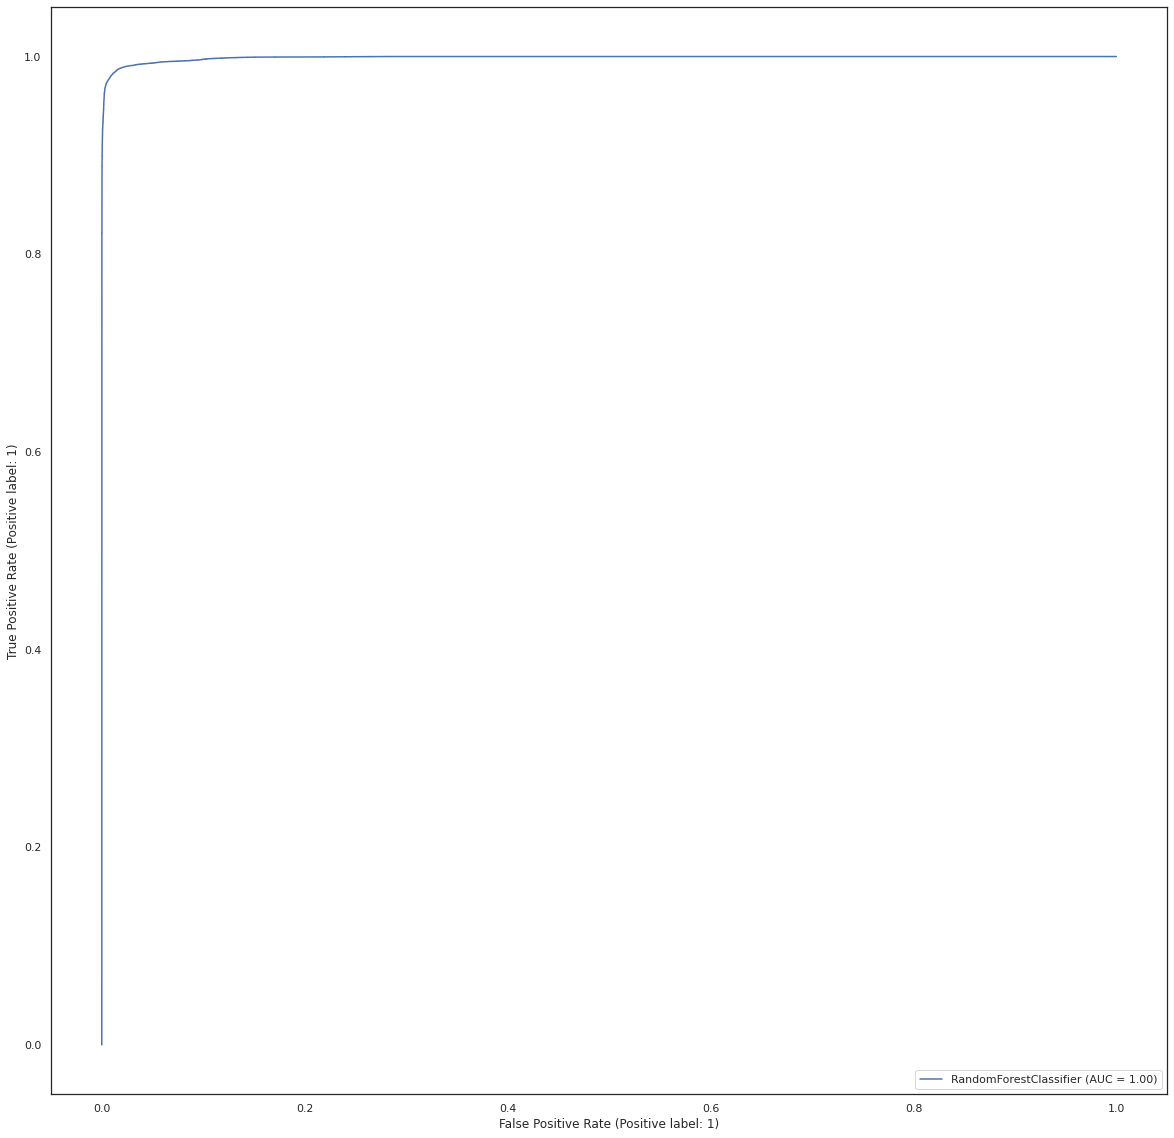

Confusion Matrix and ROC Curve of Random Forest with SMOTE Test Model on Test Data
[[85103   198]
 [   25   117]]
Accuracy:  0.9973900729141065
Sensitivity:  0.823943661971831
Specificity:  0.9976788079858384


<Figure size 576x432 with 0 Axes>

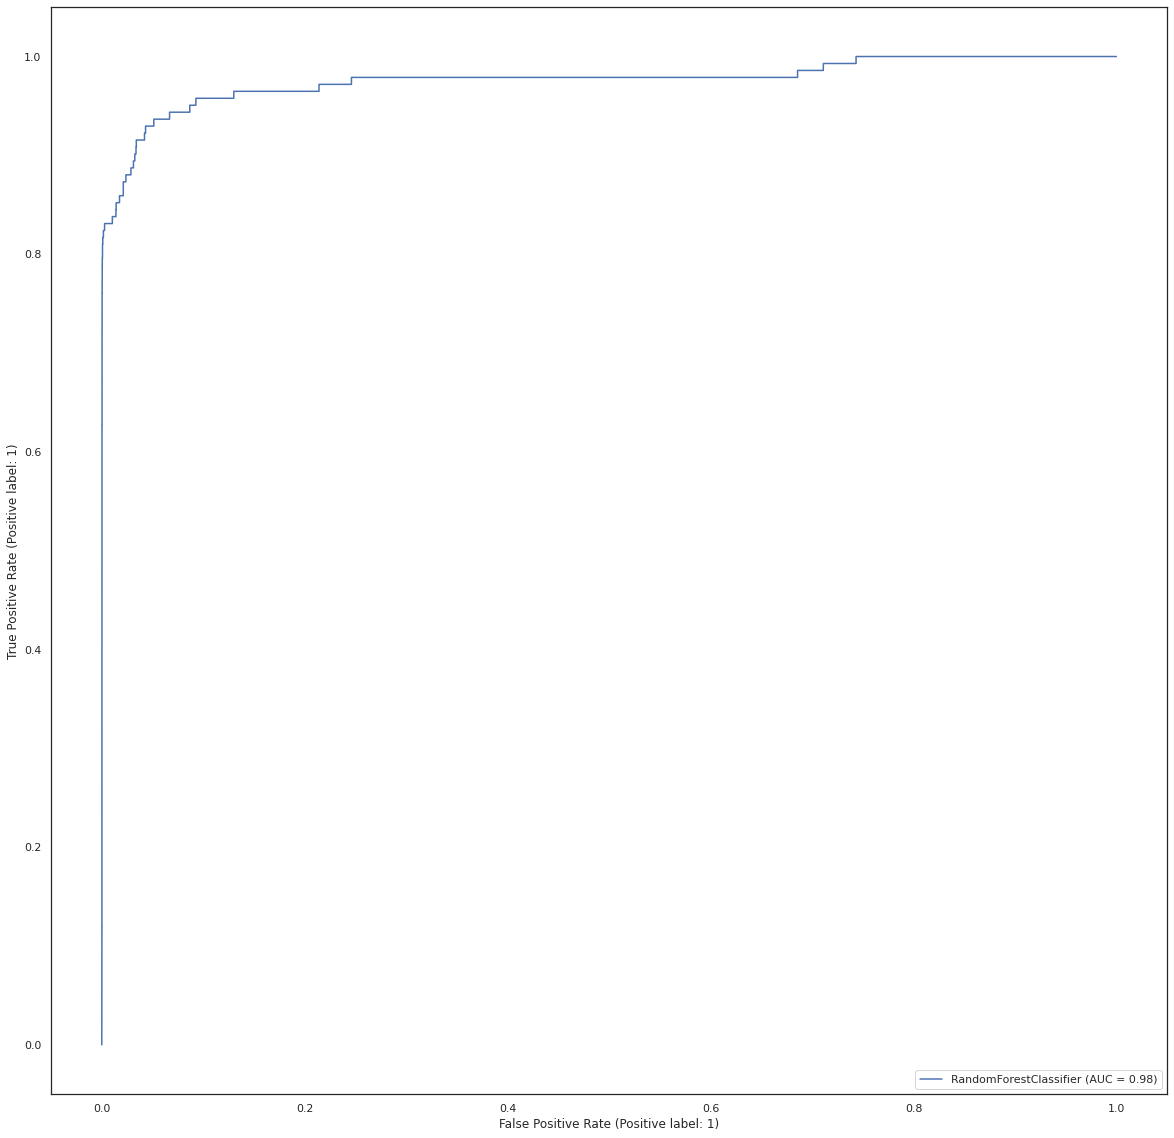

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809
8,Logistic Regression with RandomOverSampler on ...,0.950378,0.974952,0.924508,0.949060,0.989666
9,Logistic Regression with RandomOverSampler on ...,0.975106,0.056722,0.894366,0.106678,0.973807


In [130]:
#Plot confusion matrix and ROC_AUC Curve for Random Forest Model with SMOTE on Train Data
visualize_model_train("Random Forest with SMOTE Train", rf_obj, X_train_smote, y_train_smote,y_pred_rf)

#Plot confusion matrix and ROC_AUC Curve for Random Forest with SMOTE Model on Test Data
visualize_model_test("Random Forest with SMOTE Test", rf_obj, X_test, y_test,y_test_pred_rf)

#Generate a metric score for Random Forest with SMOTE

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

## <font color="green">4. XGBoost</font>

In [131]:
#!pip install xgboost

# Finding the best number of trees in XGBoost

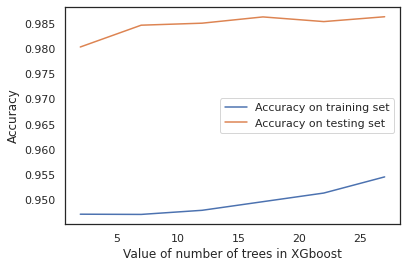

In [132]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree,eval_metric='mlogloss')
    xgb.fit(X_train_smote,y_train_smote)
    score1.append(xgb.score(X_train_smote,y_train_smote))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [133]:
xgb.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(eval_metric='mlogloss', n_estimators=27)>

### Here best number of trees in XGB is 27

In [134]:
xgb=XGBClassifier(n_estimators=27,eval_metric='mlogloss')
xgb.fit(X_train_smote,y_train_smote)
print('Accuracy of XGB n_estimators=27 on the testing dataset is :{:.3f}'.format(xgb.score(X_test,y_test)))

Accuracy of XGB n_estimators=27 on the testing dataset is :0.986


In [135]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {'learning_rate': [0.1, 0.3, 0.5], 
          'subsample': [0.3, 0.5, 0.7],
          'max_depth':[5,6], 
          'n_estimators': [27]}

#Instantiate XGBoost
xgb_obj = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
xgb_obj_cv = GridSearchCV(estimator = xgb_obj,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
xgb_obj_cv.fit(X_train_smote, y_train_smote)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649310224.5615077 seconds
Fitting 5 folds for each of 18 candidates, totalling 90 fits

End Time =  1649313041.7145061 seconds

Execution Time =  00:46:57


In [136]:
# results of grid search CV
cv_results = pd.DataFrame(xgb_obj_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.985532,0.055559,0.116332,0.004392,0.1,5,27,0.3,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.997950,0.998202,0.998309,0.998346,0.998409,0.998243,0.000161,17,0.998273,0.998340,0.998258,0.998321,0.998408,0.998320,0.000053
1,28.478721,0.129825,0.112672,0.002851,0.1,5,27,0.5,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.997961,0.998234,0.998304,0.998510,0.998229,0.998248,0.000176,16,0.998285,0.998351,0.998242,0.998489,0.998239,0.998321,0.000093
2,30.337489,0.165090,0.109377,0.002943,0.1,5,27,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.997955,0.998116,0.998358,0.998369,0.998338,0.998227,0.000165,18,0.998288,0.998274,0.998315,0.998365,0.998362,0.998321,0.000037
3,27.974138,0.152575,0.119398,0.006644,0.1,6,27,0.3,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.999123,0.999188,0.999329,0.999294,0.999275,0.999242,0.000075,14,0.999324,0.999284,0.999268,0.999271,0.999302,0.999290,0.000021
4,34.635253,0.237646,0.119382,0.003138,0.1,6,27,0.5,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.999089,0.999174,0.999316,0.999278,0.999287,0.999229,0.000085,15,0.999302,0.999267,0.999279,0.999278,0.999319,0.999289,0.000019


In [137]:
# Best score with best C
best_score = xgb_obj_cv.best_score_
best_C = xgb_obj_cv.best_estimator_

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9999657443782308
Best hyperparameters is XGBClassifier(eval_metric='mlogloss', learning_rate=0.5, max_depth=6,
              n_estimators=27, random_state=42, subsample=0.7)


#### Model with optimal hyperparameters

In [138]:
#Based on best score and hyper parameter, let's see the result.

xgb_obj = XGBClassifier(random_state=42, 
                        eval_metric='mlogloss',
                        learning_rate=0.5,
                        subsample=0.7,
                        max_depth=6, 
                        n_estimators=27)

xgb_obj.fit(X_train_smote, y_train_smote)

XGBClassifier(eval_metric='mlogloss', learning_rate=0.5, max_depth=6,
              n_estimators=27, random_state=42, subsample=0.7)

In [139]:
#Prediction on train data
y_pred_xgb = xgb_obj.predict(X_train_smote)

#check predict probability on train data
pred_prob = xgb_obj.predict_proba(X_train_smote)


#Prediction on test data
y_test_pred_xgb = xgb_obj.predict(X_test)

#check predict probability on test data
pred_test_prob = xgb_obj.predict_proba(X_test)

In [140]:
#check various scores on train and test data for XGBoost with SMOTE Model
model_perf_df = calculate_model_peformance("XGBoost with SMOTE", y_train_smote, y_pred_xgb, pred_prob[:,1], "Train", y_test, y_test_pred_xgb, pred_test_prob[:,1], "Test")


XGBoost with SMOTE Model Performance Report on Train Data:
Accuracy: 0.9994824484709618
Precision: 0.9989659672723622
Recall: 1.0
F1_score: 0.9994827161919876
Roc_auc: 0.9999883109551185

XGBoost with SMOTE Model Performance Report on Test Data:
Accuracy: 0.9977528878901724
Precision: 0.4119718309859155
Recall: 0.823943661971831
F1_score: 0.5492957746478874
Roc_auc: 0.9628842915997056


Confusion Matrix and ROC Curve of XGBoost with SMOTE Model on Train Data
[[198808    206]
 [     0 199014]]
Accuracy:  0.9994824484709618
Sensitivity:  1.0
Specificity:  0.9989648969419237


<Figure size 576x432 with 0 Axes>

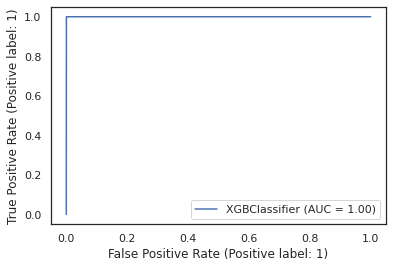

Confusion Matrix and ROC Curve of XGBoost with SMOTE Model on Test Data
[[85134   167]
 [   25   117]]
Accuracy:  0.9977528878901724
Sensitivity:  0.823943661971831
Specificity:  0.9980422269375505


<Figure size 576x432 with 0 Axes>

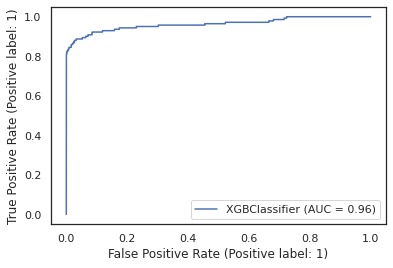

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809
8,Logistic Regression with RandomOverSampler on ...,0.950378,0.974952,0.924508,0.949060,0.989666
9,Logistic Regression with RandomOverSampler on ...,0.975106,0.056722,0.894366,0.106678,0.973807


In [141]:
#Plot confusion matrix and ROC_AUC Curve for XGBoost Model on Train Data
visualize_model_train("XGBoost with SMOTE", xgb_obj, X_train_smote, y_train_smote,y_pred_xgb)

#Plot confusion matrix and ROC_AUC Curve for XGBoost Model on Test Data
visualize_model_test("XGBoost with SMOTE", xgb_obj, X_test, y_test,y_test_pred_xgb)

#Generate a metric score for XGBoost with SMOTE

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

**<font color="maroon">Observations:</font>**

Based on above Performance metrix of all Models, ROC-AUC of Random Forest Model is best for Train and Test Data as compared with other models. So we are going to consider Random Forest with SMOTE as best model though it takes memory and time but the result is good.

# <font color="Blue">AdaSyn (Adaptive Synthetic Sampling)</font>

### Print the class distribution after applying ADASYN

In [142]:
#Initialize ADASYN
ada = over_sampling.ADASYN(random_state=42)

#Run ADASYN on Train data to handle imbalance
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

print('Class distribution before smote: ', Counter(y_train))
print('Class distribution after smote: ', Counter(y_train_smote))

Class distribution before smote:  Counter({0: 199014, 1: 350})
Class distribution after smote:  Counter({0: 199014, 1: 199014})


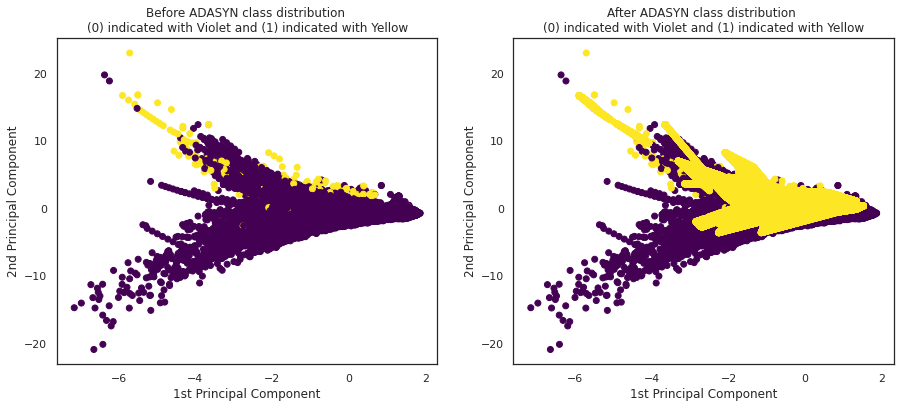

In [143]:
# scatter plot of examples by class labels before and after ADASYN

sns.set(style="white")
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.scatter(X_train.V1, X_train.V2, c = y_train,cmap='viridis')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Before ADASYN class distribution \n(0) indicated with Violet and (1) indicated with Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_train_adasyn.V1, X_train_adasyn.V2, c = y_train_adasyn, cmap='viridis')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('After ADASYN class distribution \n(0) indicated with Violet and (1) indicated with Yellow')
plt.show()

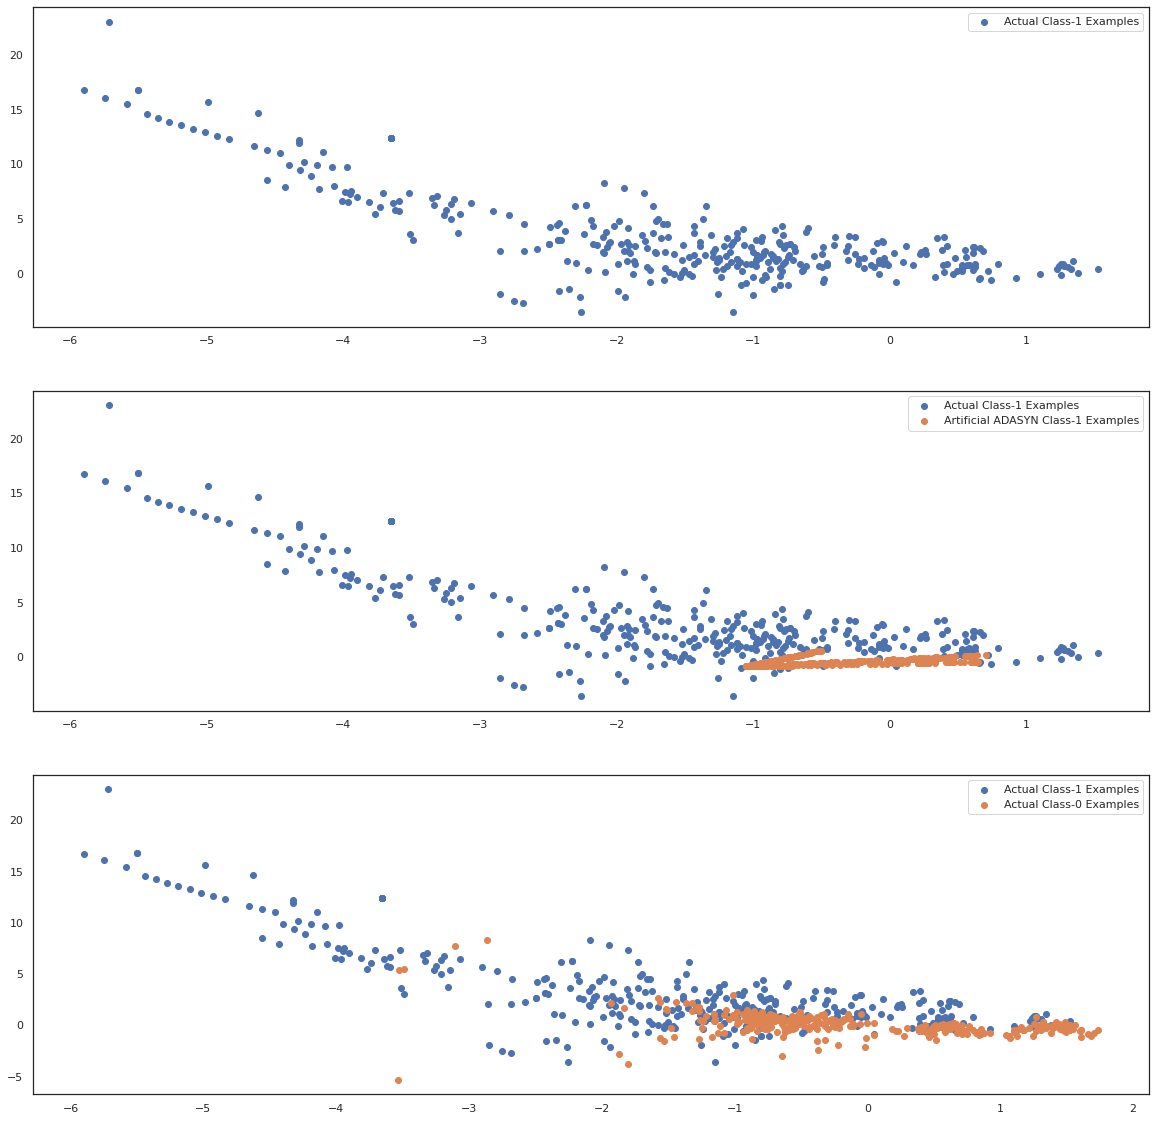

In [144]:
# scatter plot of examples by class labels before and after ADASYN
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
             label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## <font color="green">1. Logistic Regression</font>

In [145]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

#Instantiate logistic regression
lr = LogisticRegression(random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
lr_cv = GridSearchCV(estimator = lr,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
lr_cv.fit(X_train_adasyn, y_train_adasyn)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649313108.2102354 seconds
Fitting 5 folds for each of 6 candidates, totalling 30 fits

End Time =  1649313168.1697254 seconds

Execution Time =  00:00:59


In [146]:
# results of grid search CV
cv_results = pd.DataFrame(lr_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.640892,0.038427,0.038687,0.000535,0.01,{'C': 0.01},0.966565,0.965954,0.967345,0.966417,0.965825,0.966421,0.000538,6,0.966559,0.966620,0.966223,0.966409,0.966445,0.966451,0.000137
1,1.745576,0.106305,0.037909,0.000110,0.1,{'C': 0.1},0.966582,0.966021,0.967381,0.966500,0.965842,0.966465,0.000537,5,0.966597,0.966665,0.966278,0.966450,0.966488,0.966496,0.000133
2,1.739668,0.121863,0.038462,0.000585,1,{'C': 1},0.966583,0.966026,0.967382,0.966505,0.965841,0.966467,0.000536,4,0.966598,0.966667,0.966281,0.966452,0.966490,0.966498,0.000132
3,1.753715,0.119185,0.038368,0.000645,10,{'C': 10},0.966583,0.966026,0.967382,0.966506,0.965841,0.966468,0.000536,1,0.966598,0.966667,0.966282,0.966452,0.966490,0.966498,0.000132
4,1.754358,0.122086,0.038547,0.000785,100,{'C': 100},0.966583,0.966026,0.967382,0.966506,0.965841,0.966468,0.000536,3,0.966598,0.966667,0.966282,0.966452,0.966490,0.966498,0.000132


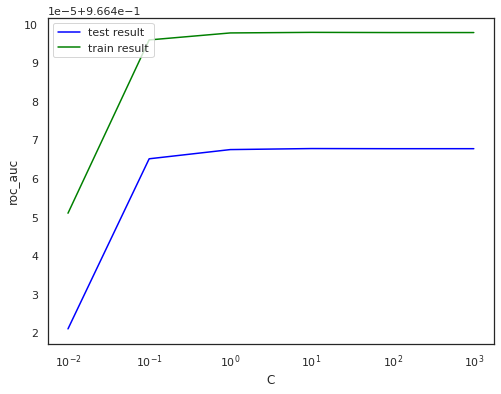

In [147]:
#print the evaluation result by choosing a evaluation metric

# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'],color='blue')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'],color='green')
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [148]:
# Best score with best C
best_score = lr_cv.best_score_
best_C = lr_cv.best_params_['C']

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9664677172447224
Best hyperparameters is 10


We got the optimal value of c = 10 , lets initiate logistic regression model with `c=10`

In [149]:
#Prediction on train data
y_pred_lr = lr_cv.predict(X_train_adasyn)

#check predict probability on train data
pred_prob = lr_cv.predict_proba(X_train_adasyn)


#Prediction on test data
y_test_pred_lr = lr_cv.predict(X_test)

#check predict probability on test data
pred_test_prob = lr_cv.predict_proba(X_test)

In [150]:
#check various scores on train and test data for Logistics Regression Model with ADASYN
model_perf_df = calculate_model_peformance("Logistic Regression with ADASYN", y_train_adasyn, y_pred_lr, pred_prob[:,1], "Train", y_test, y_test_pred_lr, pred_test_prob[:,1], "Test")


Logistic Regression with ADASYN Model Performance Report on Train Data:
Accuracy: 0.8861545959988041
Precision: 0.905816501650165
Recall: 0.8619313927955903
F1_score: 0.8833292137840121
Roc_auc: 0.966495954090381

Logistic Regression with ADASYN Model Performance Report on Test Data:
Accuracy: 0.9085940334492001
Precision: 0.01688508064516129
Recall: 0.9436619718309859
F1_score: 0.03317652884377321
Roc_auc: 0.970013808599242


Confusion Matrix and ROC Curve of Logistic Regression with ADASYN Train Model on Train Data
[[181178  17836]
 [ 27478 171539]]
Accuracy:  0.8861545959988041
Sensitivity:  0.8619313927955903
Specificity:  0.9103781643502468


<Figure size 576x432 with 0 Axes>

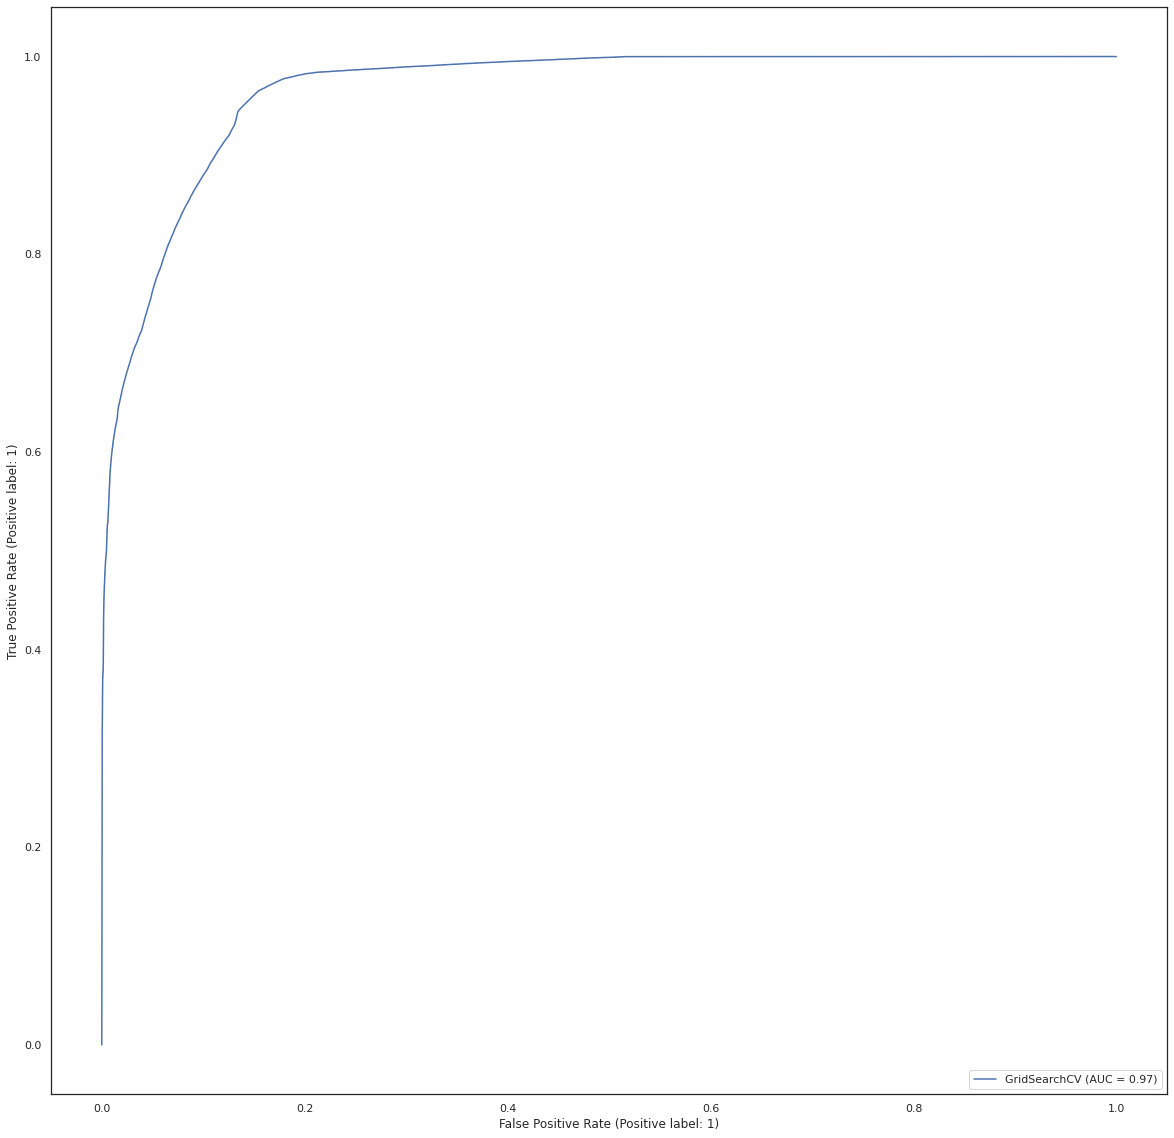

Confusion Matrix and ROC Curve of Logistic Regression with ADASYN Test Model on Test Data
[[77499  7802]
 [    8   134]]
Accuracy:  0.9085940334492001
Sensitivity:  0.9436619718309859
Specificity:  0.9085356560884398


<Figure size 576x432 with 0 Axes>

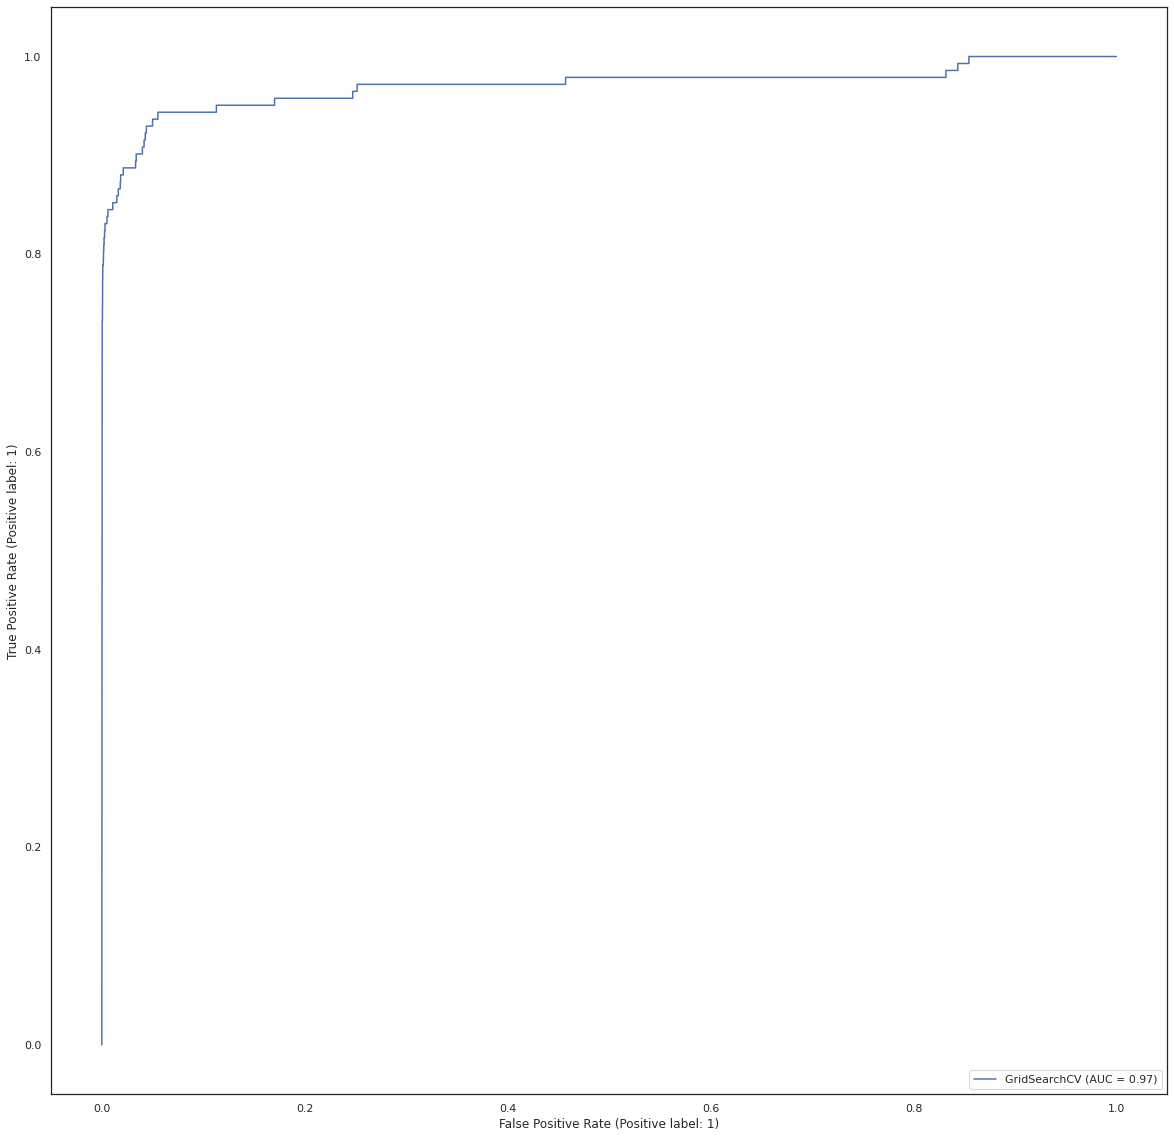

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809
8,Logistic Regression with RandomOverSampler on ...,0.950378,0.974952,0.924508,0.949060,0.989666
9,Logistic Regression with RandomOverSampler on ...,0.975106,0.056722,0.894366,0.106678,0.973807


In [151]:
#Plot confusion matrix and ROC_AUC Curve for Logistic Regression Model on Train Data
visualize_model_train("Logistic Regression with ADASYN Train", lr_cv, X_train_adasyn, y_train_adasyn,y_pred_lr)

#Plot confusion matrix and ROC_AUC Curve for Logistic Regression Model on Test Data
visualize_model_test("Logistic Regression with ADASYN Test", lr_cv, X_test, y_test,y_test_pred_lr)

#Generate a metric score for Logistic Regression

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

### Similarly explore other algorithms by building models like:
- Decision Tree
- Random Forest
- XGBoost

## <font color="green">2. Decision Tree</font>

In [152]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8]}

#Instantiate Decision Tree
dt_obj = DecisionTreeClassifier(random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
dt_obj_cv = GridSearchCV(estimator = dt_obj,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
dt_obj_cv.fit(X_train_adasyn, y_train_adasyn)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649313170.9954937 seconds
Fitting 5 folds for each of 15 candidates, totalling 75 fits

End Time =  1649313715.515456 seconds

Execution Time =  00:09:04


In [153]:
# results of grid search CV
cv_results = pd.DataFrame(dt_obj_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.278763,0.042095,0.026070,0.000239,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.916156,0.915307,0.915966,0.916025,0.914878,0.915667,0.000492,11,0.915842,0.915985,0.915868,0.915668,0.915972,0.915867,0.000114
1,4.261605,0.058729,0.026158,0.000254,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.916156,0.915307,0.915966,0.916025,0.914878,0.915667,0.000492,11,0.915842,0.915985,0.915868,0.915668,0.915972,0.915867,0.000114
2,4.282809,0.063131,0.028010,0.003531,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.916156,0.915307,0.915966,0.916025,0.914878,0.915667,0.000492,11,0.915842,0.915985,0.915868,0.915668,0.915972,0.915867,0.000114
3,4.283995,0.013827,0.026606,0.001164,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.916156,0.915290,0.915943,0.915968,0.914843,0.915640,0.000495,14,0.915842,0.915952,0.915843,0.915686,0.915939,0.915852,0.000095
4,4.298364,0.035420,0.026450,0.000357,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.916156,0.915229,0.915949,0.915964,0.914896,0.915639,0.000488,15,0.915842,0.915907,0.915871,0.915682,0.915966,0.915854,0.000095


In [154]:
# Best score with best C
best_score = dt_obj_cv.best_score_
best_C = dt_obj_cv.best_estimator_

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9855450230398664
Best hyperparameters is DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=42)


#### Model with optimal hyperparameters

In [155]:
#Based on best score and hyper parameter, let's see the result.

dt_obj = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=8, 
                                  min_samples_leaf=10)

dt_obj.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=42)

In [156]:
#Prediction on train data
y_pred_dt = dt_obj.predict(X_train_adasyn)

#check predict probability on train data
pred_prob = dt_obj.predict_proba(X_train_adasyn)

#Prediction on test data
y_test_pred_dt = dt_obj.predict(X_test)

#check predict probability on test data
pred_test_prob = dt_obj.predict_proba(X_test)

In [157]:
#check various scores on train and test data for Decision Tree Model with ADASYN
model_perf_df = calculate_model_peformance("Decision Tree with ADASYN", y_train_adasyn, y_pred_dt, pred_prob[:,1], "Train", y_test, y_test_pred_dt, pred_test_prob[:,1], "Test")


Decision Tree with ADASYN Model Performance Report on Train Data:
Accuracy: 0.958940384040439
Precision: 0.9341318503731166
Recall: 0.9875136294889382
F1_score: 0.9600812883023496
Roc_auc: 0.9860026717721575

Decision Tree with ADASYN Model Performance Report on Test Data:
Accuracy: 0.9281275236122327
Precision: 0.0198495277733312
Recall: 0.8732394366197183
F1_score: 0.03881671623102207
Roc_auc: 0.9345913171435503


Confusion Matrix and ROC Curve of Decision Tree with ADASYN Train Model on Train Data
[[185156  13858]
 [  2485 196532]]
Accuracy:  0.958940384040439
Sensitivity:  0.9875136294889382
Specificity:  0.9303667078697981


<Figure size 576x432 with 0 Axes>

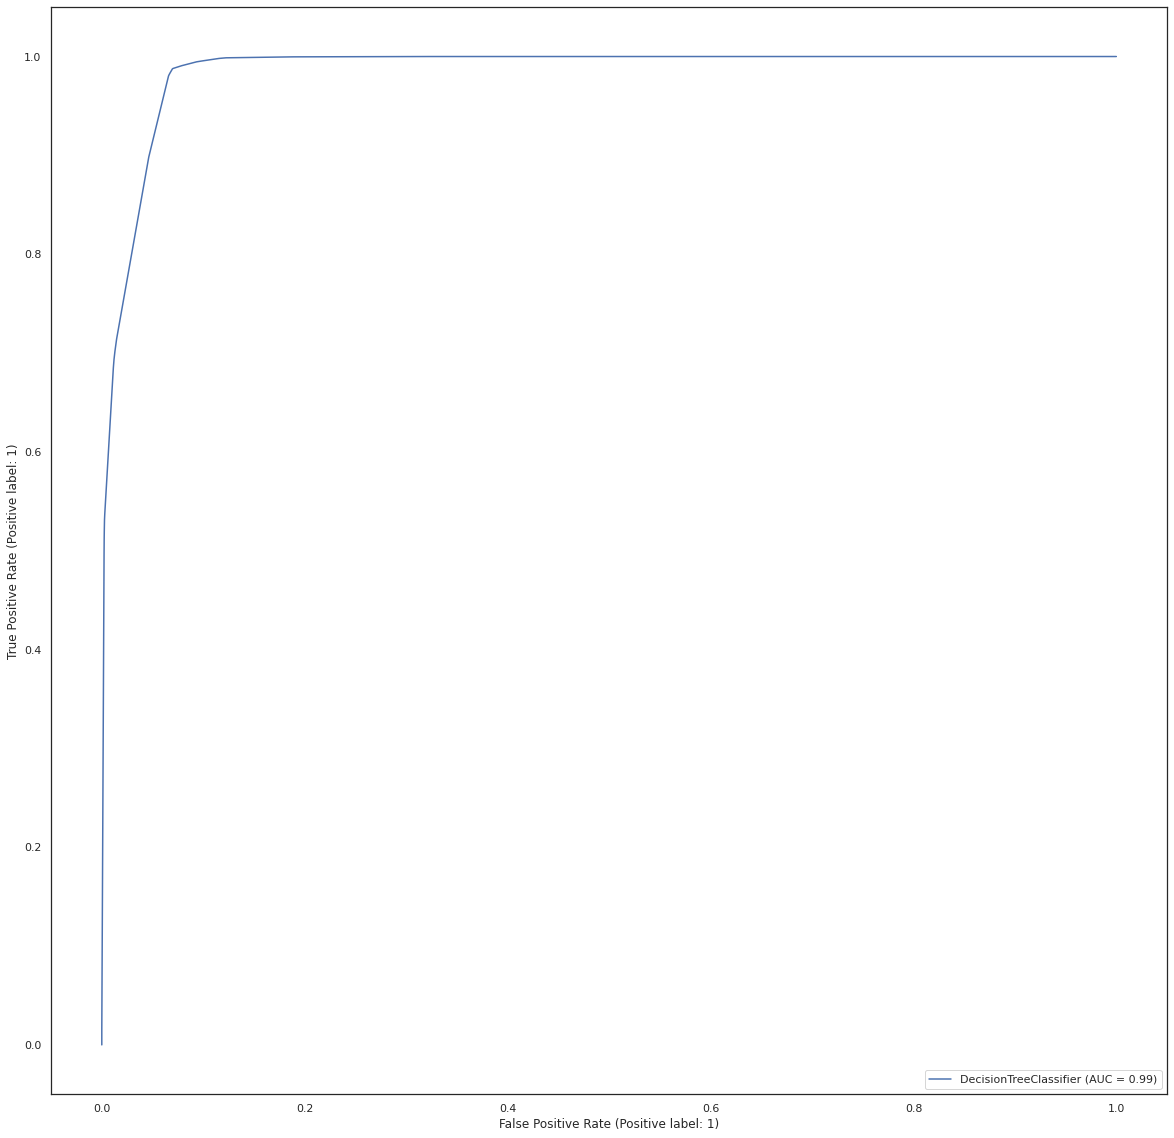

Confusion Matrix and ROC Curve of Decision Tree with ADASYN Test Model on Test Data
[[79178  6123]
 [   18   124]]
Accuracy:  0.9281275236122327
Sensitivity:  0.8732394366197183
Specificity:  0.9282188954408507


<Figure size 576x432 with 0 Axes>

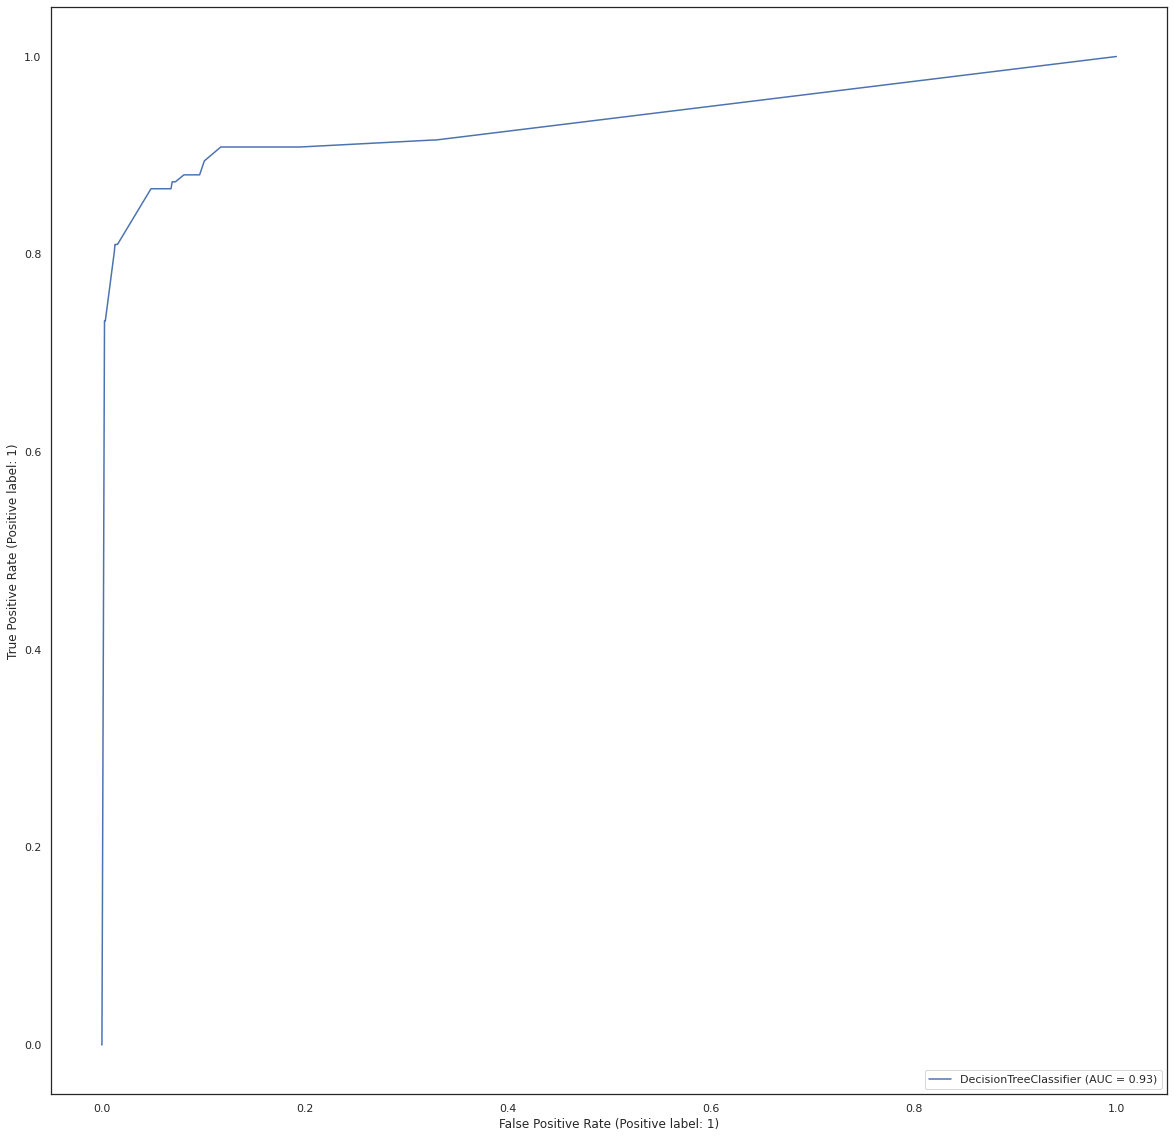

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809
8,Logistic Regression with RandomOverSampler on ...,0.950378,0.974952,0.924508,0.949060,0.989666
9,Logistic Regression with RandomOverSampler on ...,0.975106,0.056722,0.894366,0.106678,0.973807


In [158]:
#Plot confusion matrix and ROC_AUC Curve for Decision Tree Model with ADASYN on Train Data
visualize_model_train("Decision Tree with ADASYN Train", dt_obj, X_train_adasyn, y_train_adasyn,y_pred_dt)

#Plot confusion matrix and ROC_AUC Curve for Decision Tree Model with ADASYN on Test Data
visualize_model_test("Decision Tree with ADASYN Test", dt_obj, X_test, y_test,y_test_pred_dt)

#Generate a metric score for Decision Tree with ADASYN

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

## <font color="green">3. Random Forest</font>

In [159]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {"criterion": ['gini'], 'min_samples_leaf': [5, 10, 20, 50, 100], 'max_depth': [3, 5, 8], 'n_estimators': [50,80]}

#Instantiate Random Forest
rf_obj = RandomForestClassifier(random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
rf_obj_cv = GridSearchCV(estimator = rf_obj,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
rf_obj_cv.fit(X_train_adasyn, y_train_adasyn)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649313729.8290348 seconds
Fitting 5 folds for each of 30 candidates, totalling 150 fits

End Time =  1649321888.1500285 seconds

Execution Time =  02:15:58


In [160]:
# results of grid search CV
cv_results = pd.DataFrame(rf_obj_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,24.675001,0.056268,0.208586,0.008401,gini,3,5,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.967582,0.964599,0.966926,0.963959,0.966393,0.965892,0.001384,26,0.967363,0.965237,0.966257,0.964610,0.966890,0.966071,0.001020
1,39.342091,0.175835,0.320290,0.012942,gini,3,5,80,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.969433,0.967582,0.968999,0.966921,0.968978,0.968382,0.000961,21,0.969395,0.968157,0.968260,0.967592,0.969367,0.968554,0.000712
2,24.570427,0.036122,0.202471,0.001536,gini,3,10,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.967581,0.964598,0.966925,0.963959,0.966392,0.965891,0.001384,27,0.967363,0.965237,0.966256,0.964609,0.966889,0.966071,0.001020
3,39.230317,0.119924,0.329622,0.014832,gini,3,10,80,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.969433,0.967581,0.968997,0.966919,0.968976,0.968381,0.000961,22,0.969395,0.968156,0.968258,0.967591,0.969366,0.968553,0.000713
4,24.558391,0.027898,0.208155,0.005950,gini,3,20,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.967580,0.964598,0.966924,0.963959,0.966392,0.965891,0.001384,28,0.967362,0.965236,0.966254,0.964609,0.966889,0.966070,0.001020


In [161]:
# Best score with best C
best_score = rf_obj_cv.best_score_
best_C = rf_obj_cv.best_estimator_

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9983624172126435
Best hyperparameters is RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=80,
                       random_state=42)


#### Model with optimal hyperparameters

In [162]:
#Based on best score and hyper parameter, let's see the result.

rf_obj = RandomForestClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=8, 
                                  min_samples_leaf=5,
                               n_estimators=80)

rf_obj.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=80,
                       random_state=42)

In [163]:
#Prediction on train data
y_pred_rf = rf_obj.predict(X_train_adasyn)

#check predict probability on train data
pred_prob = rf_obj.predict_proba(X_train_adasyn)


#Prediction on test data
y_test_pred_rf = rf_obj.predict(X_test)

#check predict probability on test data
pred_test_prob = rf_obj.predict_proba(X_test)

In [164]:
#check various scores on train and test data for Random Forest with ADASYN ModeL
model_perf_df = calculate_model_peformance("Random Forest with ADASYN", y_train_adasyn, y_pred_rf, pred_prob[:,1], "Train", y_test, y_test_pred_rf, pred_test_prob[:,1], "Test")


Random Forest with ADASYN Model Performance Report on Train Data:
Accuracy: 0.9797000736123568
Precision: 0.9823371006775157
Recall: 0.9769667917816066
F1_score: 0.979644586417296
Roc_auc: 0.9984255457989113

Random Forest with ADASYN Model Performance Report on Test Data:
Accuracy: 0.9811570286623831
Precision: 0.0702576112412178
Recall: 0.8450704225352113
F1_score: 0.12972972972972974
Roc_auc: 0.9732581194249825


Confusion Matrix and ROC Curve of Random Forest with ADASYN Train Model on Train Data
[[195518   3496]
 [  4584 194433]]
Accuracy:  0.9797000736123568
Sensitivity:  0.9769667917816066
Specificity:  0.9824333966454621


<Figure size 576x432 with 0 Axes>

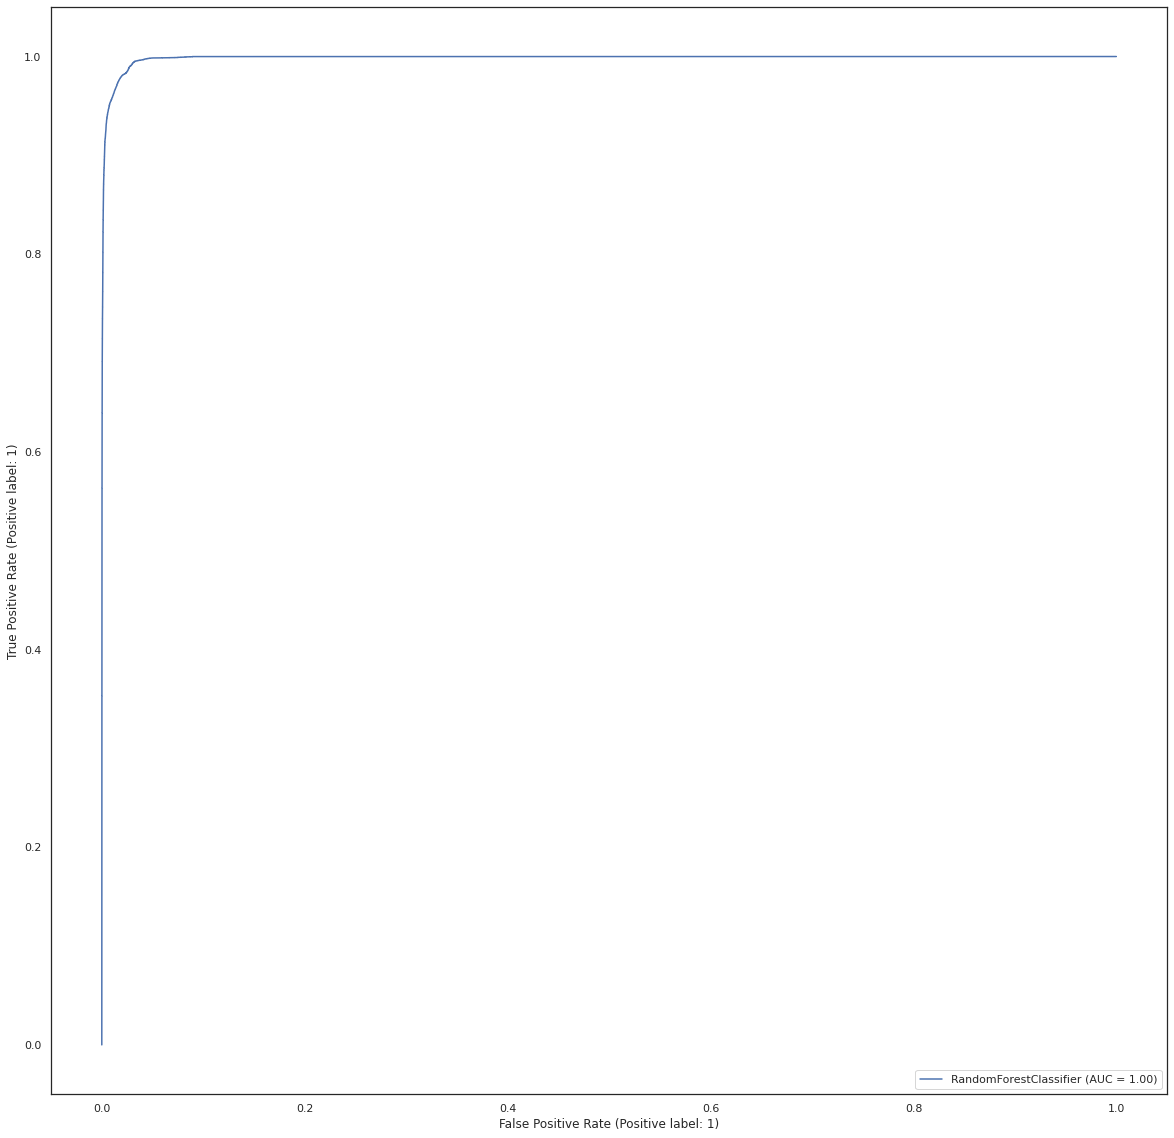

Confusion Matrix and ROC Curve of Random Forest with ADASYN Test Model on Test Data
[[83713  1588]
 [   22   120]]
Accuracy:  0.9811570286623831
Sensitivity:  0.8450704225352113
Specificity:  0.9813835711187442


<Figure size 576x432 with 0 Axes>

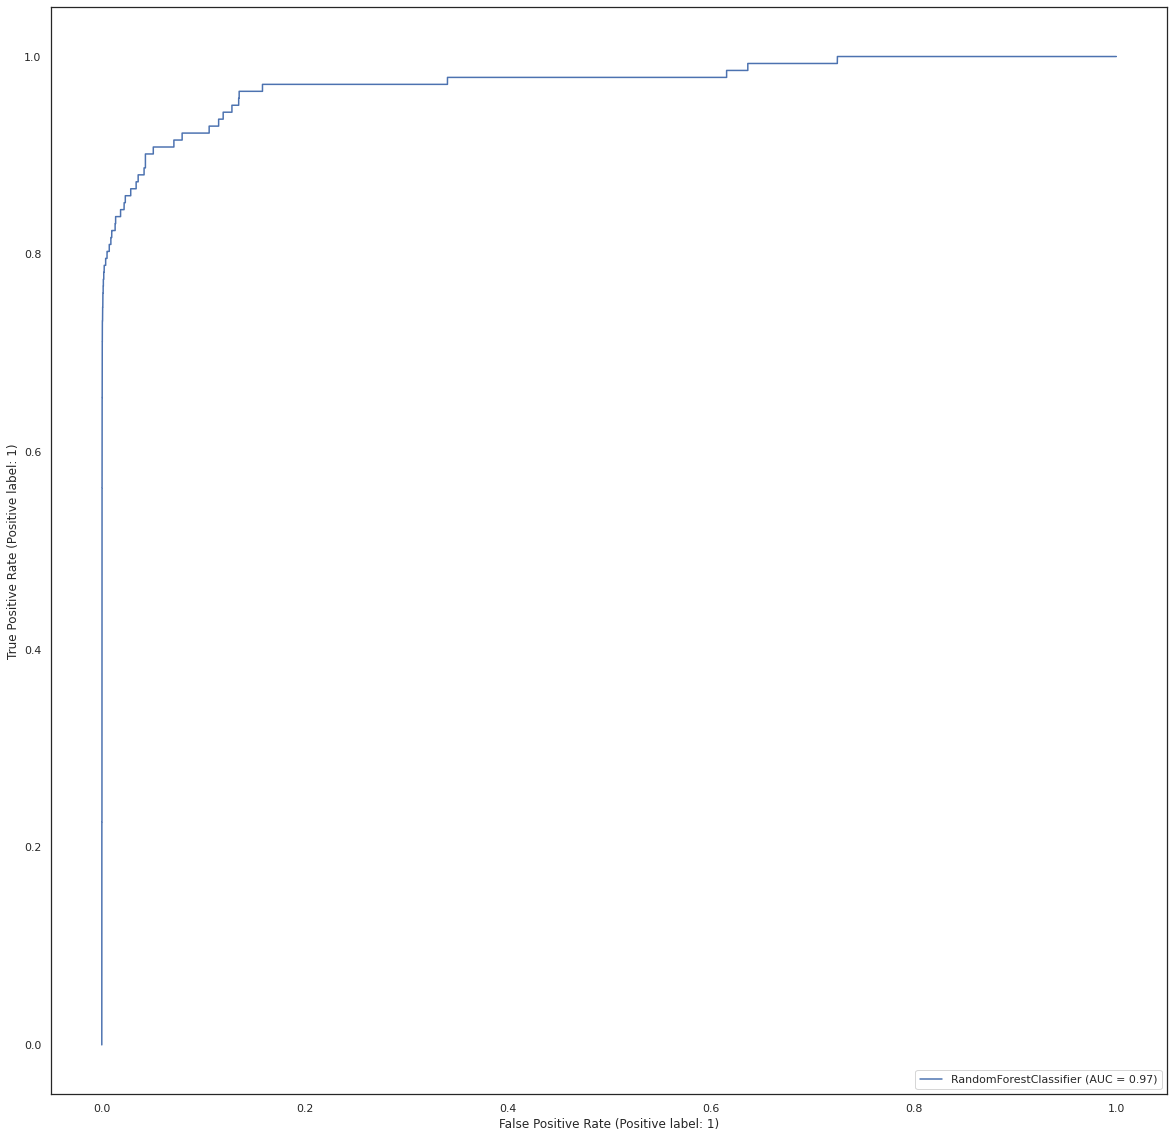

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809
8,Logistic Regression with RandomOverSampler on ...,0.950378,0.974952,0.924508,0.949060,0.989666
9,Logistic Regression with RandomOverSampler on ...,0.975106,0.056722,0.894366,0.106678,0.973807


In [165]:
#Plot confusion matrix and ROC_AUC Curve for Random Forest Model with ADASYN on Train Data
visualize_model_train("Random Forest with ADASYN Train", rf_obj, X_train_adasyn, y_train_adasyn,y_pred_rf)

#Plot confusion matrix and ROC_AUC Curve for Random Forest with ADASYN Model on Test Data
visualize_model_test("Random Forest with ADASYN Test", rf_obj, X_test, y_test,y_test_pred_rf)

#Generate a metric score for Random Forest with ADASYN

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

## <font color="green">4. XGBoost</font>

In [166]:
#!pip install xgboost

# Finding the best number of trees in XGBoost

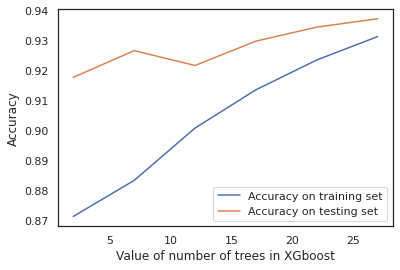

In [167]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree,eval_metric='mlogloss')
    xgb.fit(X_train_adasyn,y_train_adasyn)
    score1.append(xgb.score(X_train_adasyn,y_train_adasyn))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [168]:
xgb.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(eval_metric='mlogloss', n_estimators=27)>

### Here best number of trees in XGB is 27

In [169]:
xgb=XGBClassifier(n_estimators=27,eval_metric='mlogloss')
xgb.fit(X_train_adasyn,y_train_adasyn)
print('Accuracy of XGB n_estimators=27 on the testing dataset is :{:.3f}'.format(xgb.score(X_test,y_test)))

Accuracy of XGB n_estimators=27 on the testing dataset is :0.937


In [170]:
start_time=time.time()
print("\nStart Time = ", start_time,"seconds")

#perform cross validation

#We are using StratifiedKFold using 5 splits
cv_num = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#perform hyperparameter tuning and using below parameters.
params = {'learning_rate': [0.1, 0.3, 0.5], 
          'subsample': [0.3, 0.5, 0.7],
          'max_depth':[5,6], 
          'n_estimators': [27]}

#Instantiate XGBoost
xgb_obj = XGBClassifier(random_state=42, eval_metric='mlogloss')

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
xgb_obj_cv = GridSearchCV(estimator = xgb_obj,
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
xgb_obj_cv.fit(X_train_adasyn, y_train_adasyn)

end_time=time.time()
print("\nEnd Time = ", end_time,"seconds")
print("\nExecution Time = ", time.strftime("%H:%M:%S", time.gmtime(end_time-start_time)))


Start Time =  1649322123.118305 seconds
Fitting 5 folds for each of 18 candidates, totalling 90 fits

End Time =  1649324918.8149002 seconds

Execution Time =  00:46:35


In [171]:
# results of grid search CV
cv_results = pd.DataFrame(xgb_obj_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.839627,0.066124,0.122512,0.001875,0.1,5,27,0.3,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.996045,0.996217,0.996679,0.996266,0.996186,0.996279,0.000213,17,0.996249,0.996531,0.996349,0.996375,0.996520,0.996405,0.000107
1,28.544963,0.172462,0.125324,0.004199,0.1,5,27,0.5,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.996133,0.995964,0.996687,0.996541,0.996097,0.996284,0.000279,16,0.996319,0.996352,0.996350,0.996592,0.996464,0.996415,0.000101
2,30.837701,0.206092,0.123151,0.002183,0.1,5,27,0.7,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.996043,0.995970,0.996817,0.996200,0.995932,0.996193,0.000326,18,0.996285,0.996300,0.996559,0.996223,0.996269,0.996327,0.000118
3,27.847473,0.171978,0.130546,0.003314,0.1,6,27,0.3,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.998169,0.998370,0.998821,0.998529,0.998356,0.998449,0.000218,14,0.998476,0.998619,0.998684,0.998583,0.998477,0.998568,0.000081
4,34.816184,0.183872,0.136915,0.009131,0.1,6,27,0.5,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.998437,0.998244,0.998698,0.998356,0.998466,0.998440,0.000150,15,0.998690,0.998534,0.998546,0.998457,0.998567,0.998559,0.000075


In [172]:
# Best score with best C
best_score = xgb_obj_cv.best_score_
best_C = xgb_obj_cv.best_estimator_

print("Best roc_auc score is {0}".format(best_score))
print("Best hyperparameters is {0}".format(best_C))

Best roc_auc score is 0.9999376735341524
Best hyperparameters is XGBClassifier(eval_metric='mlogloss', learning_rate=0.5, max_depth=6,
              n_estimators=27, random_state=42, subsample=0.7)


#### Model with optimal hyperparameters

In [173]:
#Based on best score and hyper parameter, let's see the result.

xgb_obj = XGBClassifier(random_state=42, 
                        eval_metric='mlogloss',
                        learning_rate=0.5,
                        subsample=0.7,
                        max_depth=6, 
                        n_estimators=27)

xgb_obj.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(eval_metric='mlogloss', learning_rate=0.5, max_depth=6,
              n_estimators=27, random_state=42, subsample=0.7)

In [174]:
#Prediction on train data
y_pred_xgb = xgb_obj.predict(X_train_adasyn)

#check predict probability on train data
pred_prob = xgb_obj.predict_proba(X_train_adasyn)


#Prediction on test data
y_test_pred_xgb = xgb_obj.predict(X_test)

#check predict probability on test data
pred_test_prob = xgb_obj.predict_proba(X_test)

In [175]:
#check various scores on train and test data for XGBoost with ADASYN Model
model_perf_df = calculate_model_peformance("XGBoost with ADASYN", y_train_adasyn, y_pred_xgb, pred_prob[:,1], "Train", y_test, y_test_pred_xgb, pred_test_prob[:,1], "Test")


XGBoost with ADASYN Model Performance Report on Train Data:
Accuracy: 0.999344272179805
Precision: 0.9986902718814922
Recall: 1.0
F1_score: 0.9993447068127894
Roc_auc: 0.9999774752395296

XGBoost with ADASYN Model Performance Report on Test Data:
Accuracy: 0.9974485914586333
Precision: 0.3774193548387097
Recall: 0.823943661971831
F1_score: 0.5176991150442478
Roc_auc: 0.9491333176253568


Confusion Matrix and ROC Curve of XGBoost with ADASYN Model on Train Data
[[198753    261]
 [     0 199017]]
Accuracy:  0.999344272179805
Sensitivity:  1.0
Specificity:  0.9986885344749615


<Figure size 576x432 with 0 Axes>

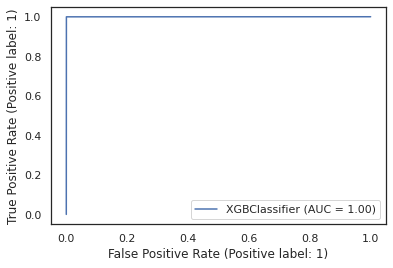

Confusion Matrix and ROC Curve of XGBoost with ADASYN Model on Test Data
[[85108   193]
 [   25   117]]
Accuracy:  0.9974485914586333
Sensitivity:  0.823943661971831
Specificity:  0.997737423945792


<Figure size 576x432 with 0 Axes>

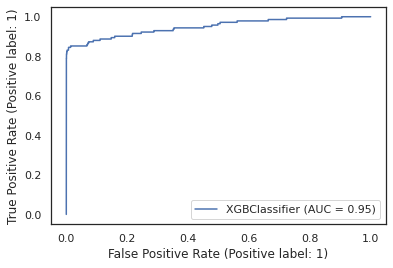

,Model,accuracy,precision,recall,f1_score,roc_auc
0,Logistic Regression on train data,0.999288,0.919355,0.651429,0.762542,0.986531
1,Logistic Regression on test data,0.999146,0.816514,0.626761,0.709163,0.967988
2,Decision Tree on train data,0.999253,0.873606,0.671429,0.759289,0.949785
3,Decision Tree on test data,0.999017,0.758929,0.598592,0.669291,0.909493
4,Random Forest on train data,0.999293,0.894340,0.677143,0.770732,0.993519
5,Random Forest on test data,0.999099,0.787611,0.626761,0.698039,0.969755
6,XGBoost on train data,0.999724,0.990033,0.851429,0.915515,0.998791
7,XGBoost on test data,0.999497,0.902439,0.781690,0.837736,0.973809
8,Logistic Regression with RandomOverSampler on ...,0.950378,0.974952,0.924508,0.949060,0.989666
9,Logistic Regression with RandomOverSampler on ...,0.975106,0.056722,0.894366,0.106678,0.973807


In [176]:
#Plot confusion matrix and ROC_AUC Curve for XGBoost Model on Train Data
visualize_model_train("XGBoost with ADASYN", xgb_obj, X_train_adasyn, y_train_adasyn,y_pred_xgb)

#Plot confusion matrix and ROC_AUC Curve for XGBoost Model on Test Data
visualize_model_test("XGBoost with ADASYN", xgb_obj, X_test, y_test,y_test_pred_xgb)

#Generate a metric score for XGBoost with ADASYN

#Add the metric scores to dataframe for comparision with other model performance
metric_score_df = metric_score_df.append(model_perf_df, ignore_index=True)
metric_score_df

**<font color="maroon">Observations:</font>**

Based on above Performance metrix of all Models after applying ADASYN sampling, ROC-AUC of Random Forest Model is best for Train and Test Data as compared with other models. So we are going to consider Random Forest with ADASYN as best model though it takes memory and time but the result is good.

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

We tried our best to find out the best model using best sampling method and hyperparameters.

After applying all balancing technique like RandomOverSampler, SMOTE and ADASYN on train and test data using different models like Logistic Regression, Decision Tree, Random Forest and XGBoost, we came to below result 

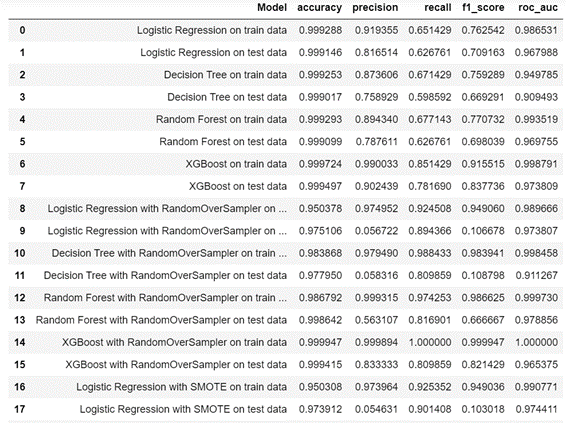
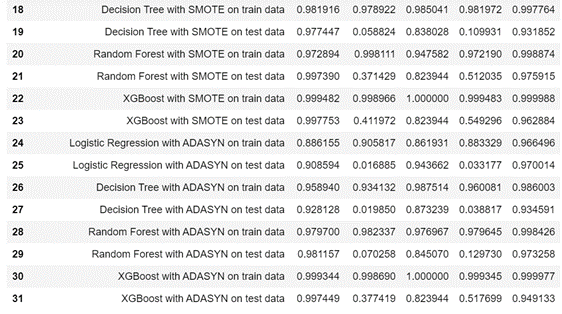

From above final report, **SMOTE sampling** method seems to give **better result** as compare to other. So we will consider `SMOTE as final best method to handle imbalance dataset`.

While in SMOTE, Logistic Regression and Random Forest seems to give good result but both have its own pros and cons.

- Random Forest Model consumes resources and took lot of time to train data and give good performance.
- Logistic regression Model consumed less resources and took less time to train and gave good performance result.

1. If we only consider performance of model then Random Forest is best.
2. If we consider performance along with memory consumption and time taken then Logistic Regression is best model.

Here for Credit Card Fraud detection, **performance and prediction** matter more for bank so considering that **Random Forest Model with SMOTE** is the best model because marginal benefit will make huge profit to the bank.

In [177]:
# perform the best oversampling method on X_train & y_train

#initialise the model with optimum hyperparameters
clf = RandomForestClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=8, 
                                  min_samples_leaf=5,
                               n_estimators=80)

# fit on the balanced dataset
clf.fit(X_train_smote, y_train_smote)

#print --> #print the evaluation score on the X_train_smote by choosing the best evaluation metric
y_train_pred_prob = clf.predict_proba(X_train_smote)[:, 1]
print("ROC-AUC Score of Random Forest Model on Train Data: ", round(metrics.roc_auc_score(y_train_smote, y_train_pred_prob),2))

#print --> #print the evaluation score on the X_test by choosing the best evaluation metric
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]
print("ROC-AUC Score of Random Forest Model on Test Data: ", round(metrics.roc_auc_score(y_test, y_test_pred_prob),2))

ROC-AUC Score of Random Forest Model on Train Data:  1.0
ROC-AUC Score of Random Forest Model on Test Data:  0.98


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 11


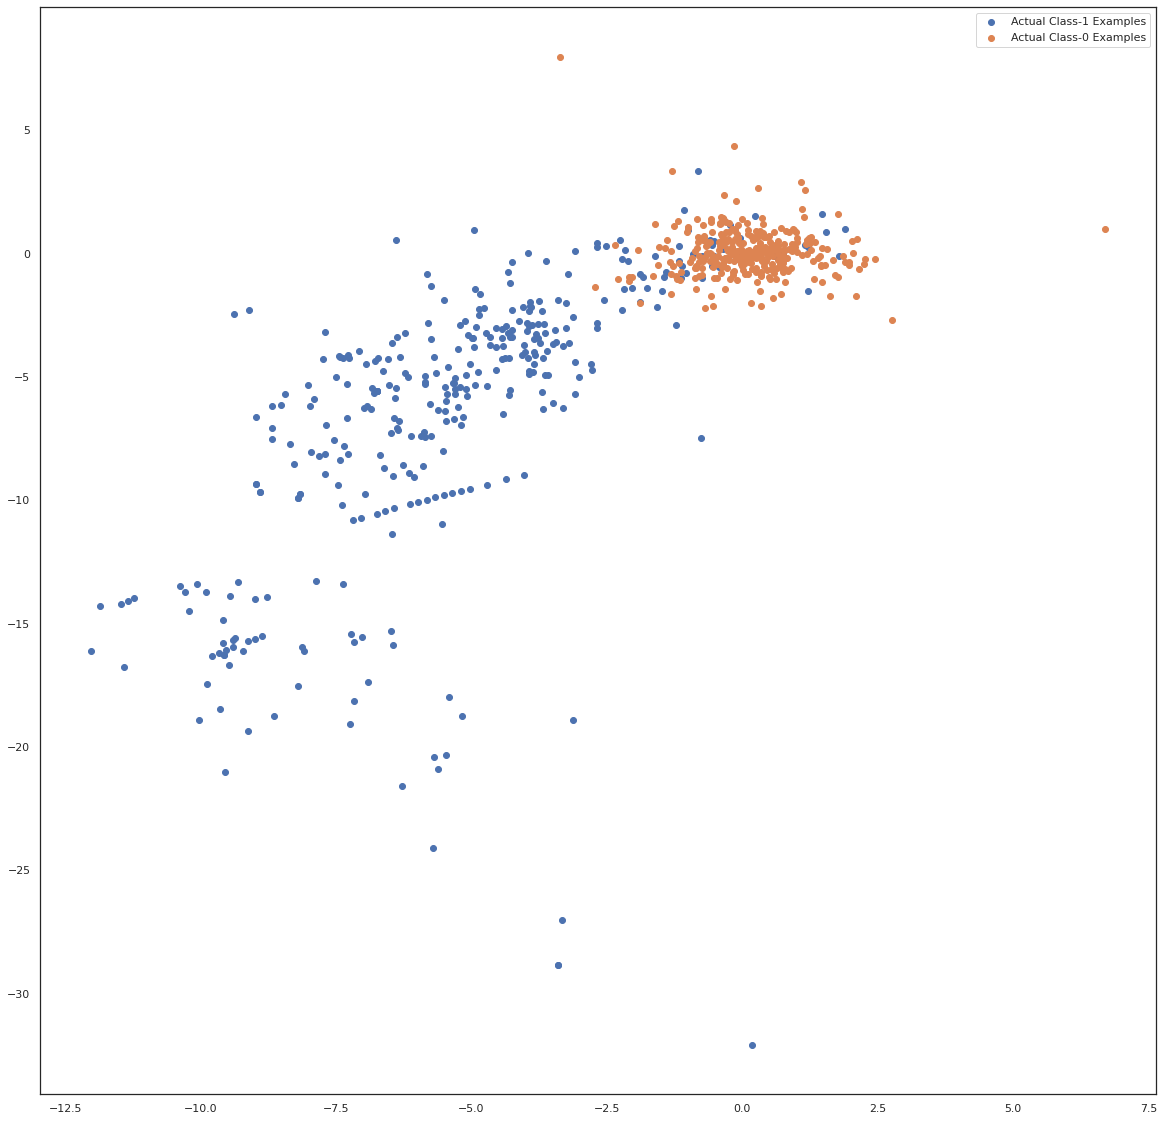

In [178]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [181]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_prob))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_prob)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Threshold =',threshold)
print('FPR =',fpr)
print('TPR =',tpr)

Train auc = 0.9988882266614214
Threshold = 0.3069392886466634
FPR = [0.         0.         0.         ... 0.99995478 0.99999498 1.        ]
TPR = [0.00000000e+00 3.51734049e-05 4.22080859e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


## <font color = maroon>Summary and Observation<font>

##### Analytics summary and theory
1. We tried to build several models which was separated into two parts:
    - Imbalanced dataset ( Original dataset)
    - Balanced dataset (manufactured dataset). 

2. The reason why we need to perform action on dataset is due to there is huge gap with the fraud and non fraud data. The classes present in the given data set are highly imbalanced, with 99.83% of the observations being labelled as non-fraudulent transactions and only 0.17% of the observations being labelled as fraudulent. So, without handling the imbalances present, the model overfits on the training data and therefore classifying every transaction as non-fraudulent; hence, it achieves the aforementioned accuracy.

3. While we finalized our best model we need to consider few things and this is important to take in consideration
    - Performance
    - Prediction
    - Infrastructure required
    - Resources required
    - Computational power to run the model
    - Cost of deployment
    - Simpler and easy to interpret 


4. Above features plays a vital role in choosing any model for any client. Intially we suppose to use 6 model however due to time constraint and huge computational power and memory we skipped KNN adn SVM models. 

5. So considering Credit Card Fraud Detection capstone project, we predict the result on both imbalance and balanced data.

6. For Imbalanced data, XGBoost Model is the best model with almost near to 99% prediction for train data and 97% for test data which is good. While for balance data, Random Forest choosen as best model with AUC-ROC score of ~99% on train and ~97% on test data.

7. **For banks with a smaller average transaction value, we would want a high precision** because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was made by calling the customer. However, when the precision is low such tasks are a burden because the human element has to be increased.

8. **For banks having a larger transaction value, if the recall is low**, i.e., it is unable to detect transactions that are labelled as non-fraudulent. 

9. To save banks from high-value fraudulent transactions, we need to focus on a high recall to detect actual fraudulent transaction.

10. Variable 10 and Variable 14 are top two features in our best model.

Considering all above factors, Random Forest is the best model with SMOTE technique which is having very good ROC and have high recall.

**-------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = green>End of CAPSTONE: Credit Card Fraud Detection</font>

**-------------------------------------------------------------------------------------------------------------------------------------------------------------**